# Background

Walmart is a renowned retail corporation that operates a chain of hypermarkets. Here, Walmart has provided a data combining of 45 stores including store information and monthly sales. The data is provided on weekly basis. Walmart tries to find the impact of holidays on the sales of store. For which it has included four holidays’ weeks into the dataset which are Christmas, Thanksgiving, Super bowl, Labor Day. Here we are owing to Analyze the dataset given. Before doing that, let me point out the objective of this analysis.
<br/>
<br/>
<b/>You can download the dataset from here:</b>
https://www.kaggle.com/datasets/aslanahmedov/walmart-sales-forecast

# Business Objectives

Our Main Objective is to predict sales of store in a week. As in dataset size and time related data are given as feature, so analyze if sales are impacted by time-based factors and space- based factor. Most importantly how inclusion of holidays in a week soars the sales in store?

### Description:

One of the leading retail stores in the US, Walmart, would like to predict the sales and demand accurately. There are certain events and holidays which impact sales on each day. There are sales data available for 45 stores of Walmart. The business is facing a challenge due to unforeseen demands and runs out of stock some times, due to the inappropriate machine learning algorithm. An ideal ML algorithm will predict demand accurately and ingest factors like economic conditions including CPI, Unemployment Index, etc.

Walmart runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of all, which are the Super Bowl, Labour Day, Thanksgiving, and Christmas. The weeks including these holidays are weighted five times higher in the evaluation than non-holiday weeks. Part of the challenge presented by this competition is modeling the effects of markdowns on these holiday weeks in the absence of complete/ideal historical data. Historical sales data for 45 Walmart stores located in different regions are available.

Dataset Info:
This is the historical data that covers sales from 2010-02-05 to 2012-11-01, in the files 'stores' and 'features'. Within this file you will find the following fields :-
-
* Store - the store number
* Date - the week of sales
* Weekly_Sales -  sales for the given store
* IsHoliday - whether the week is a special holiday week 1 – Holiday week 0 – Non-holiday week
* Temperature - Temperature on the day of sale
* Fuel_Price - Cost of fuel in the region
* CPI – Prevailing consumer price index
* Unemployment - Prevailing unemployment rate

### Acknowledgements
The dataset is taken from Kaggle.

### Objective:
- Understand the Dataset & cleanup (if required).
- Build Regression models to predict the sales w.r.t a single & multiple feature.
- Also evaluate the models & compare their respective scores like R2, RMSE, etc.

## Importing Necessary Libraries and Data

In [79]:
import pandas as pd
import numpy as np

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
# Date - Time
import math
from datetime import datetime, timedelta


# Warnings
import warnings
warnings.filterwarnings("ignore")

# Set max columns to 100
pd.options.display.max_columns = 100

In [80]:
features = pd.read_csv("Dataset/features.csv")
features

Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0         1  2010-02-05        42.31       2.572        NaN        NaN   
1         1  2010-02-12        38.51       2.548        NaN        NaN   
2         1  2010-02-19        39.93       2.514        NaN        NaN   
3         1  2010-02-26        46.63       2.561        NaN        NaN   
4         1  2010-03-05        46.50       2.625        NaN        NaN   
...     ...         ...          ...         ...        ...        ...   
8185     45  2013-06-28        76.05       3.639    4842.29     975.03   
8186     45  2013-07-05        77.50       3.614    9090.48    2268.58   
8187     45  2013-07-12        79.37       3.614    3789.94    1827.31   
8188     45  2013-07-19        82.84       3.737    2961.49    1047.07   
8189     45  2013-07-26        76.06       3.804     212.02     851.73   

      MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0           NaN        NaN        NaN  211.096358         8.106      False  
1           NaN        NaN        NaN  211.242170         8.106       True  
2           NaN        NaN        NaN  211.289143         8.106      False  
3           NaN        NaN        NaN  211.319643         8.106      False  
4           NaN        NaN        NaN  211.350143         8.106      False  
...         ...        ...        ...         ...           ...        ...  
8185       3.00    2449.97    3169.69         NaN           NaN      False  
8186     582.74    5797.47    1514.93         NaN           NaN      False  
8187      85.72     744.84    2150.36         NaN           NaN      False  
8188     204.19     363.00    1059.46         NaN           NaN      False  
8189       2.06      10.88    1864.57         NaN           NaN      False  

[8190 rows x 12 columns]

In [81]:
stores = pd.read_csv("Dataset/stores.csv")
stores

Store Type    Size
0       1    A  151315
1       2    A  202307
2       3    B   37392
3       4    A  205863
4       5    B   34875
5       6    A  202505
6       7    B   70713
7       8    A  155078
8       9    B  125833
9      10    B  126512
10     11    A  207499
11     12    B  112238
12     13    A  219622
13     14    A  200898
14     15    B  123737
15     16    B   57197
16     17    B   93188
17     18    B  120653
18     19    A  203819
19     20    A  203742
20     21    B  140167
21     22    B  119557
22     23    B  114533
23     24    A  203819
24     25    B  128107
25     26    A  152513
26     27    A  204184
27     28    A  206302
28     29    B   93638
29     30    C   42988
30     31    A  203750
31     32    A  203007
32     33    A   39690
33     34    A  158114
34     35    B  103681
35     36    A   39910
36     37    C   39910
37     38    C   39690
38     39    A  184109
39     40    A  155083
40     41    A  196321
41     42    C   39690
42     43    C   41062
43     44    C   39910
44     45    B  118221

In [82]:
test = pd.read_csv("Dataset/test.csv")
test

Store  Dept        Date  IsHoliday
0           1     1  2012-11-02      False
1           1     1  2012-11-09      False
2           1     1  2012-11-16      False
3           1     1  2012-11-23       True
4           1     1  2012-11-30      False
...       ...   ...         ...        ...
115059     45    98  2013-06-28      False
115060     45    98  2013-07-05      False
115061     45    98  2013-07-12      False
115062     45    98  2013-07-19      False
115063     45    98  2013-07-26      False

[115064 rows x 4 columns]

In [83]:
train = pd.read_csv("Dataset/train.csv")
train

Store  Dept        Date  Weekly_Sales  IsHoliday
0           1     1  2010-02-05      24924.50      False
1           1     1  2010-02-12      46039.49       True
2           1     1  2010-02-19      41595.55      False
3           1     1  2010-02-26      19403.54      False
4           1     1  2010-03-05      21827.90      False
...       ...   ...         ...           ...        ...
421565     45    98  2012-09-28        508.37      False
421566     45    98  2012-10-05        628.10      False
421567     45    98  2012-10-12       1061.02      False
421568     45    98  2012-10-19        760.01      False
421569     45    98  2012-10-26       1076.80      False

[421570 rows x 5 columns]

### Exploratory Analysis and Data Cleaning

In [84]:
#  Check the Data types
datasets = {
    "features": features,
    "train": train,
    "test": test,
    "stores": stores
}

dtypes_summary = pd.DataFrame({name: df.dtypes for name, df in datasets.items()})
dtypes_summary

features    train    test  stores
CPI           float64      NaN     NaN     NaN
Date           object   object  object     NaN
Dept              NaN    int64   int64     NaN
Fuel_Price    float64      NaN     NaN     NaN
IsHoliday        bool     bool    bool     NaN
MarkDown1     float64      NaN     NaN     NaN
MarkDown2     float64      NaN     NaN     NaN
MarkDown3     float64      NaN     NaN     NaN
MarkDown4     float64      NaN     NaN     NaN
MarkDown5     float64      NaN     NaN     NaN
Size              NaN      NaN     NaN   int64
Store           int64    int64   int64   int64
Temperature   float64      NaN     NaN     NaN
Type              NaN      NaN     NaN  object
Unemployment  float64      NaN     NaN     NaN
Weekly_Sales      NaN  float64     NaN     NaN

Currently shown as object --> should be converted to datetime64[ns] for easier handling.

### Data Merging & Cleaning

In [85]:
#feature_store = features.merge(stores, how = "inner", on = "store")
feat_sto = features.merge(stores, how='inner', on='Store')
feat_sto

Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0         1  2010-02-05        42.31       2.572        NaN        NaN   
1         1  2010-02-12        38.51       2.548        NaN        NaN   
2         1  2010-02-19        39.93       2.514        NaN        NaN   
3         1  2010-02-26        46.63       2.561        NaN        NaN   
4         1  2010-03-05        46.50       2.625        NaN        NaN   
...     ...         ...          ...         ...        ...        ...   
8185     45  2013-06-28        76.05       3.639    4842.29     975.03   
8186     45  2013-07-05        77.50       3.614    9090.48    2268.58   
8187     45  2013-07-12        79.37       3.614    3789.94    1827.31   
8188     45  2013-07-19        82.84       3.737    2961.49    1047.07   
8189     45  2013-07-26        76.06       3.804     212.02     851.73   

      MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  \
0           NaN        NaN        NaN  211.096358         8.106      False   
1           NaN        NaN        NaN  211.242170         8.106       True   
2           NaN        NaN        NaN  211.289143         8.106      False   
3           NaN        NaN        NaN  211.319643         8.106      False   
4           NaN        NaN        NaN  211.350143         8.106      False   
...         ...        ...        ...         ...           ...        ...   
8185       3.00    2449.97    3169.69         NaN           NaN      False   
8186     582.74    5797.47    1514.93         NaN           NaN      False   
8187      85.72     744.84    2150.36         NaN           NaN      False   
8188     204.19     363.00    1059.46         NaN           NaN      False   
8189       2.06      10.88    1864.57         NaN           NaN      False   

     Type    Size  
0       A  151315  
1       A  151315  
2       A  151315  
3       A  151315  
4       A  151315  
...   ...     ...  
8185    B  118221  
8186    B  118221  
8187    B  118221  
8188    B  118221  
8189    B  118221  

[8190 rows x 14 columns]

In [86]:
feat_sto.dtypes

Store             int64
Date             object
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
IsHoliday          bool
Type             object
Size              int64
dtype: object

In [87]:
pd.DataFrame({"Test_type" : test.dtypes,"Train_types":train.dtypes})

Test_type Train_types
Date            object      object
Dept             int64       int64
IsHoliday         bool        bool
Store            int64       int64
Weekly_Sales       NaN     float64

In [88]:
feat_sto.Date = pd.to_datetime(feat_sto.Date)
train.Date = pd.to_datetime(train.Date)
test.Date = pd.to_datetime(test.Date)

In [89]:
feat_sto.dtypes
train.dtypes
test.dtypes

Store                 int64
Dept                  int64
Date         datetime64[ns]
IsHoliday              bool
dtype: object

In [90]:
feat_sto.columns

Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday', 'Type', 'Size'],
      dtype='object')

In [91]:
feat_sto["Week"] = feat_sto["Date"].dt.isocalendar().week
feat_sto["Year"] = feat_sto["Date"].dt.year
feat_sto

Store       Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0         1 2010-02-05        42.31       2.572        NaN        NaN   
1         1 2010-02-12        38.51       2.548        NaN        NaN   
2         1 2010-02-19        39.93       2.514        NaN        NaN   
3         1 2010-02-26        46.63       2.561        NaN        NaN   
4         1 2010-03-05        46.50       2.625        NaN        NaN   
...     ...        ...          ...         ...        ...        ...   
8185     45 2013-06-28        76.05       3.639    4842.29     975.03   
8186     45 2013-07-05        77.50       3.614    9090.48    2268.58   
8187     45 2013-07-12        79.37       3.614    3789.94    1827.31   
8188     45 2013-07-19        82.84       3.737    2961.49    1047.07   
8189     45 2013-07-26        76.06       3.804     212.02     851.73   

      MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  \
0           NaN        NaN        NaN  211.096358         8.106      False   
1           NaN        NaN        NaN  211.242170         8.106       True   
2           NaN        NaN        NaN  211.289143         8.106      False   
3           NaN        NaN        NaN  211.319643         8.106      False   
4           NaN        NaN        NaN  211.350143         8.106      False   
...         ...        ...        ...         ...           ...        ...   
8185       3.00    2449.97    3169.69         NaN           NaN      False   
8186     582.74    5797.47    1514.93         NaN           NaN      False   
8187      85.72     744.84    2150.36         NaN           NaN      False   
8188     204.19     363.00    1059.46         NaN           NaN      False   
8189       2.06      10.88    1864.57         NaN           NaN      False   

     Type    Size  Week  Year  
0       A  151315     5  2010  
1       A  151315     6  2010  
2       A  151315     7  2010  
3       A  151315     8  2010  
4       A  151315     9  2010  
...   ...     ...   ...   ...  
8185    B  118221    26  2013  
8186    B  118221    27  2013  
8187    B  118221    28  2013  
8188    B  118221    29  2013  
8189    B  118221    30  2013  

[8190 rows x 16 columns]

#### Merge & Split the Dataset Train & Test

In [92]:
train_data = train.merge(feat_sto, how = "inner", on = ["Store", "Date", "IsHoliday"]).sort_values(by = ["Store", "Date", "IsHoliday"]).reset_index(drop = True)

In [94]:
test_data = test.merge(feat_sto, how = "inner", on = ["Store", "Date", "IsHoliday"]).sort_values(by = ["Store", "Date", "IsHoliday"]).reset_index(drop = True)

In [95]:
train_data

Store  Dept       Date  Weekly_Sales  IsHoliday  Temperature  \
0           1     1 2010-02-05      24924.50      False        42.31   
1           1     2 2010-02-05      50605.27      False        42.31   
2           1     3 2010-02-05      13740.12      False        42.31   
3           1     4 2010-02-05      39954.04      False        42.31   
4           1     5 2010-02-05      32229.38      False        42.31   
...       ...   ...        ...           ...        ...          ...   
421565     45    93 2012-10-26       2487.80      False        58.85   
421566     45    94 2012-10-26       5203.31      False        58.85   
421567     45    95 2012-10-26      56017.47      False        58.85   
421568     45    97 2012-10-26       6817.48      False        58.85   
421569     45    98 2012-10-26       1076.80      False        58.85   

        Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5  \
0            2.572        NaN        NaN        NaN        NaN        NaN   
1            2.572        NaN        NaN        NaN        NaN        NaN   
2            2.572        NaN        NaN        NaN        NaN        NaN   
3            2.572        NaN        NaN        NaN        NaN        NaN   
4            2.572        NaN        NaN        NaN        NaN        NaN   
...            ...        ...        ...        ...        ...        ...   
421565       3.882    4018.91      58.08      100.0     211.94     858.33   
421566       3.882    4018.91      58.08      100.0     211.94     858.33   
421567       3.882    4018.91      58.08      100.0     211.94     858.33   
421568       3.882    4018.91      58.08      100.0     211.94     858.33   
421569       3.882    4018.91      58.08      100.0     211.94     858.33   

               CPI  Unemployment Type    Size  Week  Year  
0       211.096358         8.106    A  151315     5  2010  
1       211.096358         8.106    A  151315     5  2010  
2       211.096358         8.106    A  151315     5  2010  
3       211.096358         8.106    A  151315     5  2010  
4       211.096358         8.106    A  151315     5  2010  
...            ...           ...  ...     ...   ...   ...  
421565  192.308899         8.667    B  118221    43  2012  
421566  192.308899         8.667    B  118221    43  2012  
421567  192.308899         8.667    B  118221    43  2012  
421568  192.308899         8.667    B  118221    43  2012  
421569  192.308899         8.667    B  118221    43  2012  

[421570 rows x 18 columns]

In [96]:
test_data

Store  Dept       Date  IsHoliday  Temperature  Fuel_Price  MarkDown1  \
0           1     1 2012-11-02      False        55.32       3.386    6766.44   
1           1     2 2012-11-02      False        55.32       3.386    6766.44   
2           1     3 2012-11-02      False        55.32       3.386    6766.44   
3           1     4 2012-11-02      False        55.32       3.386    6766.44   
4           1     5 2012-11-02      False        55.32       3.386    6766.44   
...       ...   ...        ...        ...          ...         ...        ...   
115059     45    93 2013-07-26      False        76.06       3.804     212.02   
115060     45    94 2013-07-26      False        76.06       3.804     212.02   
115061     45    95 2013-07-26      False        76.06       3.804     212.02   
115062     45    97 2013-07-26      False        76.06       3.804     212.02   
115063     45    98 2013-07-26      False        76.06       3.804     212.02   

        MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  \
0         5147.70      50.82    3639.90    2737.42  223.462779         6.573   
1         5147.70      50.82    3639.90    2737.42  223.462779         6.573   
2         5147.70      50.82    3639.90    2737.42  223.462779         6.573   
3         5147.70      50.82    3639.90    2737.42  223.462779         6.573   
4         5147.70      50.82    3639.90    2737.42  223.462779         6.573   
...           ...        ...        ...        ...         ...           ...   
115059     851.73       2.06      10.88    1864.57         NaN           NaN   
115060     851.73       2.06      10.88    1864.57         NaN           NaN   
115061     851.73       2.06      10.88    1864.57         NaN           NaN   
115062     851.73       2.06      10.88    1864.57         NaN           NaN   
115063     851.73       2.06      10.88    1864.57         NaN           NaN   

       Type    Size  Week  Year  
0         A  151315    44  2012  
1         A  151315    44  2012  
2         A  151315    44  2012  
3         A  151315    44  2012  
4         A  151315    44  2012  
...     ...     ...   ...   ...  
115059    B  118221    30  2013  
115060    B  118221    30  2013  
115061    B  118221    30  2013  
115062    B  118221    30  2013  
115063    B  118221    30  2013  

[115064 rows x 17 columns]

Search Null Values in Each Columns

In [97]:

# Calculate null summary
null_data = train_data.isnull().sum().to_frame(name="# null")
null_data["% null"] = (null_data["# null"] / len(train_data)) * 100
null_data["dtype"] = train_data.dtypes
null_data = null_data[null_data["# null"] != 0].sort_values("% null", ascending=False)

null_data

# null     % null    dtype
MarkDown2  310322  73.611025  float64
MarkDown4  286603  67.984676  float64
MarkDown3  284479  67.480845  float64
MarkDown1  270889  64.257181  float64
MarkDown5  270138  64.079038  float64

> This is important, there are columns with more than 60% of null values. If the correlations of these features with the target 'WeeklySales' are ~0, then it is not a good idea to use them. Also, they are anonymized fields, it can be difficult to know what they mean.

### Holidays Analysis

 Here, we will analyze the week days that the Holidays fall on each year. This is relevant to know how many pre-holiday days are inside each Week marked as 'True' inside 'IsHoliday' field.

> If, for a certain Week, there are more pre-holiday days in one Year than another, then it is very possible that the Year with more pre-holiday days will have greater Sales for the same Week. So, the model will not take this consideration and we might need to adjust the predicted values at the end.

> Another thing to take into account is that Holiday Weeks but with few or no pre-holiday days might have lower Sales than the Week before.

In [98]:
# Filter holidays
holiday_data = feat_sto[feat_sto["IsHoliday"] == True].copy()

# Select distinct Year & Week
holiday_data = holiday_data[["Year", "Week", "Date"]].drop_duplicates().sort_values(["Year", "Week"])

# Add Data_type
holiday_data["Data_type"] = holiday_data["Date"].apply(lambda x: "Train Data" if x <= pd.Timestamp("2012-11-01") else "Test Data")

# Assign row number per Year (like ROW_NUMBER() OVER (partition by Year order by Week))
holiday_data["row_num"] = holiday_data.groupby("Year")["Week"].rank(method="first").astype(int)

# Map Holidays
holiday_map = {1: "Super Bowl", 2: "Labor Day", 3: "Thanksgiving", 4: "Christmas"}
holiday_data["Holiday"] = holiday_data["row_num"].map(holiday_map)

# Map Days
def get_day(row):
    if row["row_num"] == 1:
        return "Sunday"
    elif row["row_num"] == 2:
        return "Monday"
    elif row["row_num"] == 3:
        return "Thursday"
    elif row["row_num"] == 4:
        if row["Year"] == 2010:
            return "Saturday"
        elif row["Year"] == 2011:
            return "Sunday"
        elif row["Year"] == 2012:
            return "Tuesday"
    return None

holiday_data["Day"] = holiday_data.apply(get_day, axis=1)

# Drop helper column
holiday_data = holiday_data.drop(columns=["row_num"])

holiday_data


Year  Week       Date   Data_type       Holiday       Day
1    2010     6 2010-02-12  Train Data    Super Bowl    Sunday
31   2010    36 2010-09-10  Train Data     Labor Day    Monday
42   2010    47 2010-11-26  Train Data  Thanksgiving  Thursday
47   2010    52 2010-12-31  Train Data     Christmas  Saturday
53   2011     6 2011-02-11  Train Data    Super Bowl    Sunday
83   2011    36 2011-09-09  Train Data     Labor Day    Monday
94   2011    47 2011-11-25  Train Data  Thanksgiving  Thursday
99   2011    52 2011-12-30  Train Data     Christmas    Sunday
105  2012     6 2012-02-10  Train Data    Super Bowl    Sunday
135  2012    36 2012-09-07  Train Data     Labor Day    Monday
146  2012    47 2012-11-23   Test Data  Thanksgiving  Thursday
151  2012    52 2012-12-28   Test Data     Christmas   Tuesday
157  2013     6 2013-02-08   Test Data    Super Bowl    Sunday

> Let’s analyze the average weekly sales per year and check if there are other holiday-related sales peaks that are not captured by the IsHoliday column.

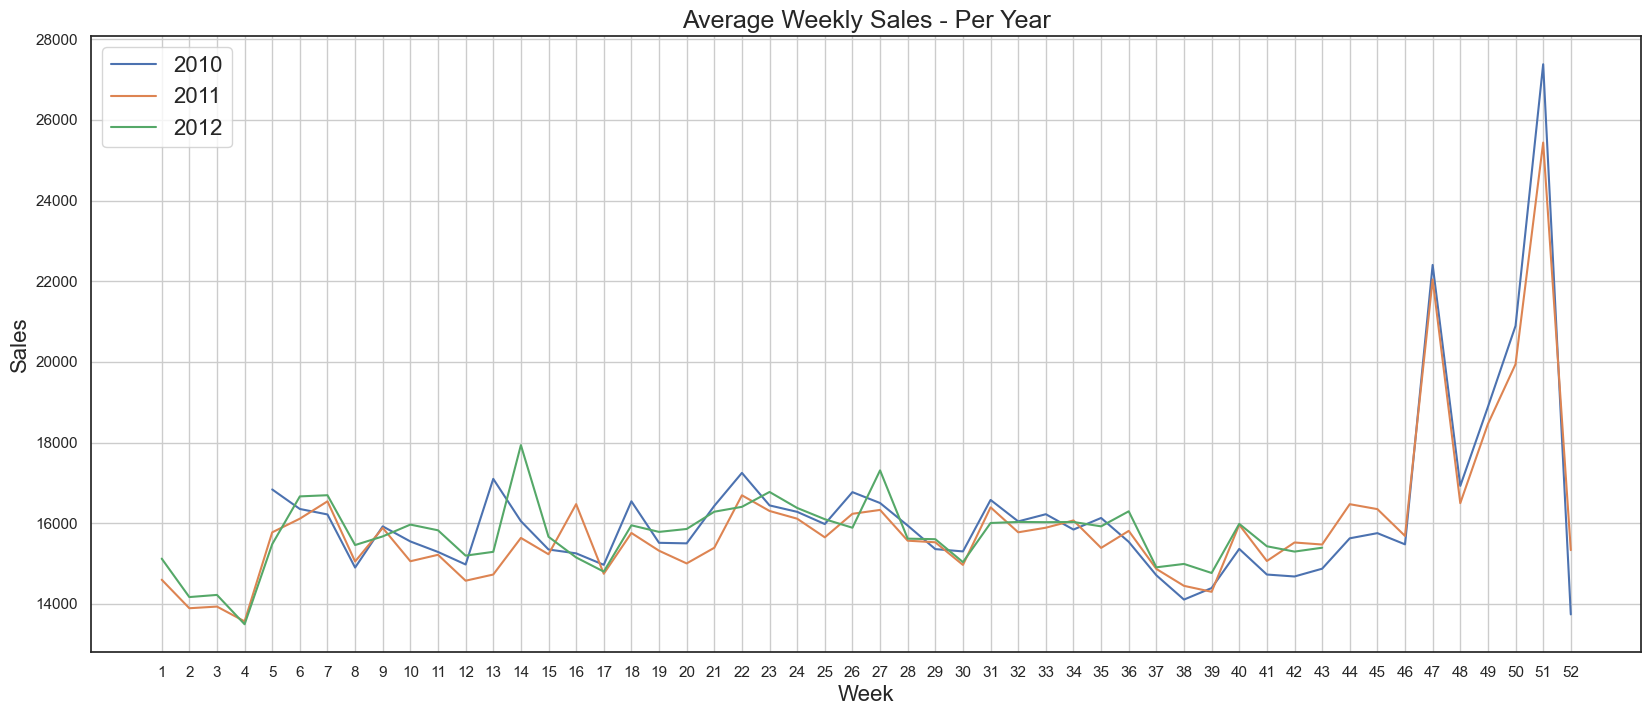

In [99]:
plt.figure(figsize=(20,8))

for year in [2010, 2011, 2012]:
    weekly_sales = train_data[train_data.Year == year].groupby('Week')['Weekly_Sales'].mean()
    sns.lineplot(x=weekly_sales.index, y=weekly_sales.values, label=str(year))

plt.grid()
plt.xticks(np.arange(1, 53, step=1))
plt.legend(loc='best', fontsize=16)
plt.title('Average Weekly Sales - Per Year', fontsize=18)
plt.xlabel('Week', fontsize=16)
plt.ylabel('Sales', fontsize=16)
plt.show()

From the analysis, we notice that Easter Day is an important holiday not captured by the IsHoliday column.

Easter always falls on a Sunday, but the week number varies:

2010 → Week 13

2011 → Week 16

2012 → Week 14

2013 (Test set) → Week 13

Therefore, we can update the IsHoliday flag to True for these specific weeks in each year.

In [100]:
train_data.loc[(train_data.Year==2010) & (train_data.Week==13), 'IsHoliday'] = True
train_data.loc[(train_data.Year==2011) & (train_data.Week==16), 'IsHoliday'] = True
train_data.loc[(train_data.Year==2012) & (train_data.Week==14), 'IsHoliday'] = True
test_data.loc[(test_data.Year==2013) & (test_data.Week==13), 'IsHoliday'] = True

> The same chart, but showing also the median of the Sales and not divided by Year:

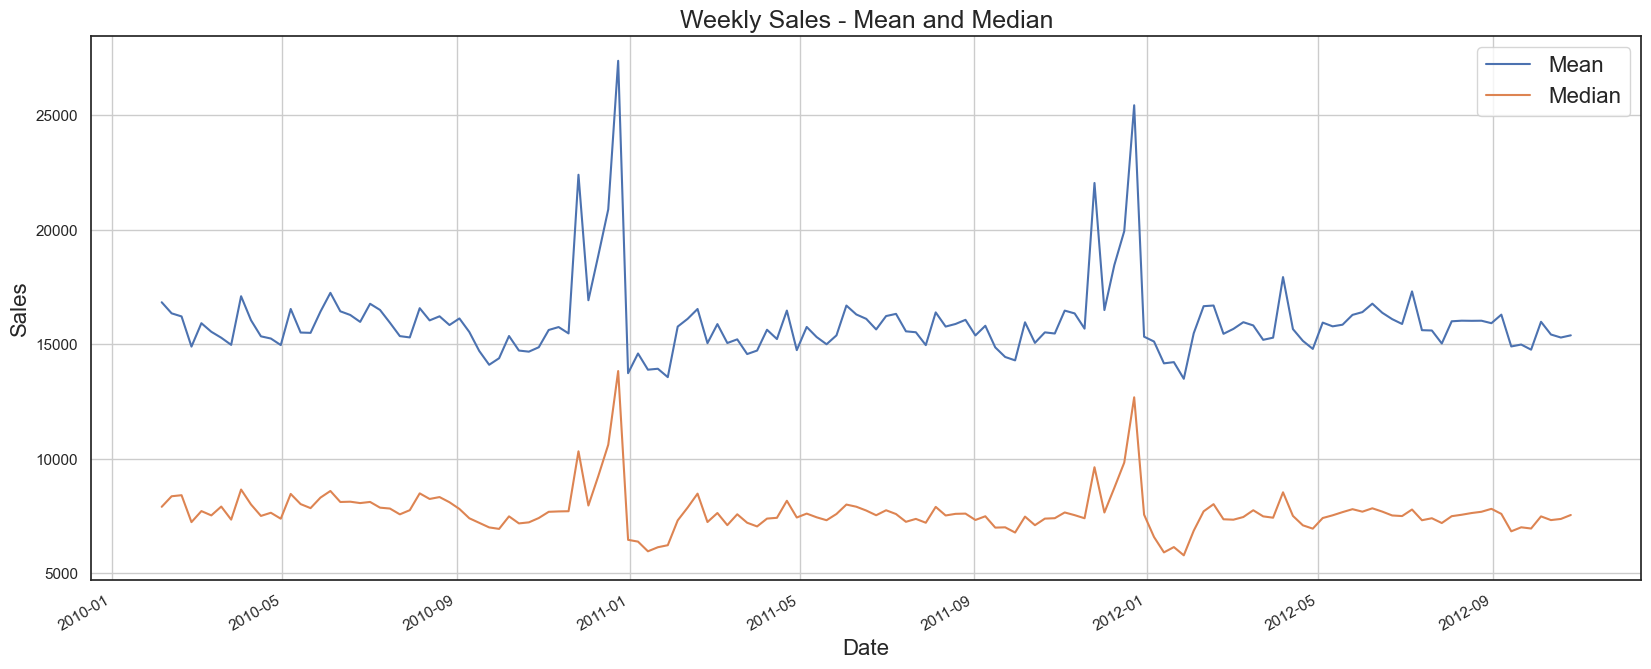

In [101]:
#mean and median together
weekly_sales = train_data.groupby('Date')['Weekly_Sales'].agg(['mean', 'median'])

plt.figure(figsize=(20,8))

sns.lineplot(x=weekly_sales.index, y=weekly_sales['mean'], label='Mean')
sns.lineplot(x=weekly_sales.index, y=weekly_sales['median'], label='Median')

plt.grid()
plt.legend(loc='best', fontsize=16)
plt.title('Weekly Sales - Mean and Median', fontsize=18)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Sales', fontsize=16)
plt.gcf().autofmt_xdate()  # formats x-axis dates
plt.show()

> Observing the plot, the mean and median differ significantly, indicating that some stores or departments have much higher sales than others, which skews the average.

### Average Sales per Store and Department

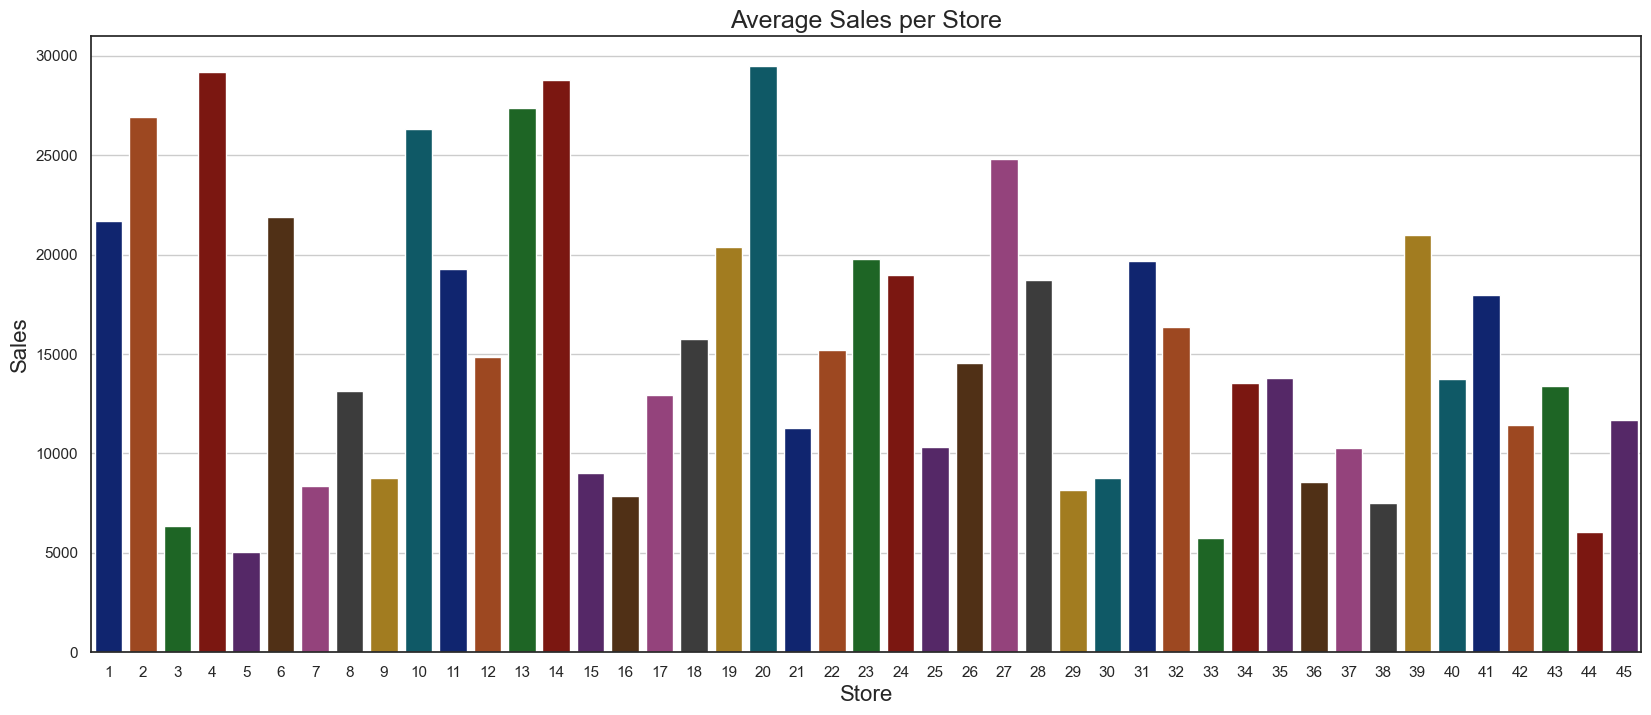

In [102]:
# Compute average weekly sales per store
weekly_sales = train_data.groupby('Store')['Weekly_Sales'].mean().sort_values(ascending=False)

plt.figure(figsize=(20,8))
sns.barplot(x=weekly_sales.index, y=weekly_sales.values, palette='dark')

plt.grid(axis='y')
plt.title('Average Sales per Store', fontsize=18)
plt.xlabel('Store', fontsize=16)
plt.ylabel('Sales', fontsize=16)
plt.show()


As observed, there is a noticeable difference in sales between stores, indicating that some stores perform significantly better than others.

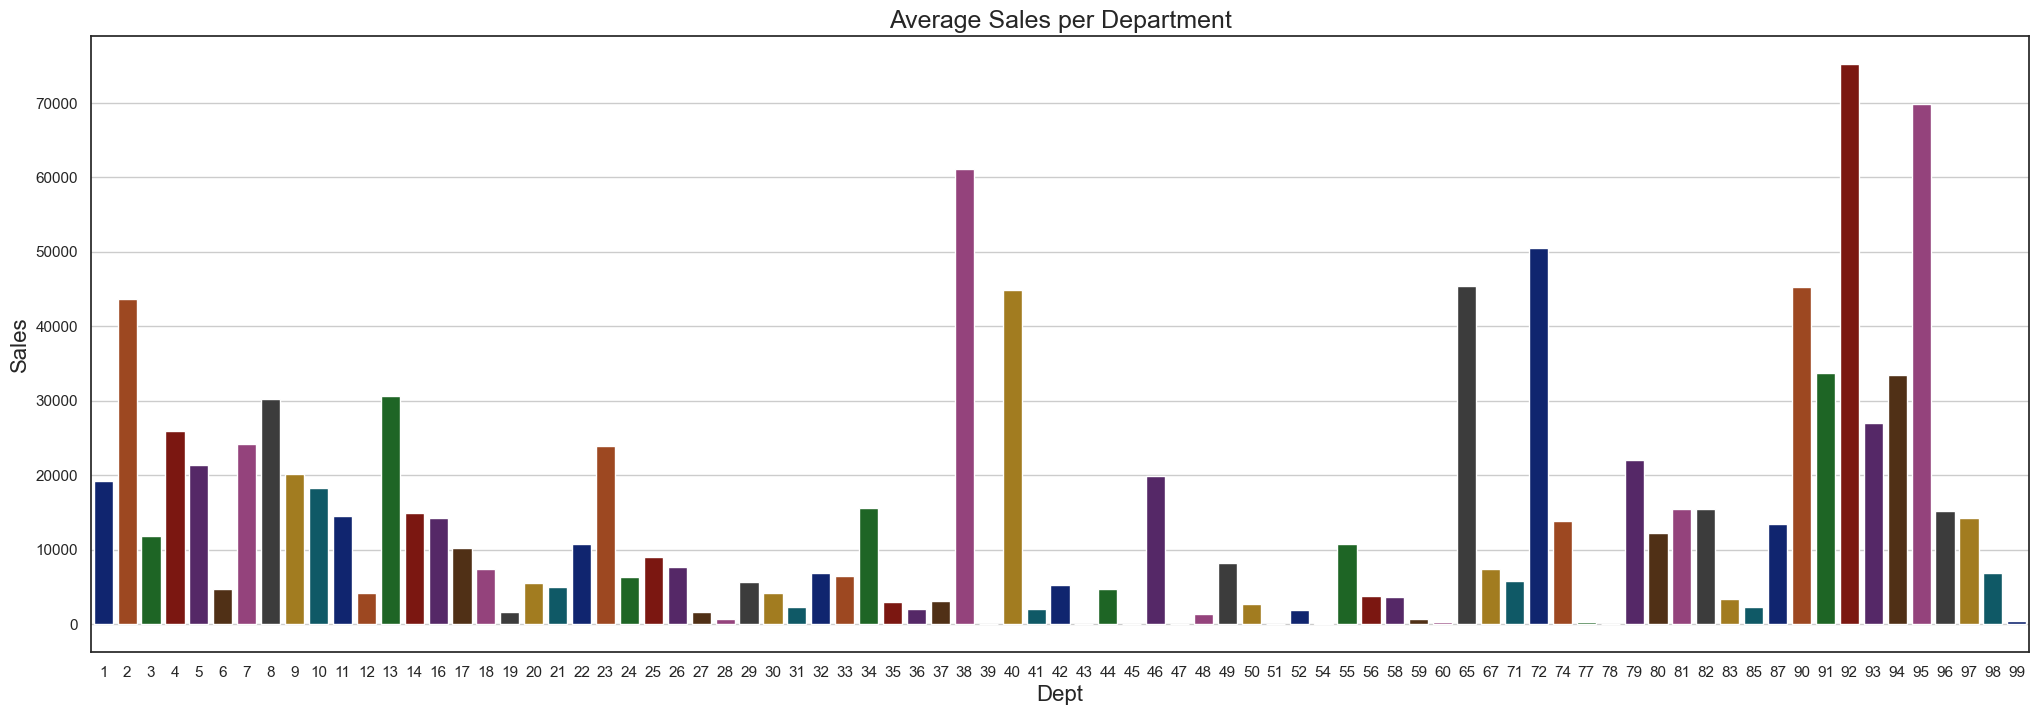

In [103]:
# Compute average weekly sales per department
weekly_sales = train_data.groupby('Dept')['Weekly_Sales'].mean().sort_values(ascending=False)

plt.figure(figsize=(25,8))
sns.barplot(x=weekly_sales.index, y=weekly_sales.values, palette='dark')

plt.grid(axis='y')  # grid on y-axis for clarity
plt.title('Average Sales per Department', fontsize=18)
plt.xlabel('Dept', fontsize=16)
plt.ylabel('Sales', fontsize=16)
plt.show()

As observed, there is a noticeable difference in sales between departments. Additionally, some departments are missing from the dataset, such as department number 15.

### Variables Correlation

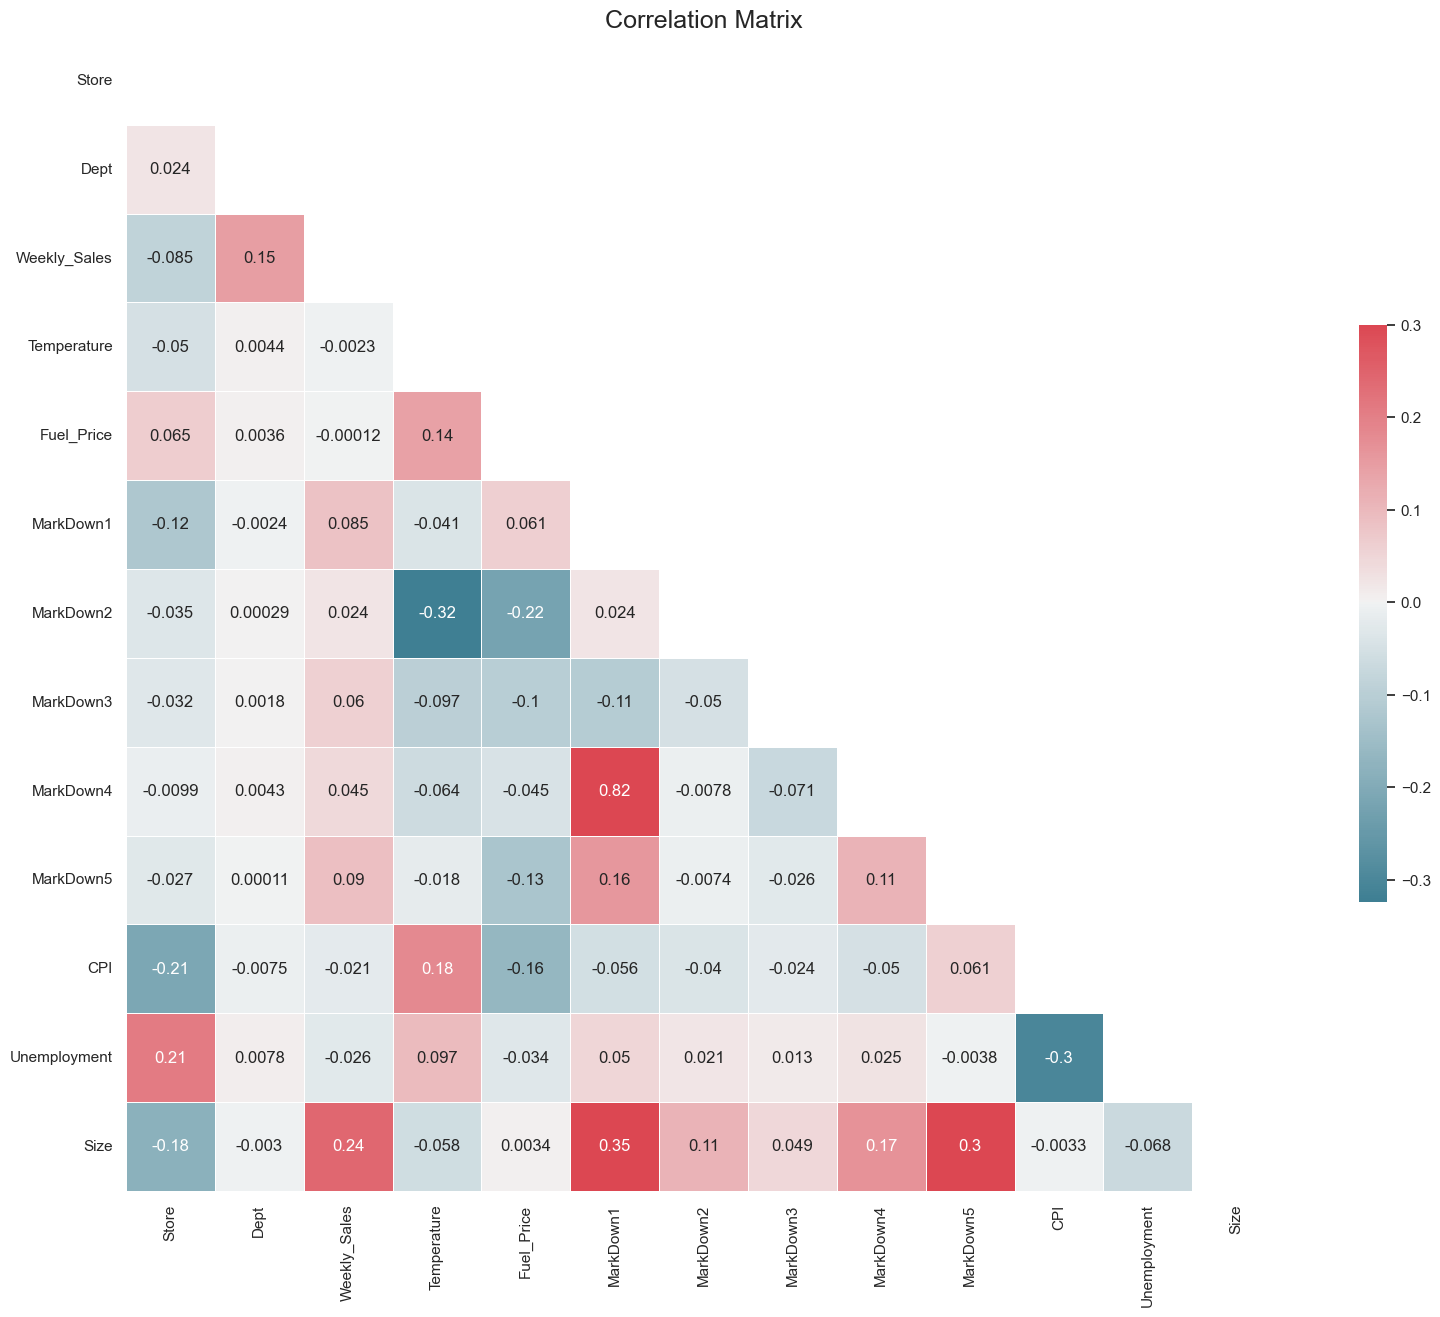

In [104]:
sns.set(style="white")

# Compute correlation for numeric columns only
corr = train_data.select_dtypes(include=['int64','float64']).corr()

# Upper triangle mask
mask = np.triu(np.ones_like(corr, dtype=bool))

# Figure
f, ax = plt.subplots(figsize=(20, 15))

# Color map
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Heatmap
sns.heatmap(
    corr, 
    mask=mask, 
    cmap=cmap, 
    vmax=.3, 
    center=0,
    square=True, 
    linewidths=.5, 
    cbar_kws={"shrink": .5}, 
    annot=True,
    ax=ax
)

plt.title('Correlation Matrix', fontsize=18)
plt.show()

The MarkDown1 to MarkDown5 features are weakly correlated with Weekly_Sales and contain many null values, so they can be safely dropped.

Additionally, Fuel_Price is strongly correlated with Year. To avoid redundant information, one should be dropped; however, Year will be kept because it helps differentiate the same weeks for each Store and Dept.

Other variables with weak correlation to Weekly_Sales can be further analyzed to determine if they provide useful information to the model.

In [105]:
train_data = train_data.drop(columns=['Fuel_Price','MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'])
test_data = test_data.drop(columns=['Fuel_Price','MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'])

### Analyzing Variables

First, we define two plotting functions to help us explore the features.

> The discrete plot is for features with finite categories. We use a boxplot to see medians and interquartile ranges, and a stripplot to visualize distributions more clearly, especially when there are many outliers.

> The continuous plot is for numeric features. We look at the distribution, apply BoxCox transformations to check if correlation with Weekly_Sales increases and skewness decreases. Transforming variables can sometimes improve model performance depending on the algorithm used.

### Weekly_Sales x IsHoliday

<Axes: xlabel='IsHoliday', ylabel='Weekly_Sales'>

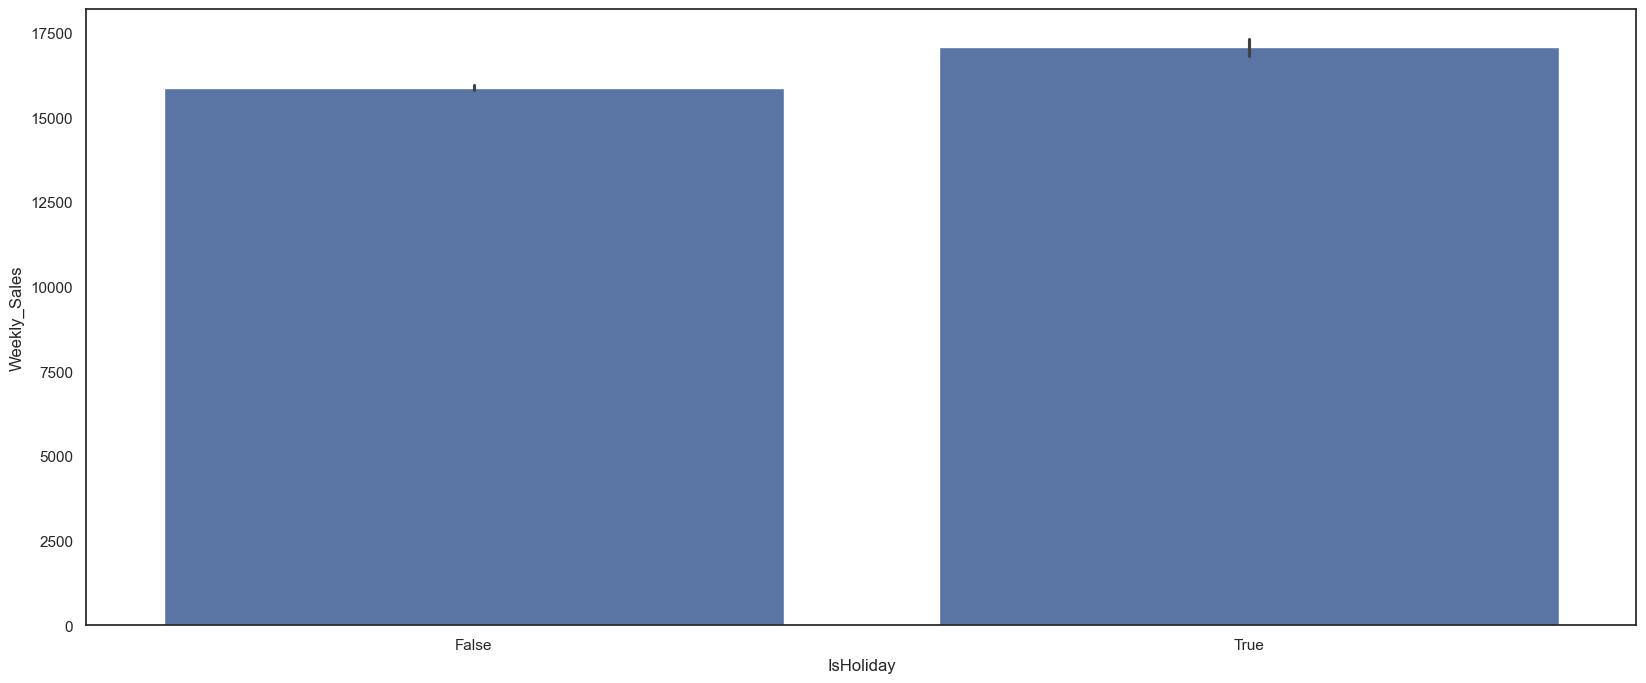

In [110]:
plt.figure(figsize=(20,8))
sns.barplot(x='IsHoliday',y='Weekly_Sales',data=train_data)

> This field is going to be important to differentiate Week Holidays. As we can see, Week Holidays have more high sales events than non-Holiday Weeks.

| Column                                             | Type        | Recommended Charts       |
| -------------------------------------------------- | ----------- | ------------------------ |
| Store, Dept, IsHoliday, Type, Week, Year           | Categorical | Bar, Boxplot             |
| Weekly_Sales, Temperature, CPI, Unemployment, Size | Continuous  | Histogram, Scatter, Line |
| Date                                               | Time        | Line, Seasonal, Heatmap  |


### Categorical Data

#### Store X Weekly_Sales

<Axes: xlabel='Store', ylabel='Weekly_Sales'>

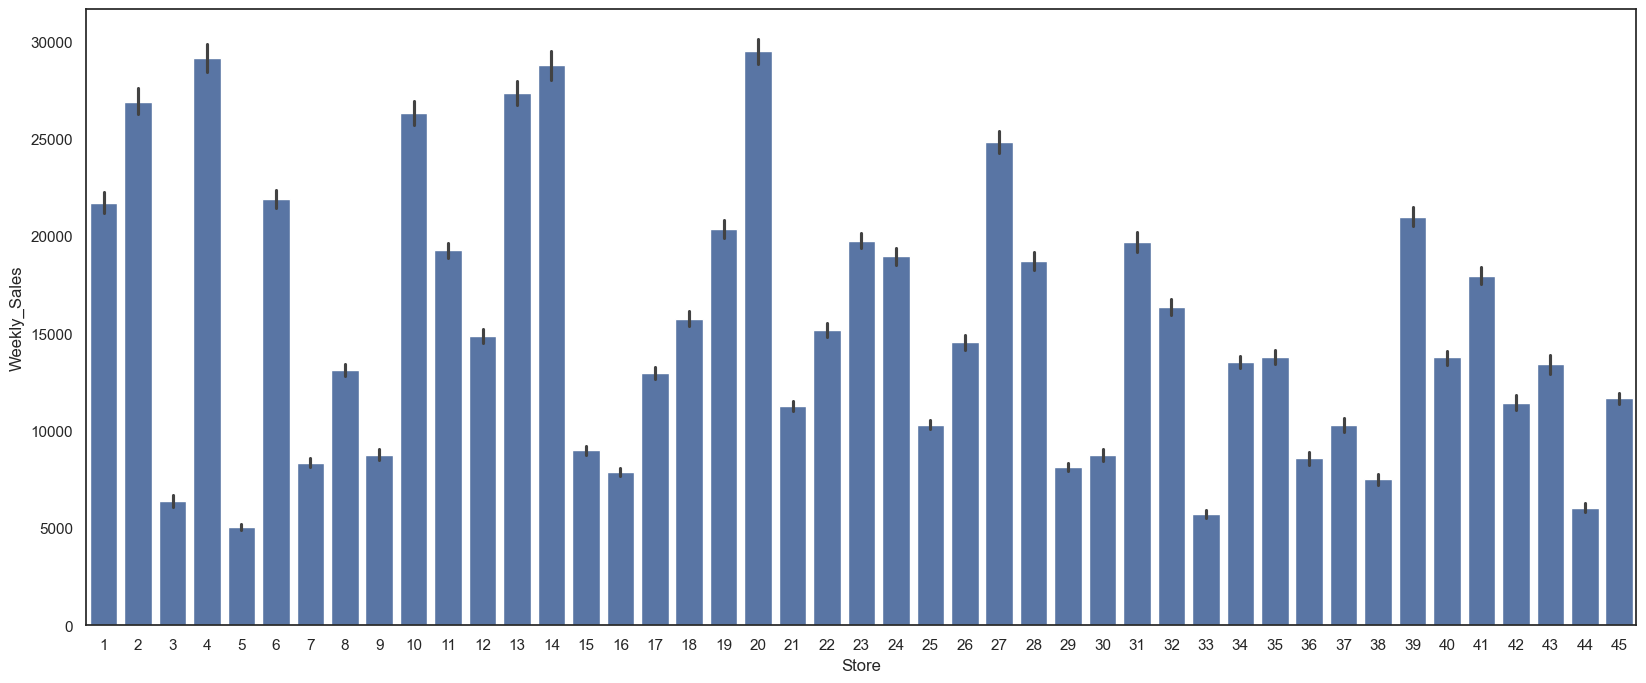

In [111]:
# Bar plot
plt.figure(figsize=(20,8))
sns.barplot(x='Store',y='Weekly_Sales',data=train_data)

<Axes: xlabel='Store', ylabel='Weekly_Sales'>

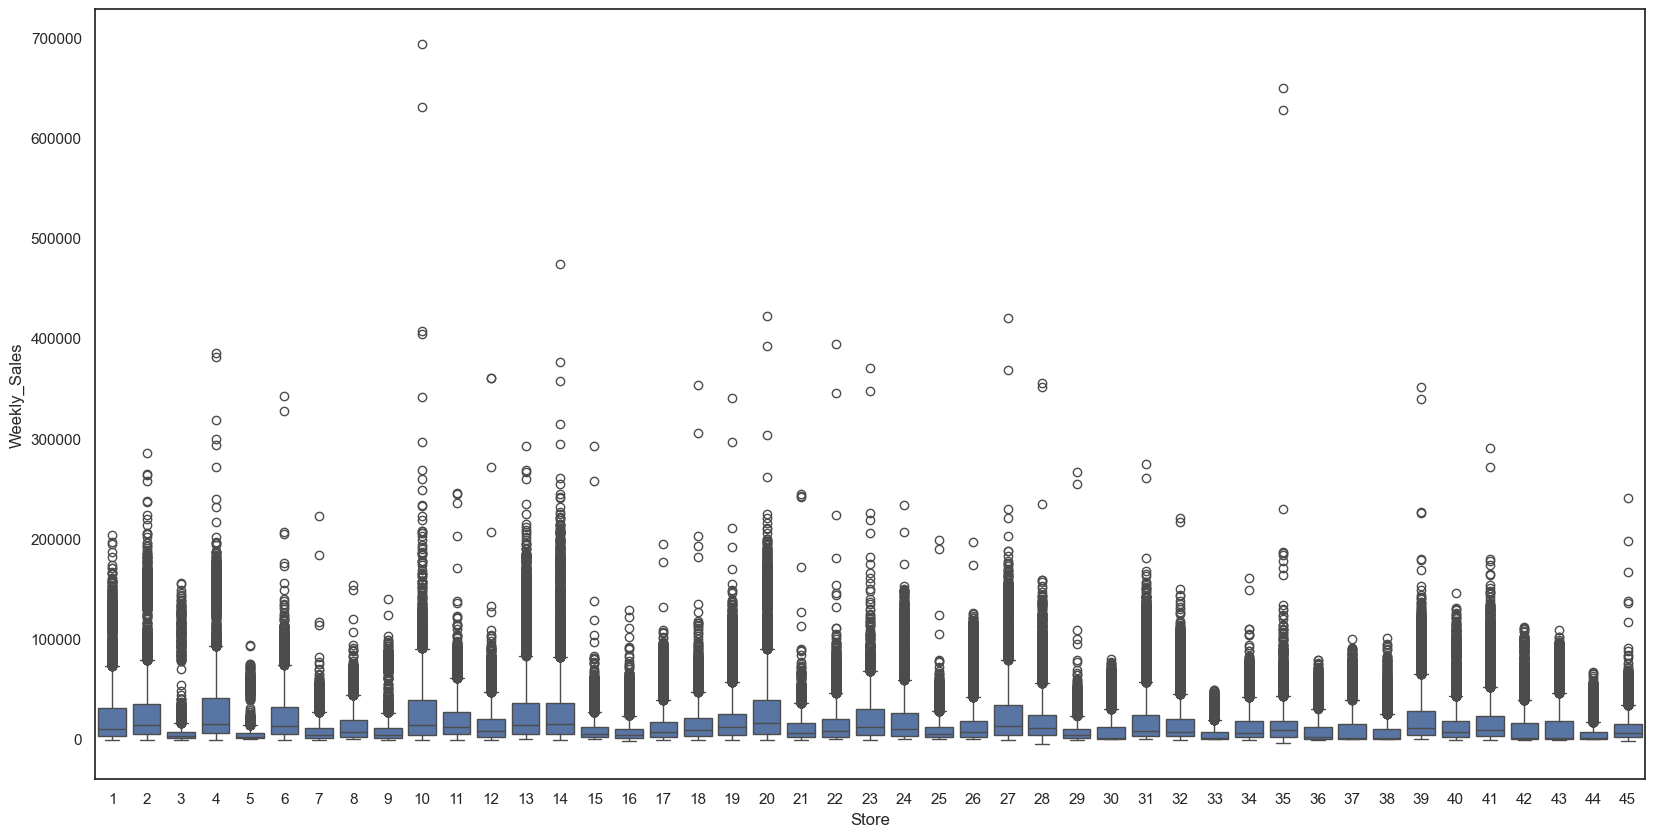

In [112]:
# Box Plot
plt.figure(figsize=(20, 10))
sns.boxplot(x="Store", y="Weekly_Sales", data=train_data)

#### Department X Weekly_Sales

<Axes: xlabel='Dept', ylabel='Weekly_Sales'>

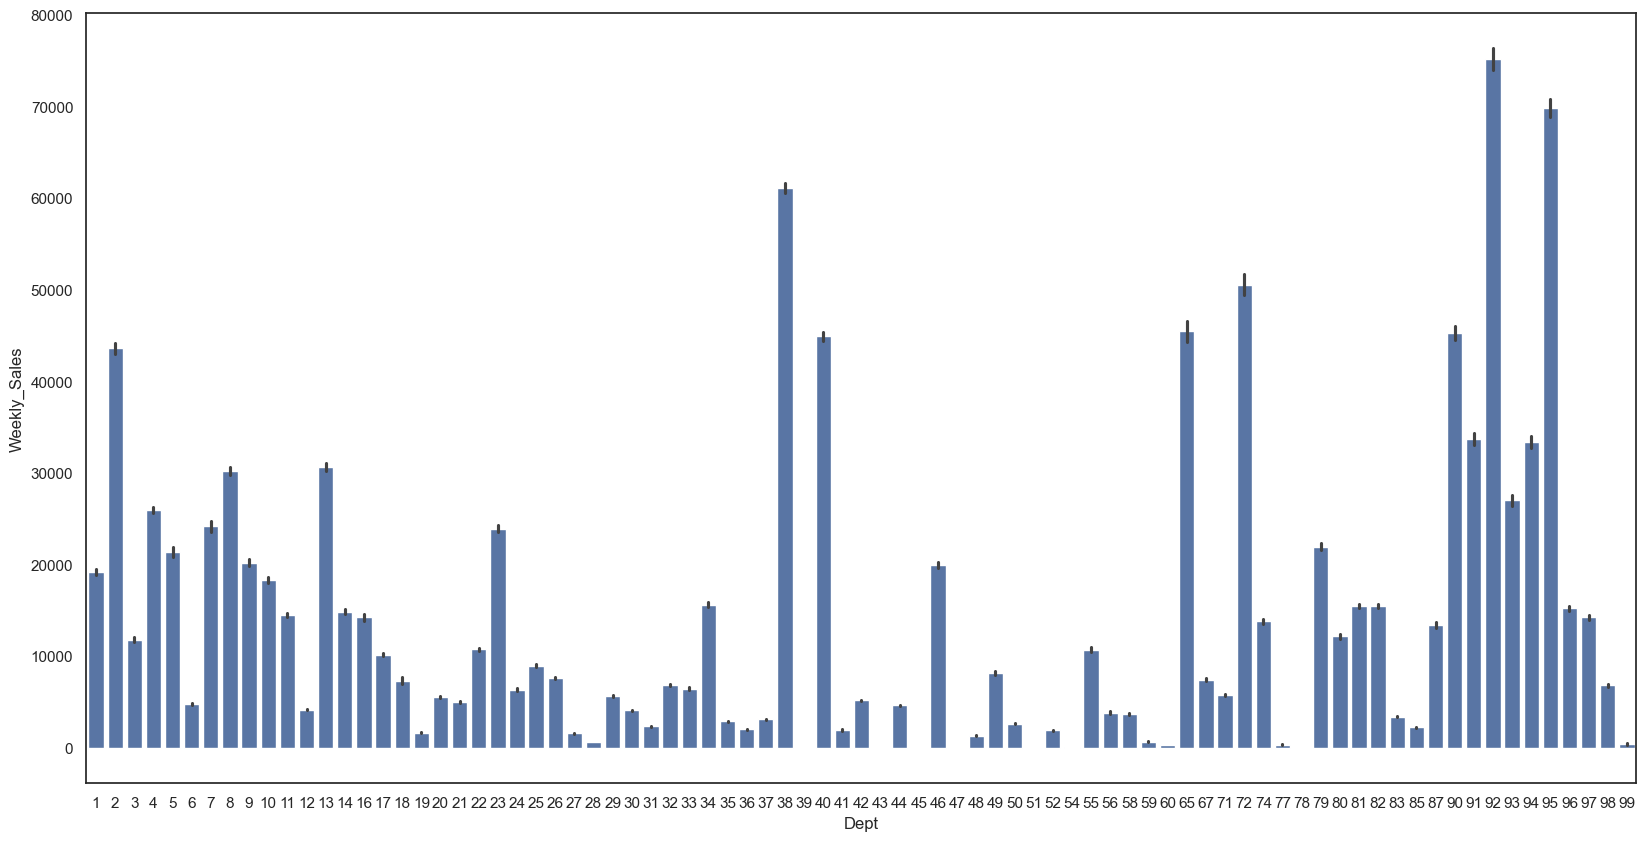

In [113]:
plt.figure(figsize=(20,10))
sns.barplot(x='Dept',y='Weekly_Sales',data=train_data)

<Axes: xlabel='Dept', ylabel='Weekly_Sales'>

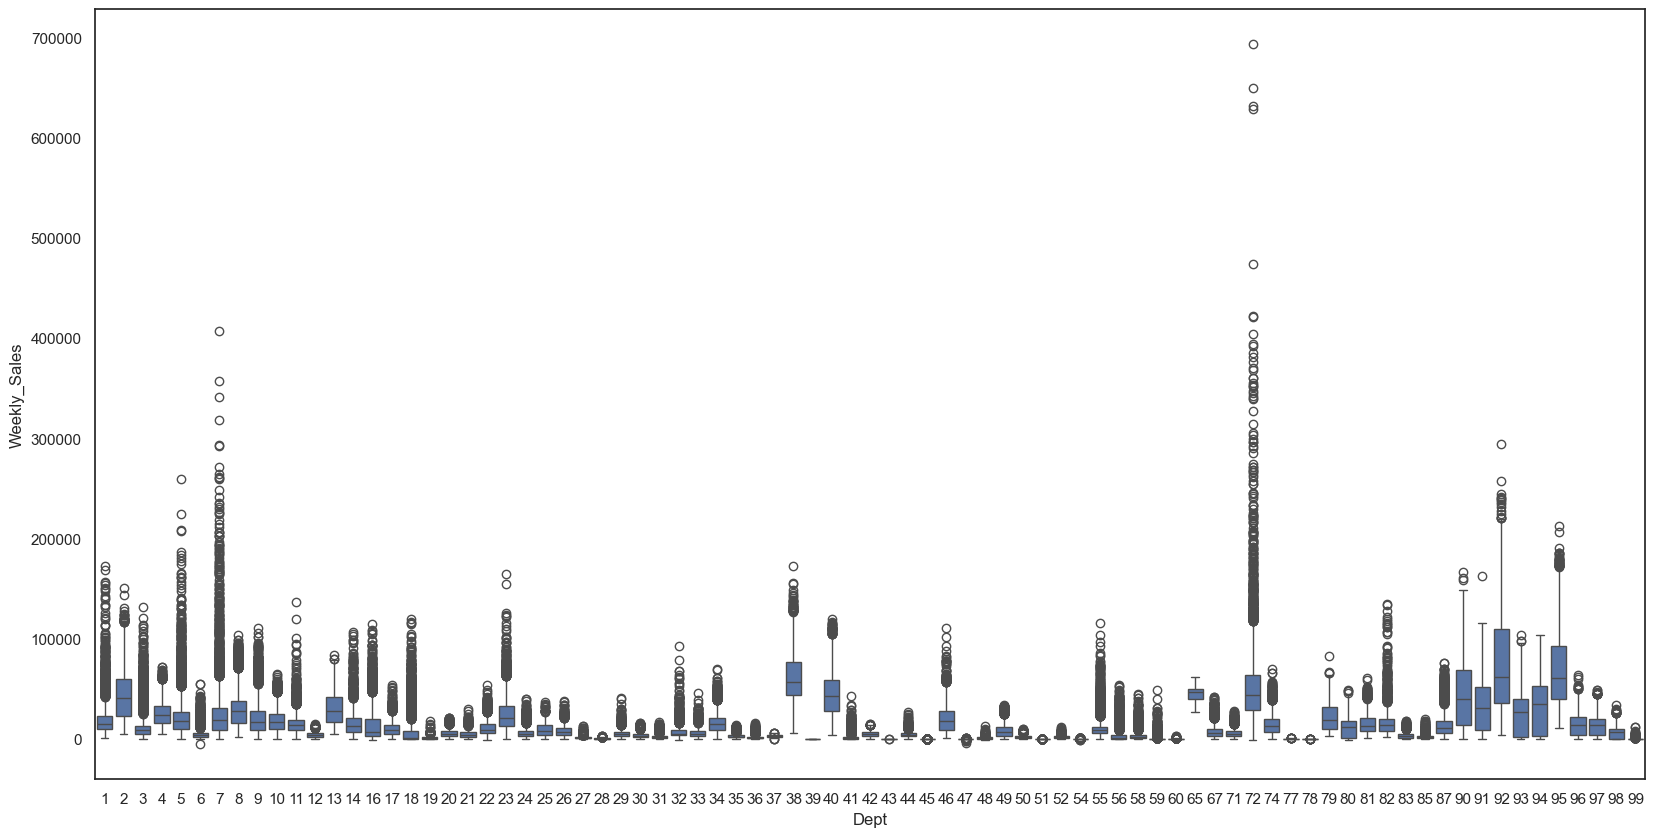

In [114]:
# Box Plot
plt.figure(figsize=(20, 10))
sns.boxplot(x="Dept", y="Weekly_Sales", data=train_data)

#### IsHoliday X Weekly_Sales

<Axes: xlabel='IsHoliday', ylabel='Weekly_Sales'>

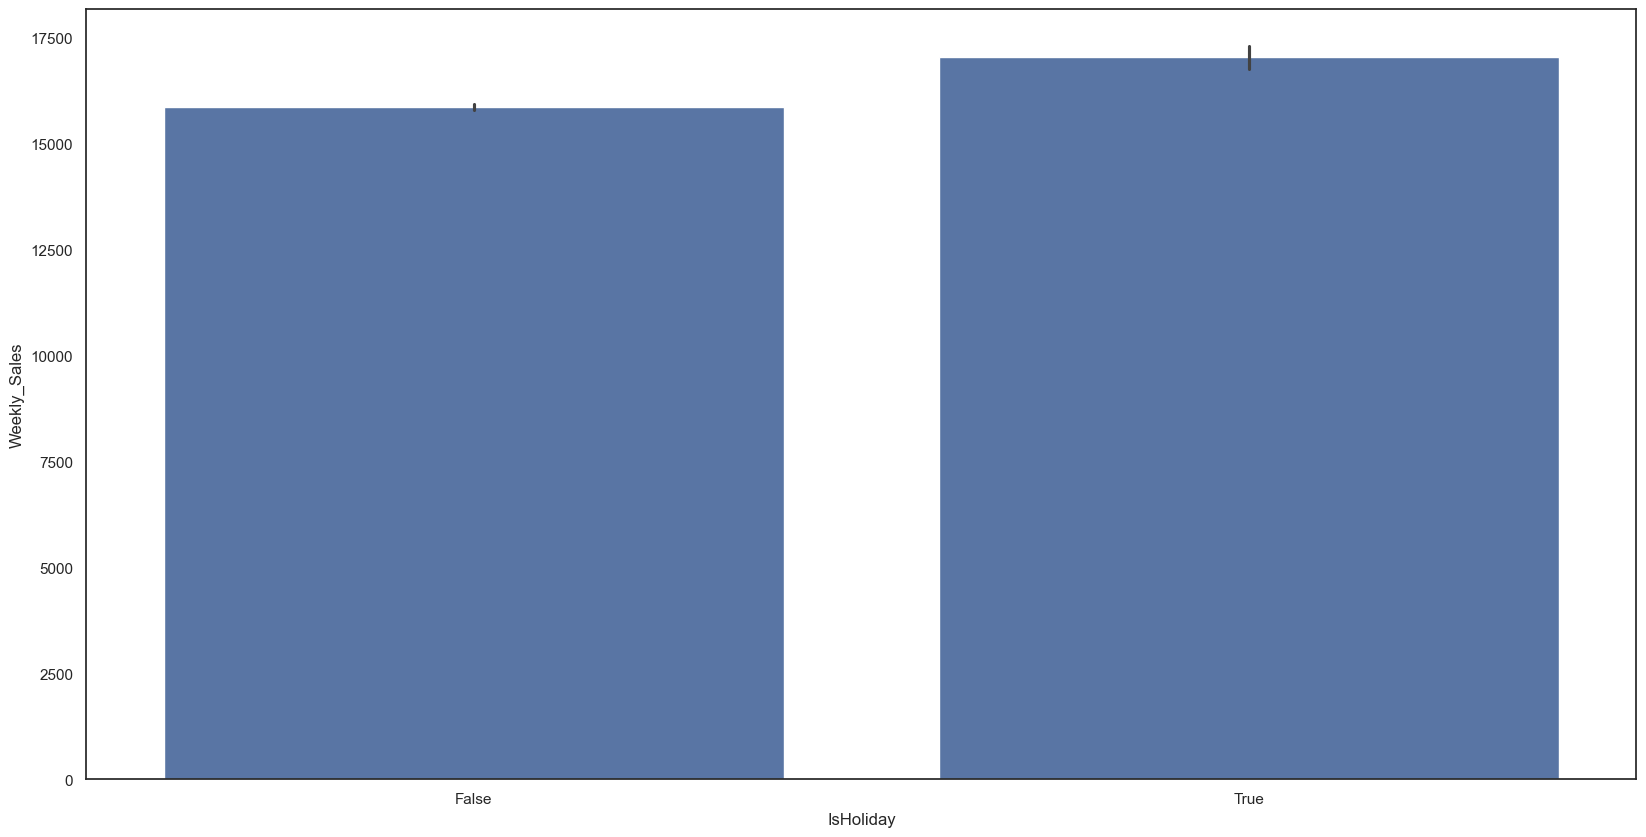

In [115]:
plt.figure(figsize=(20,10))
sns.barplot(x='IsHoliday',y='Weekly_Sales',data=train_data)

<Axes: xlabel='IsHoliday', ylabel='Weekly_Sales'>

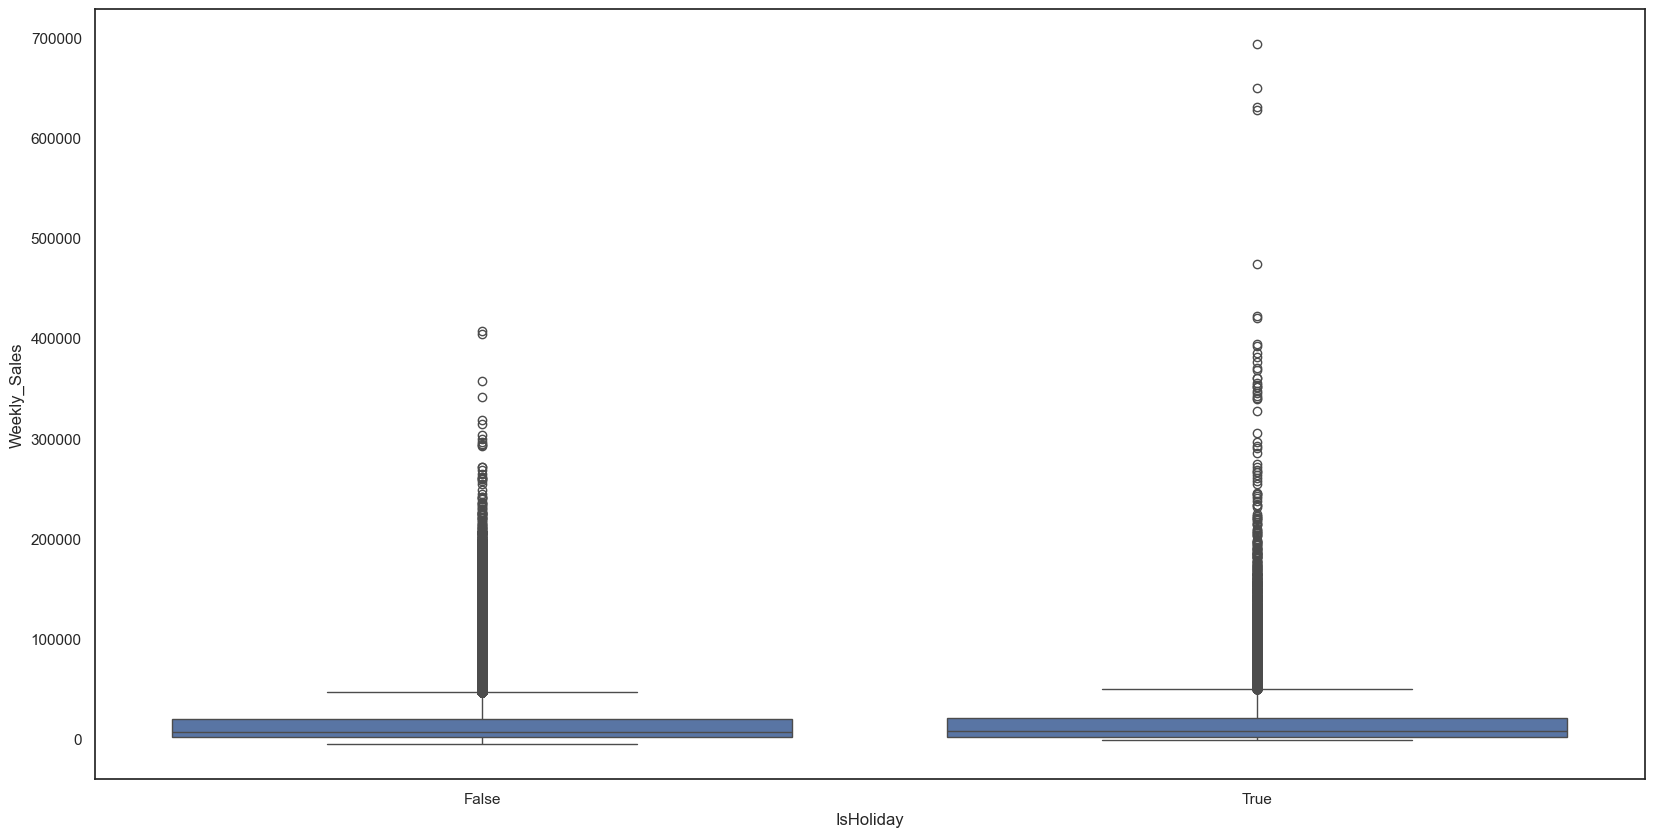

In [116]:
# Box Plot
plt.figure(figsize=(20, 10))
sns.boxplot(x="IsHoliday", y="Weekly_Sales", data=train_data)

#### Type X Weekly_Sales

<Axes: xlabel='Type', ylabel='Weekly_Sales'>

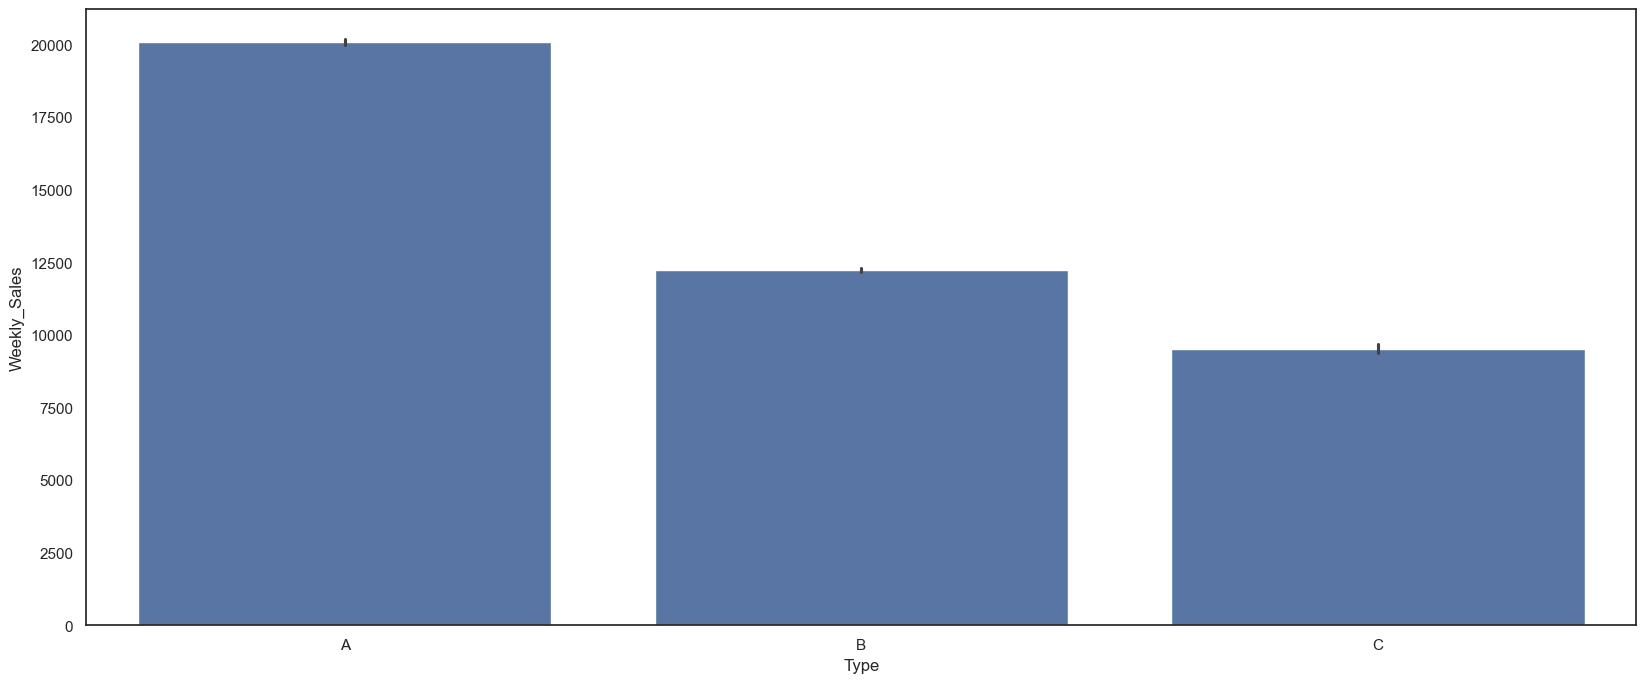

In [117]:
plt.figure(figsize=(20,8))
sns.barplot(x='Type',y='Weekly_Sales',data=train_data)

<Axes: xlabel='Type', ylabel='Weekly_Sales'>

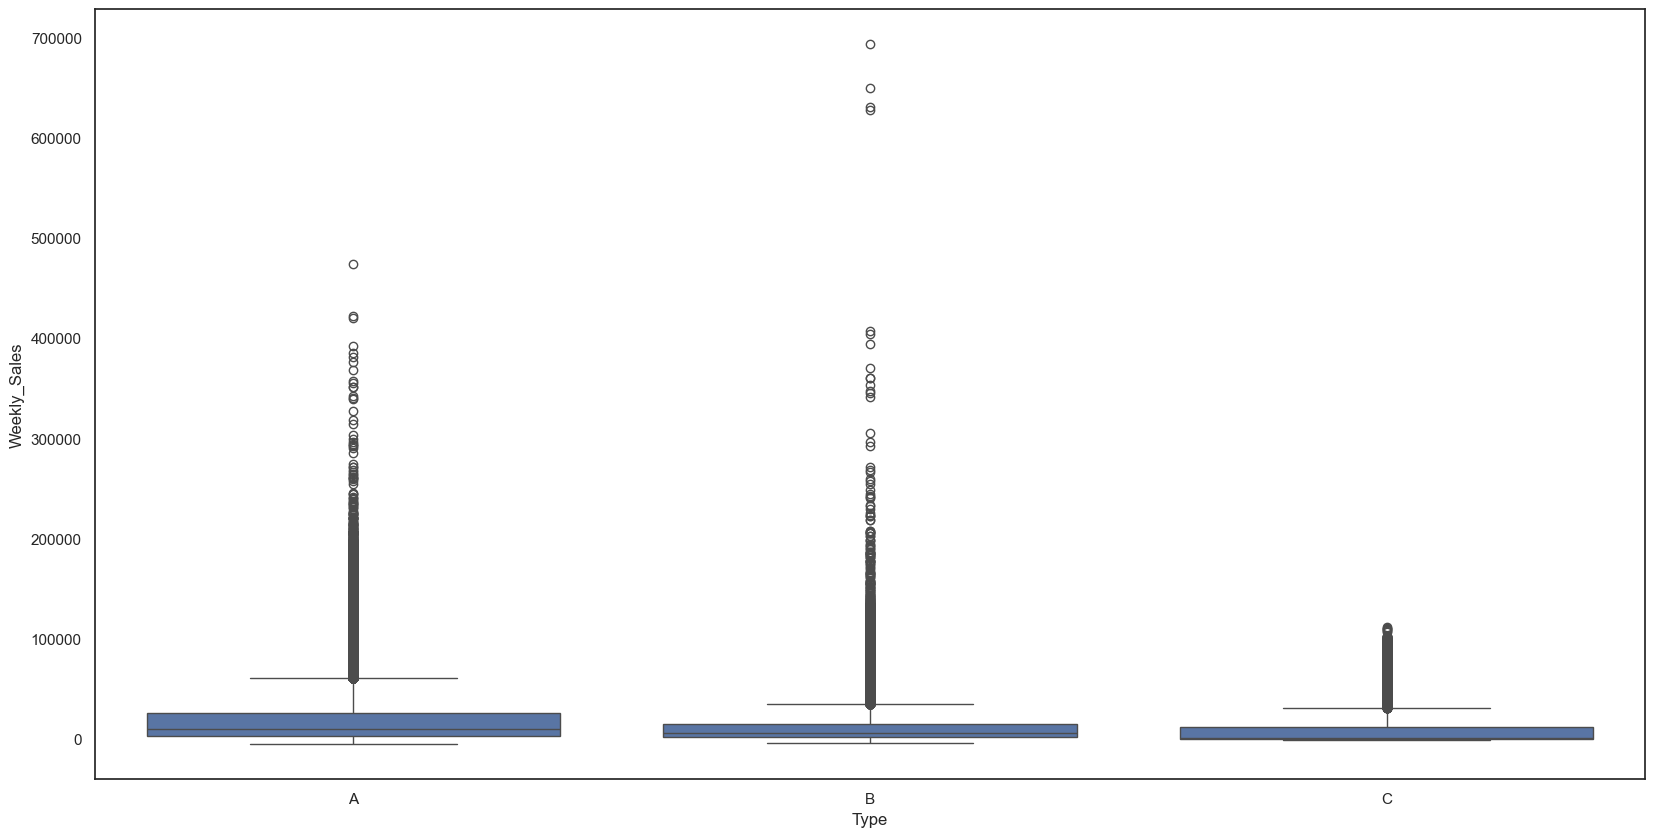

In [118]:
# Box Plot
plt.figure(figsize=(20, 10))
sns.boxplot(x="Type", y="Weekly_Sales", data=train_data)

#### Week X Weekly_Sales

<Axes: xlabel='Week', ylabel='Weekly_Sales'>

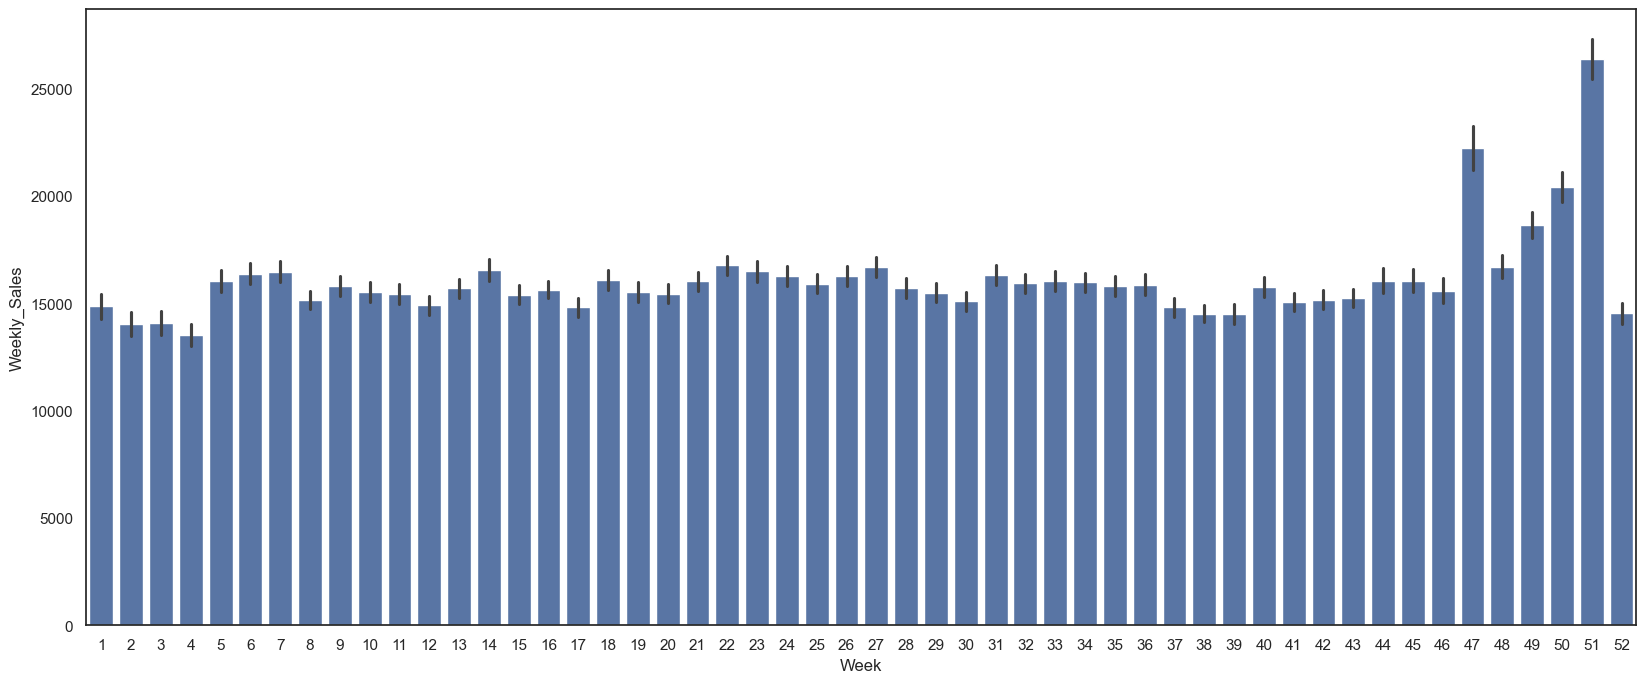

In [119]:
plt.figure(figsize=(20,8))
sns.barplot(x='Week',y='Weekly_Sales',data=train_data)

<Axes: xlabel='Week', ylabel='Weekly_Sales'>

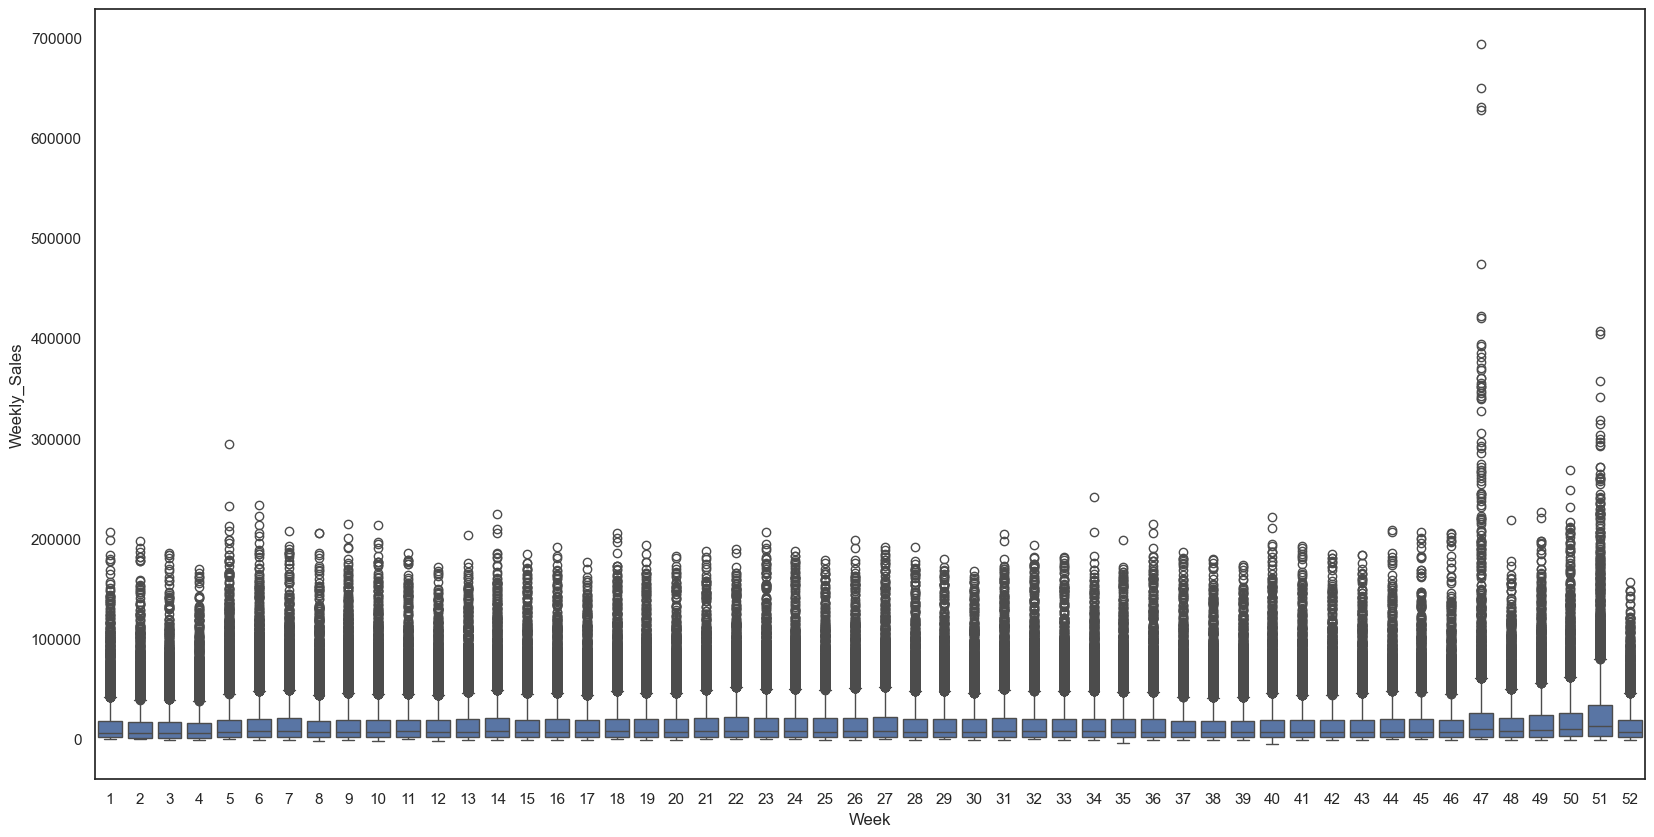

In [120]:
# Box Plot
plt.figure(figsize=(20, 10))
sns.boxplot(x="Week", y="Weekly_Sales", data=train_data)

#### Year X Weekly_Sales

<Axes: xlabel='Year', ylabel='Weekly_Sales'>

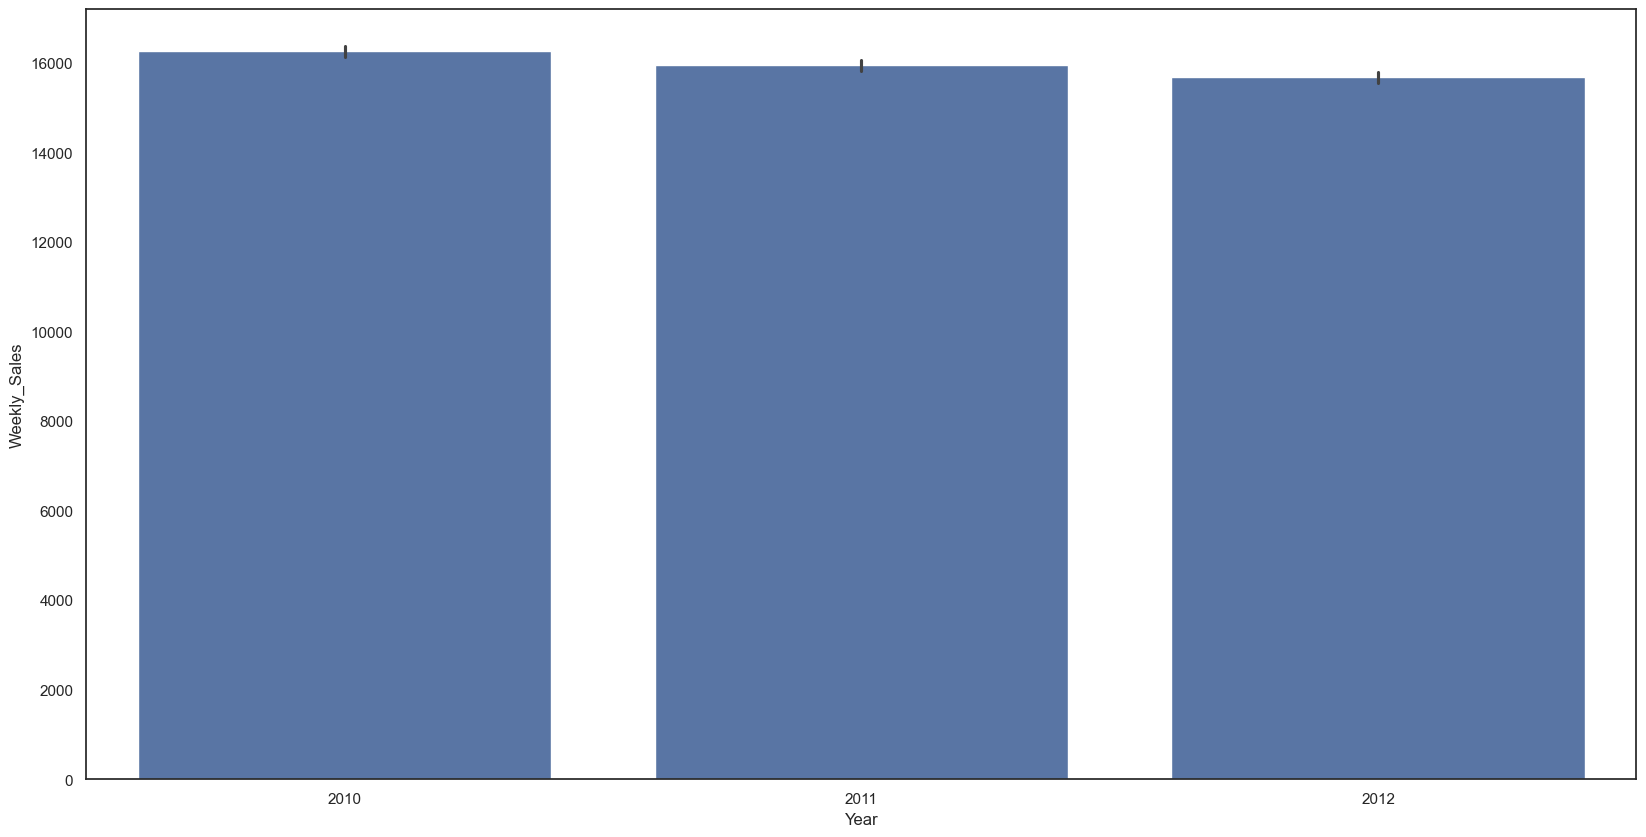

In [121]:
plt.figure(figsize=(20,10))
sns.barplot(x='Year',y='Weekly_Sales',data=train_data)

<Axes: xlabel='Year', ylabel='Weekly_Sales'>

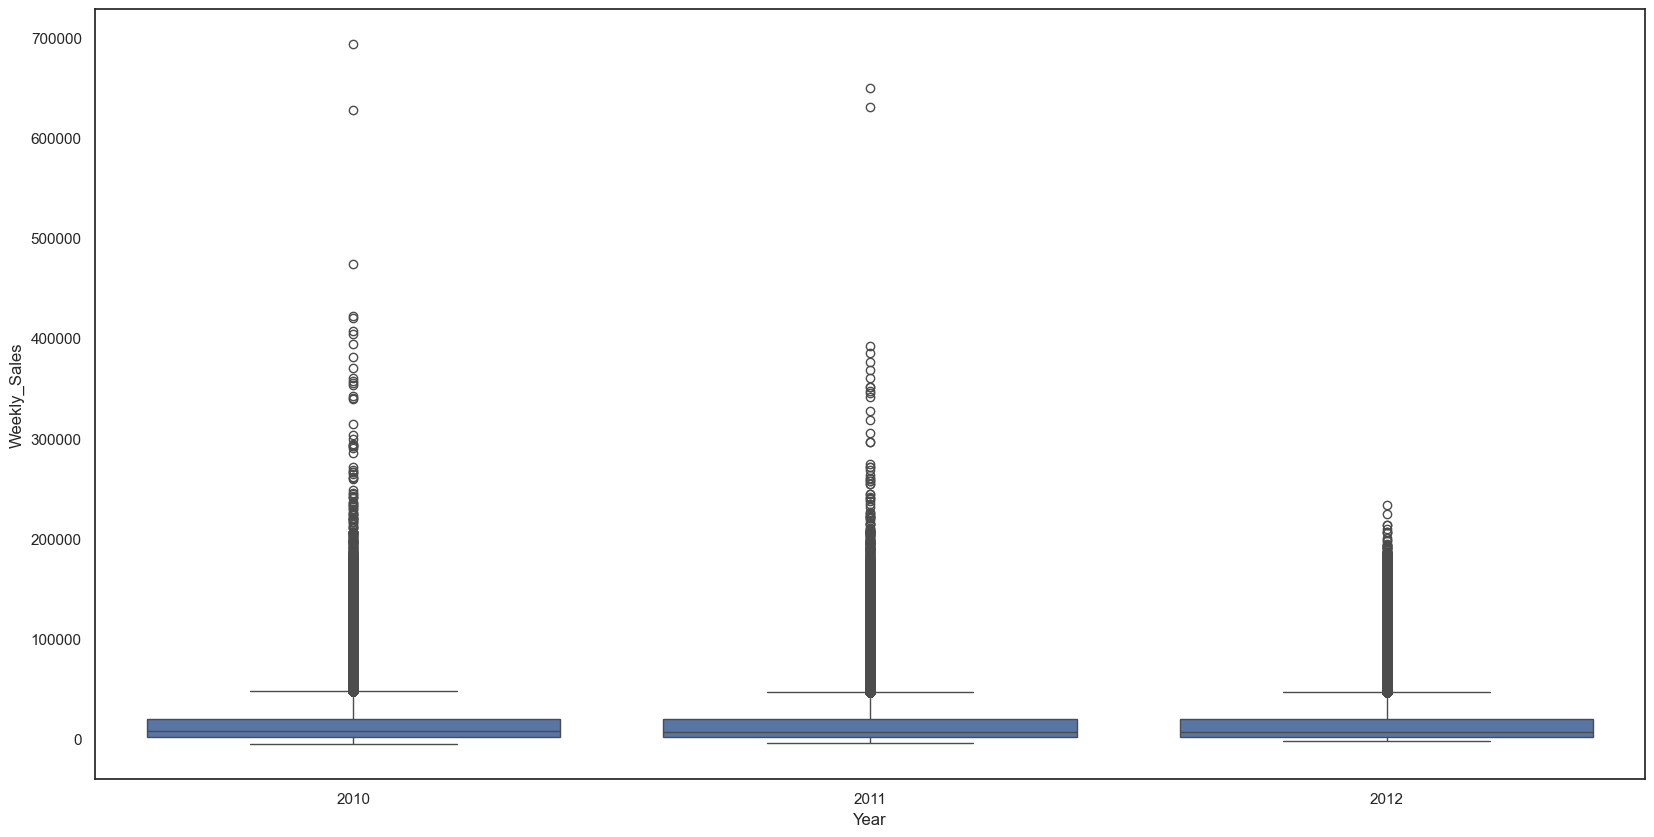

In [122]:
# Box Plot
plt.figure(figsize=(20, 10))
sns.boxplot(x="Year", y="Weekly_Sales", data=train_data)

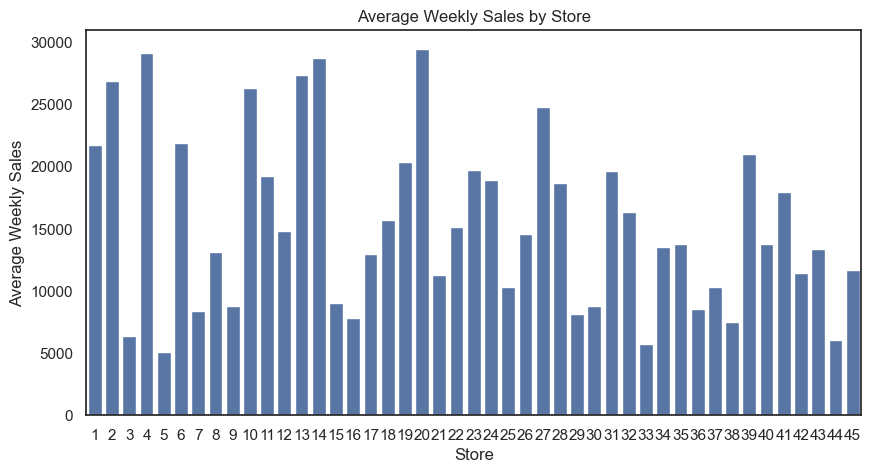

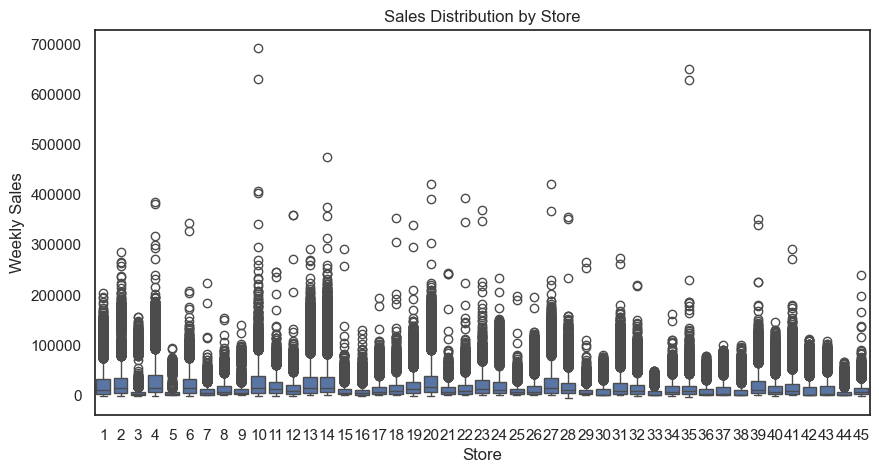

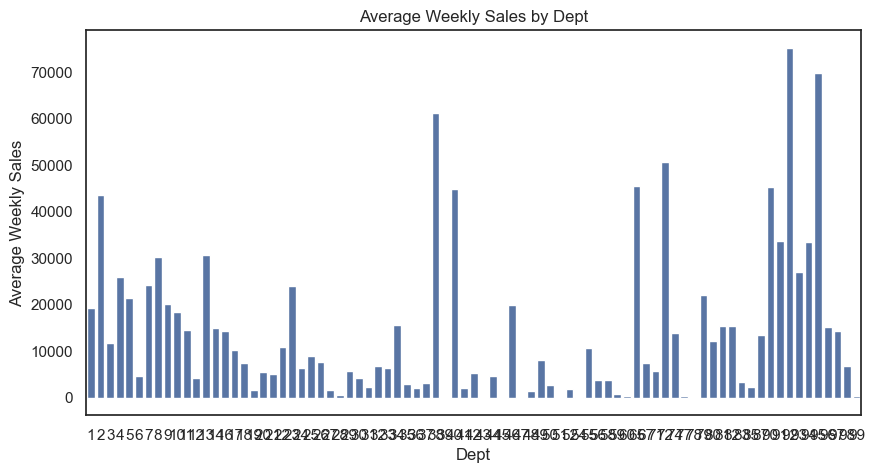

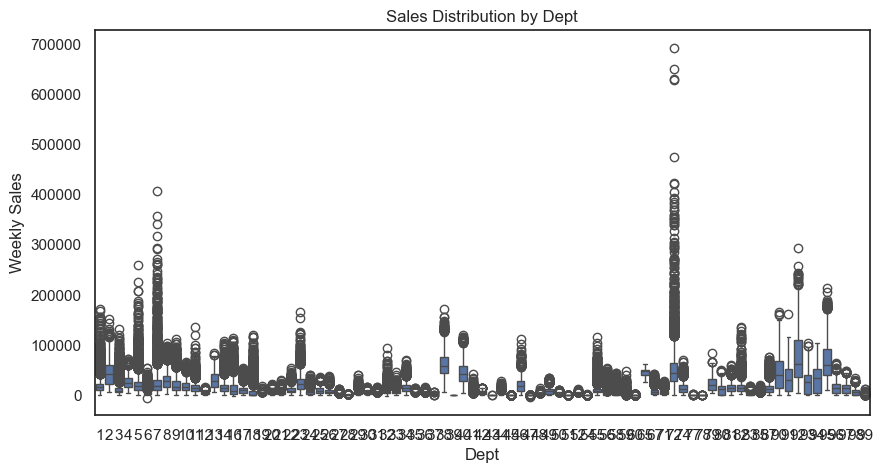

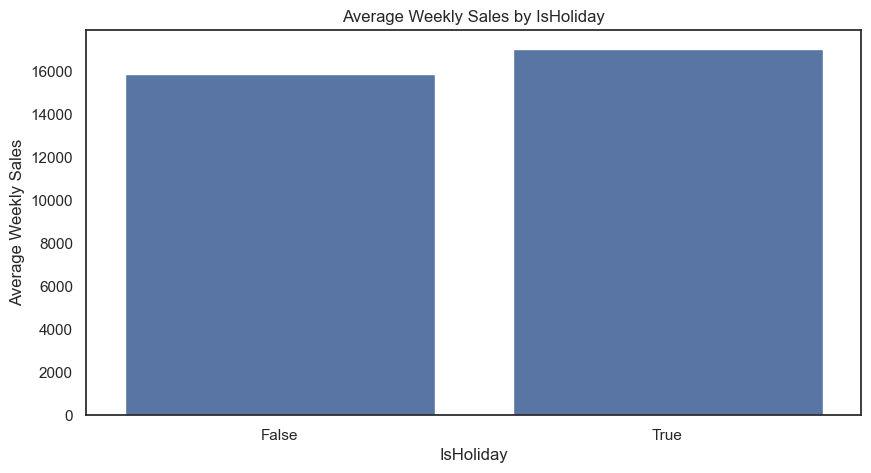

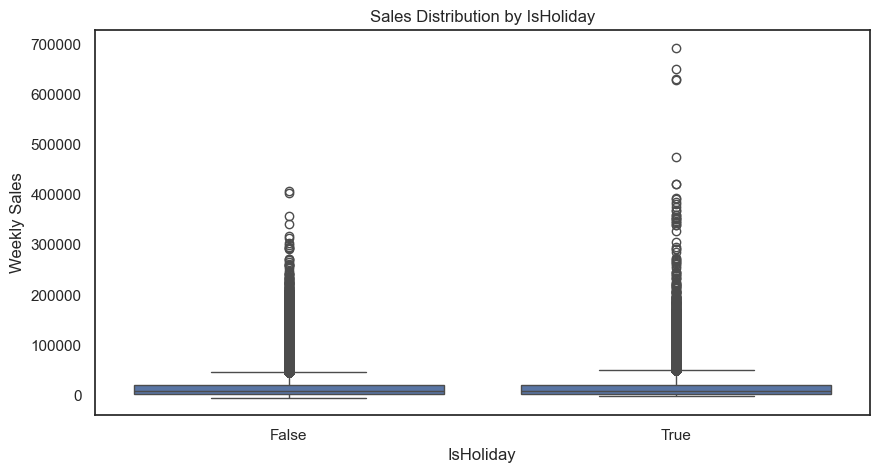

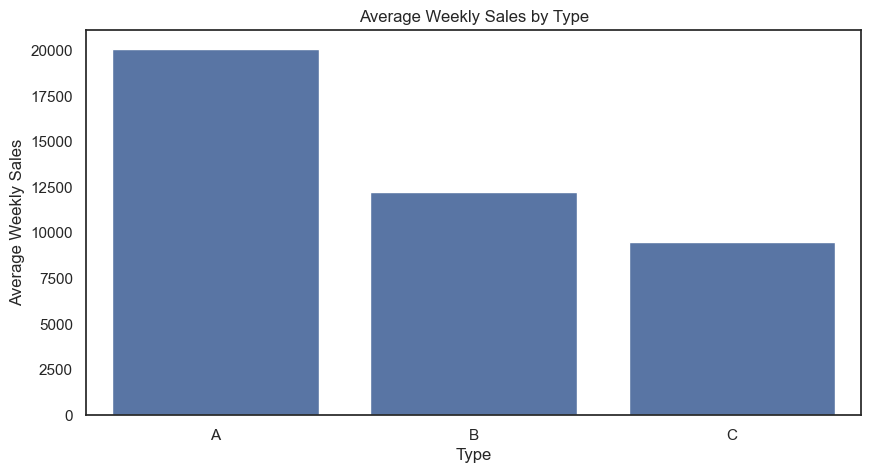

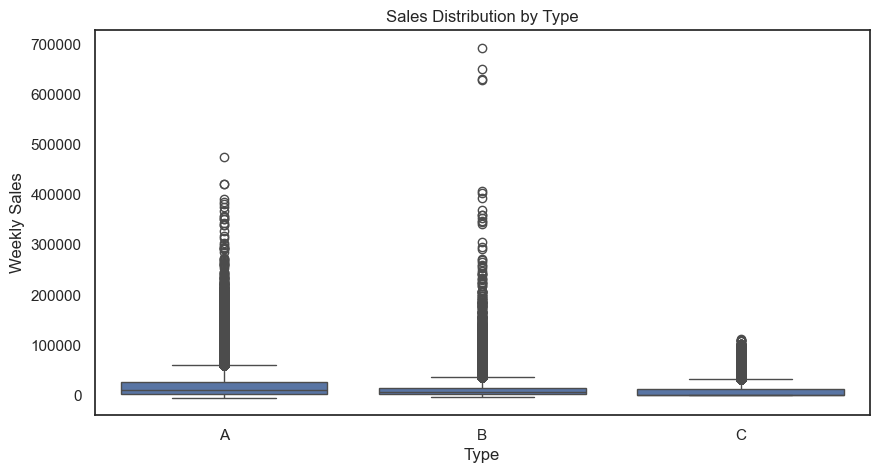

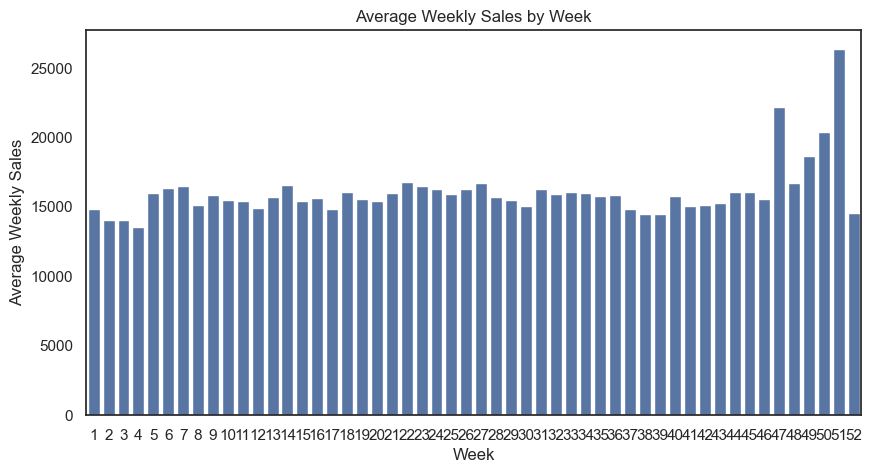

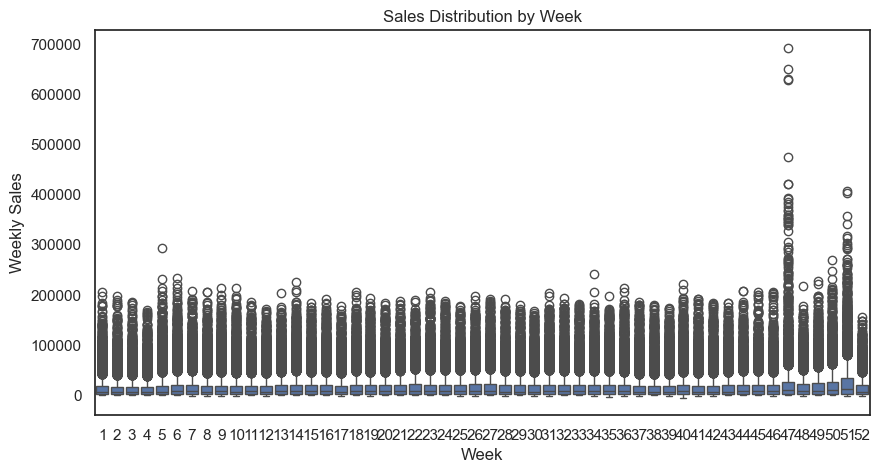

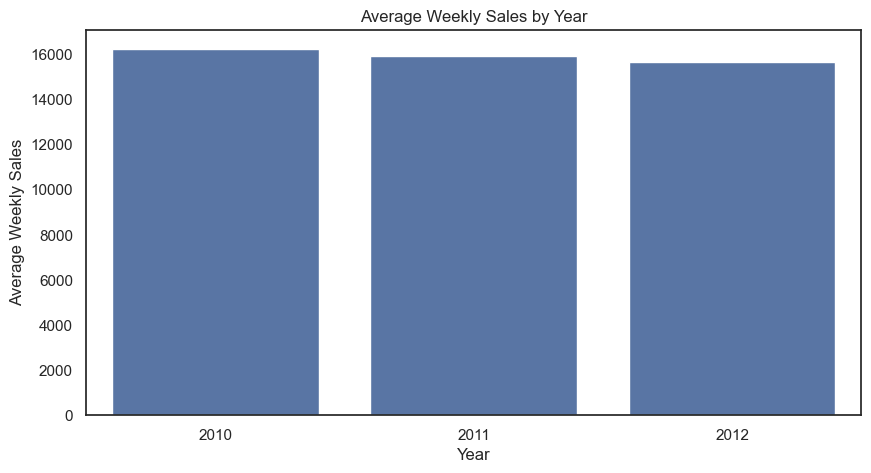

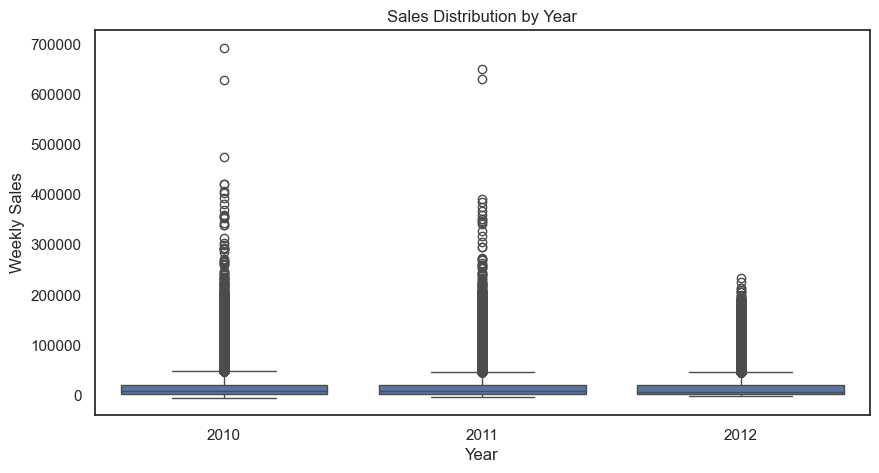

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns

# Categorical columns
categorical_cols = ["Store", "Dept", "IsHoliday", "Type", "Week", "Year"]

for col in categorical_cols:
    # Bar plot (average Weekly Sales by category)
    plt.figure(figsize=(10, 5))
    sns.barplot(x=col, y="Weekly_Sales", data=train_data, estimator="mean", ci=None)
    plt.title(f"Average Weekly Sales by {col}")
    plt.xlabel(col)
    plt.ylabel("Average Weekly Sales")
    plt.xticks(rotation=0)   # keep labels horizontal
    plt.show()

    # Boxplot (distribution of Weekly Sales by category)
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=col, y="Weekly_Sales", data=train_data)
    plt.title(f"Sales Distribution by {col}")
    plt.xlabel(col)
    plt.ylabel("Weekly Sales")
    plt.xticks(rotation=0)   # keep labels horizontal
    plt.show()

#### Continous Data

Weekly_Sales, Temperature, CPI, Unemployment, Size

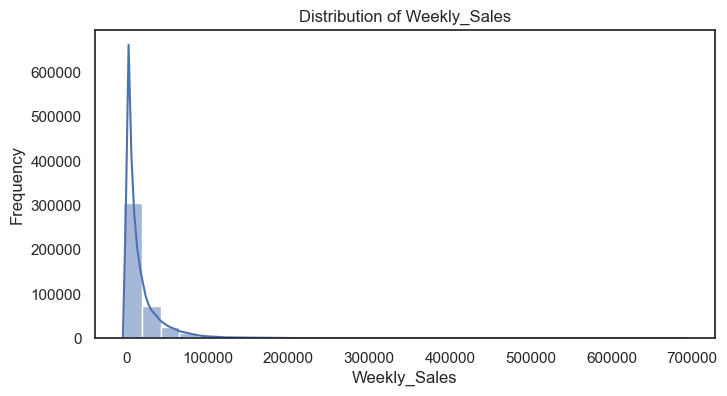

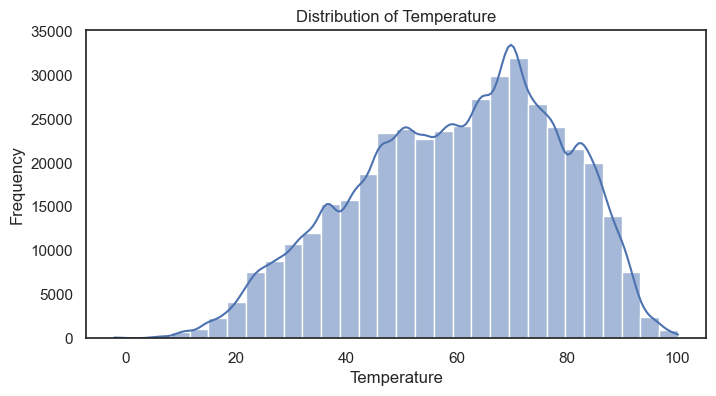

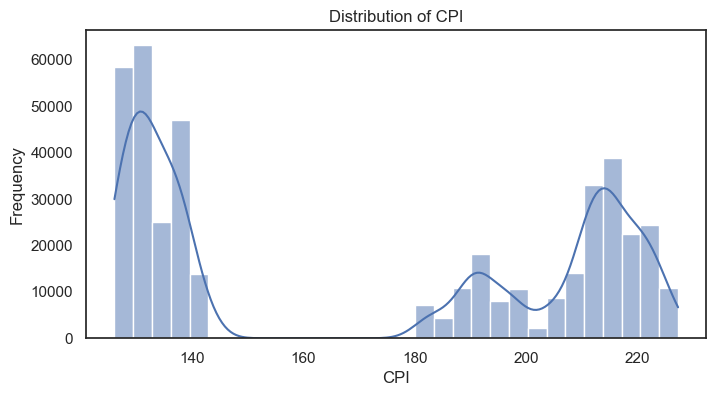

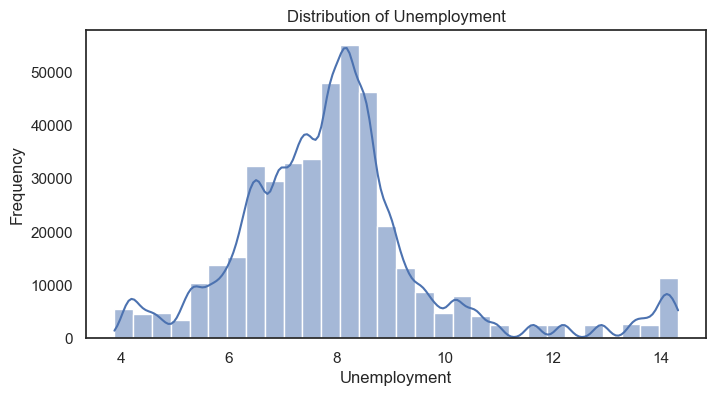

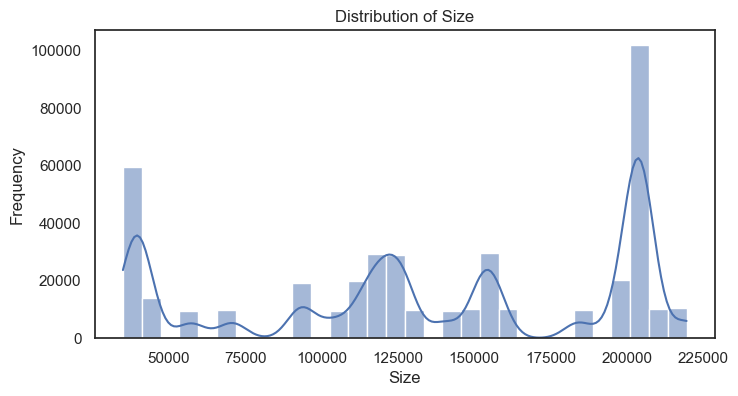

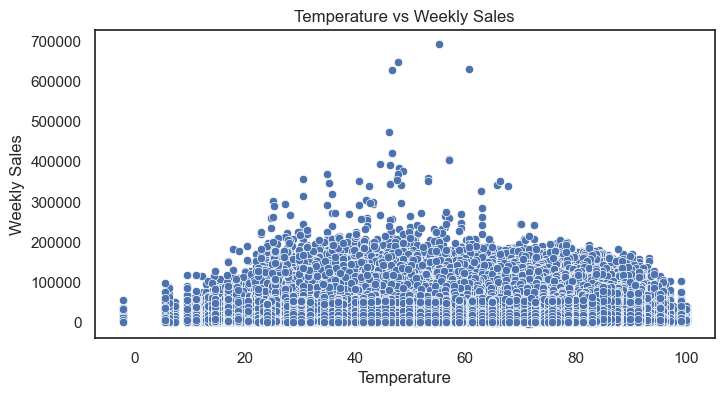

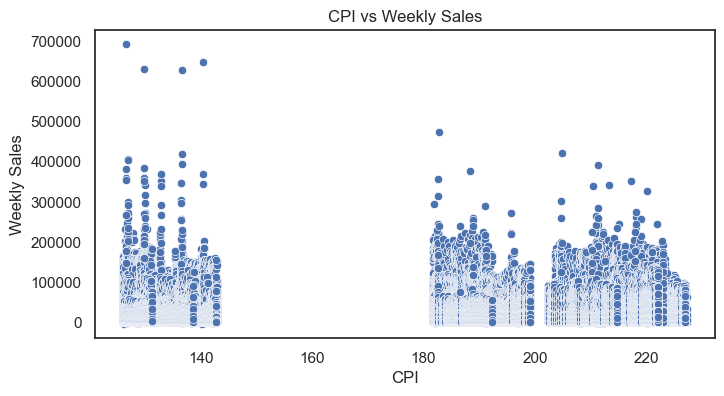

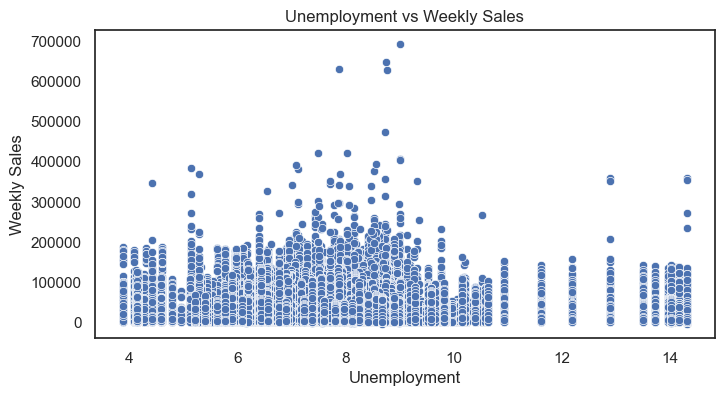

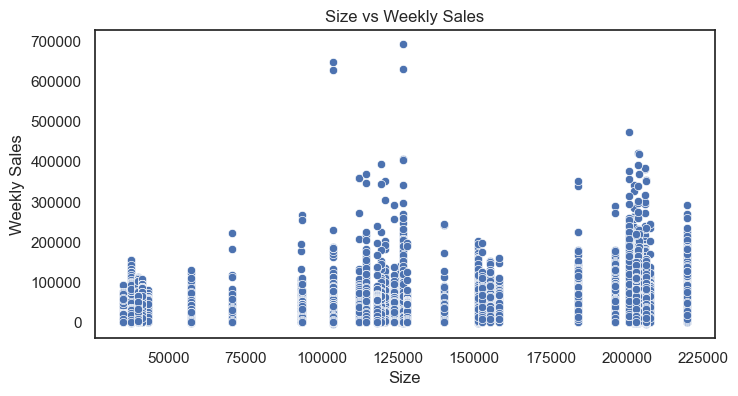

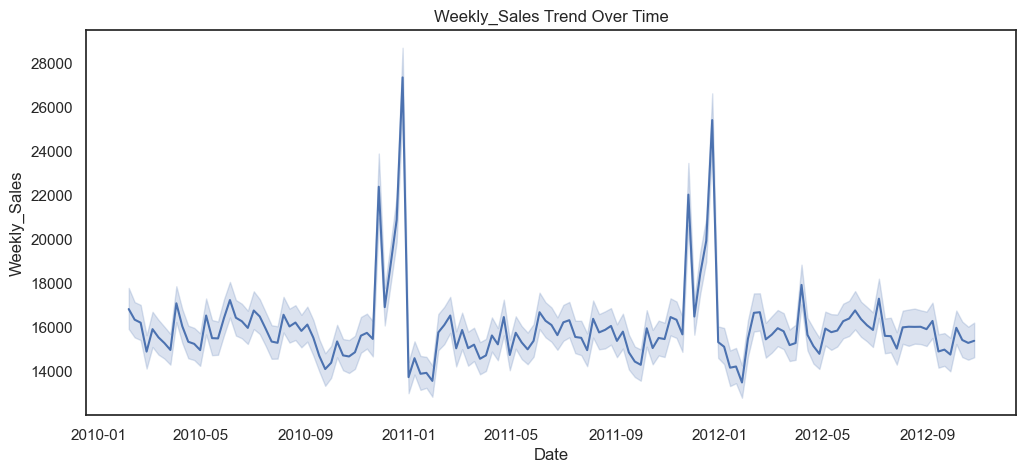

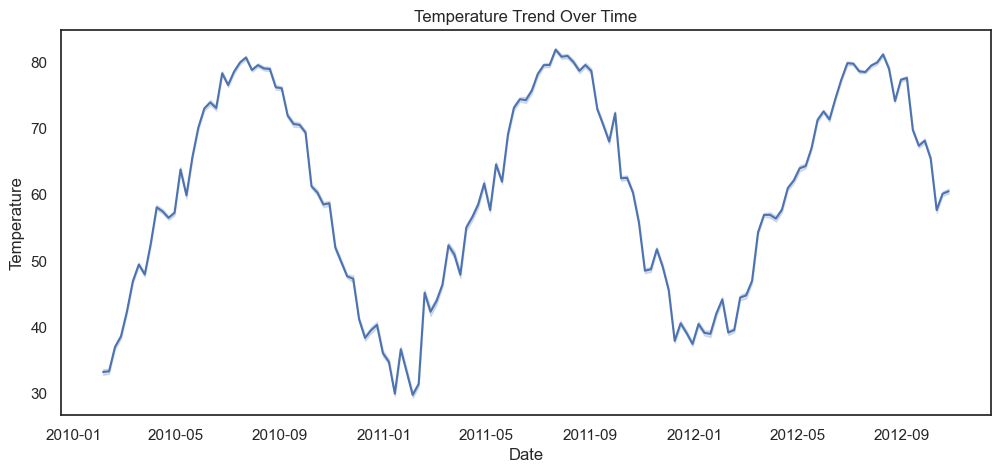

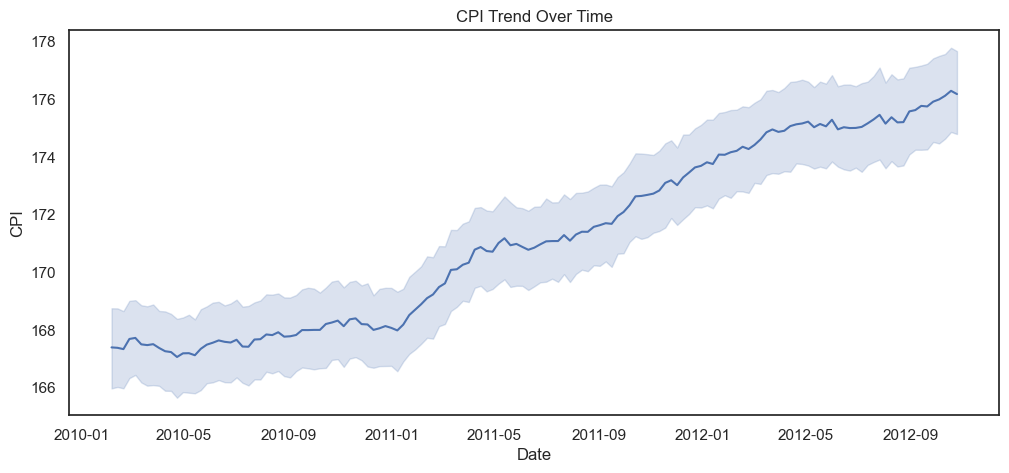

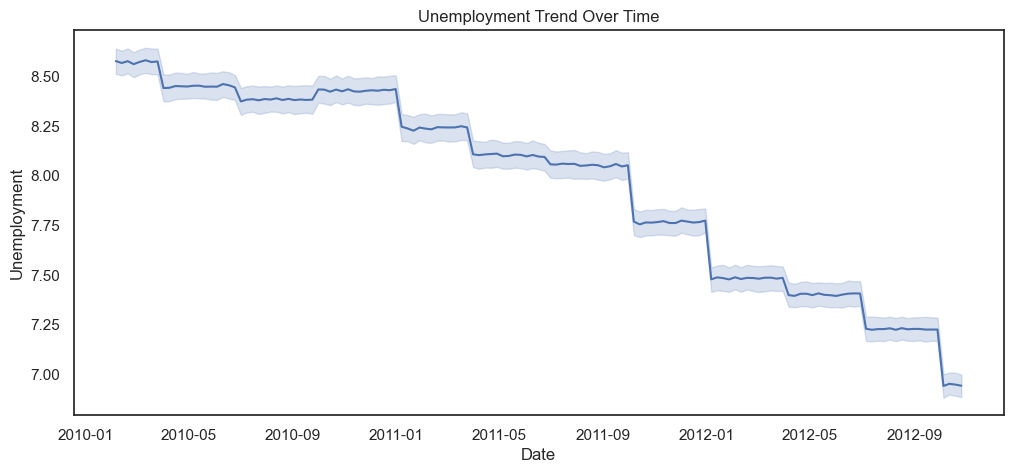

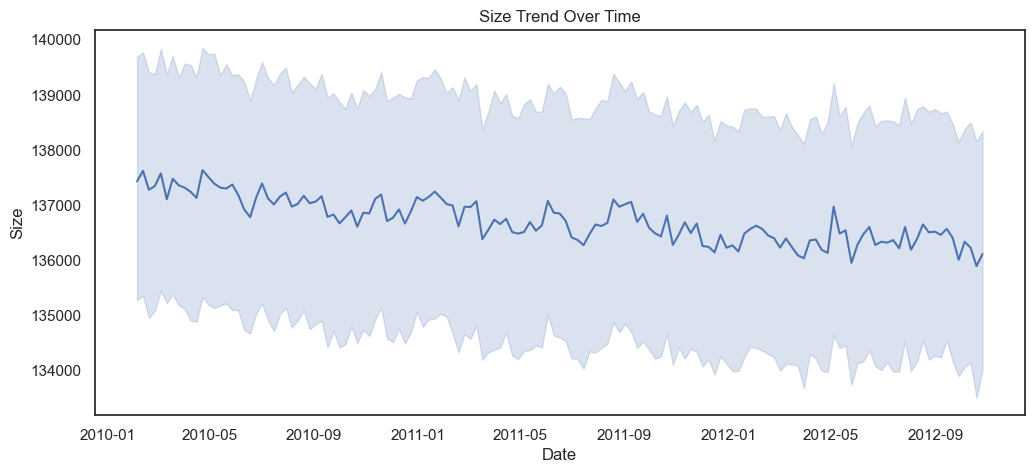

In [124]:

# Continuous columns
continuous_cols = ["Weekly_Sales", "Temperature", "CPI", "Unemployment", "Size"]

# -----------------------------
# Histogram (distribution)
# -----------------------------
for col in continuous_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(train_data[col], bins=30, kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

# -----------------------------
# Scatter plot vs Weekly Sales
# -----------------------------
for col in continuous_cols:
    if col != "Weekly_Sales":  # Skip plotting sales vs sales
        plt.figure(figsize=(8, 4))
        sns.scatterplot(x=train_data[col], y=train_data["Weekly_Sales"])
        plt.title(f"{col} vs Weekly Sales")
        plt.xlabel(col)
        plt.ylabel("Weekly Sales")
        plt.show()

# -----------------------------
# Line plot over Date
# -----------------------------
for col in continuous_cols:
    plt.figure(figsize=(12, 5))
    sns.lineplot(x="Date", y=col, data=train_data)
    plt.title(f"{col} Trend Over Time")
    plt.xlabel("Date")
    plt.ylabel(col)
    plt.show()


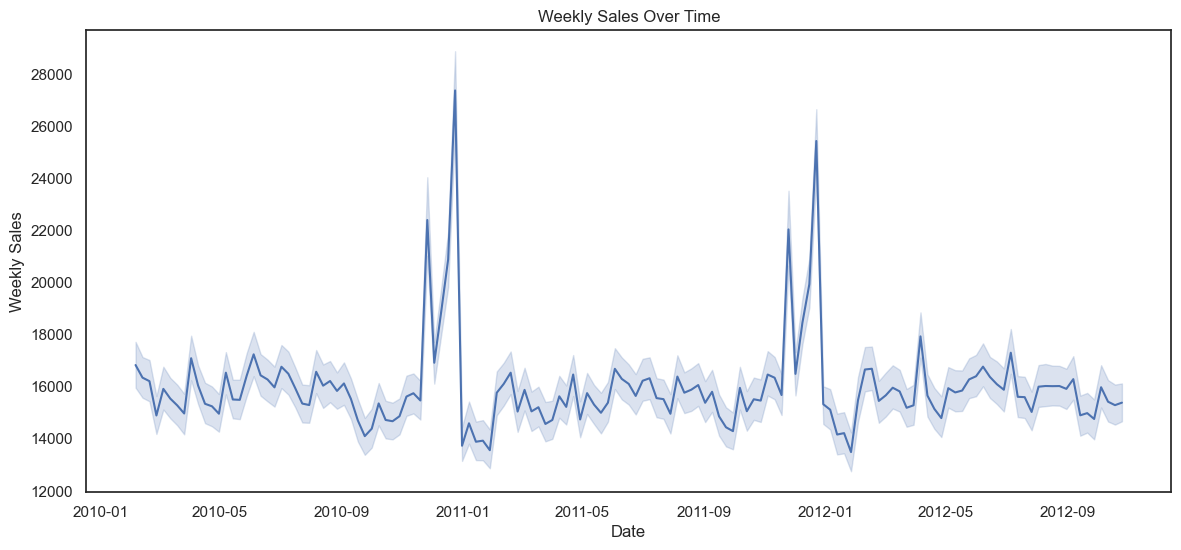

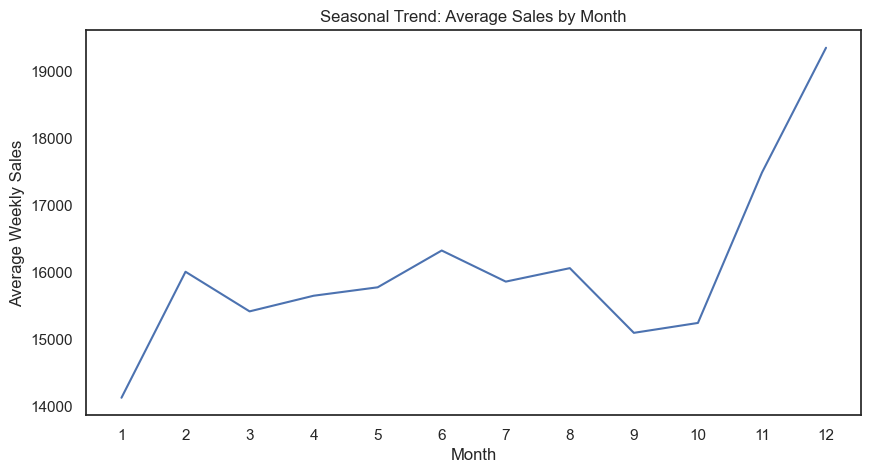

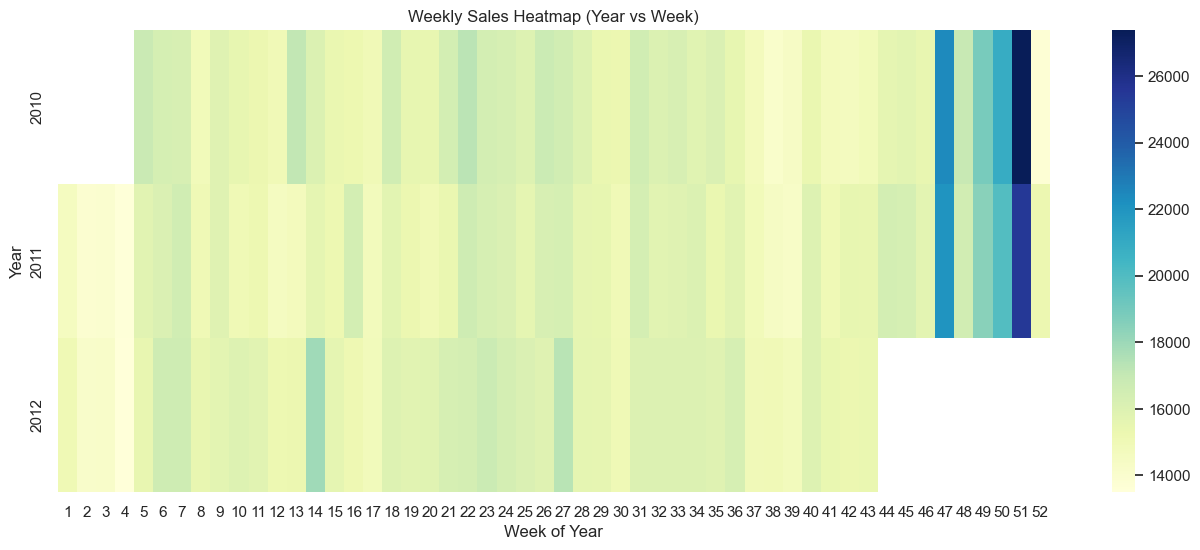

In [125]:

# Ensure Date is datetime
train_data["Date"] = pd.to_datetime(train_data["Date"])

# Extract time features
train_data["Month"] = train_data["Date"].dt.month
train_data["WeekOfYear"] = train_data["Date"].dt.isocalendar().week

# -----------------------------
# 1. Line Plot (Sales over time)
# -----------------------------
plt.figure(figsize=(14, 6))
sns.lineplot(x="Date", y="Weekly_Sales", data=train_data)
plt.title("Weekly Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.show()

# -----------------------------
# 2. Seasonal Plot (Month-wise average sales)
# -----------------------------
plt.figure(figsize=(10, 5))
sns.lineplot(x="Month", y="Weekly_Sales", data=train_data, estimator="mean", ci=None)
plt.title("Seasonal Trend: Average Sales by Month")
plt.xlabel("Month")
plt.ylabel("Average Weekly Sales")
plt.xticks(range(1,13))
plt.show()

# -----------------------------
# 3. Heatmap (Week vs Year)
# -----------------------------
pivot = train_data.pivot_table(values="Weekly_Sales",
                       index="Year",
                       columns="Week",
                       aggfunc="mean")

plt.figure(figsize=(16, 6))
sns.heatmap(pivot, cmap="YlGnBu", annot=False, cbar=True)
plt.title("Weekly Sales Heatmap (Year vs Week)")
plt.xlabel("Week of Year")
plt.ylabel("Year")
plt.show()


### Weekly_Sales x Type

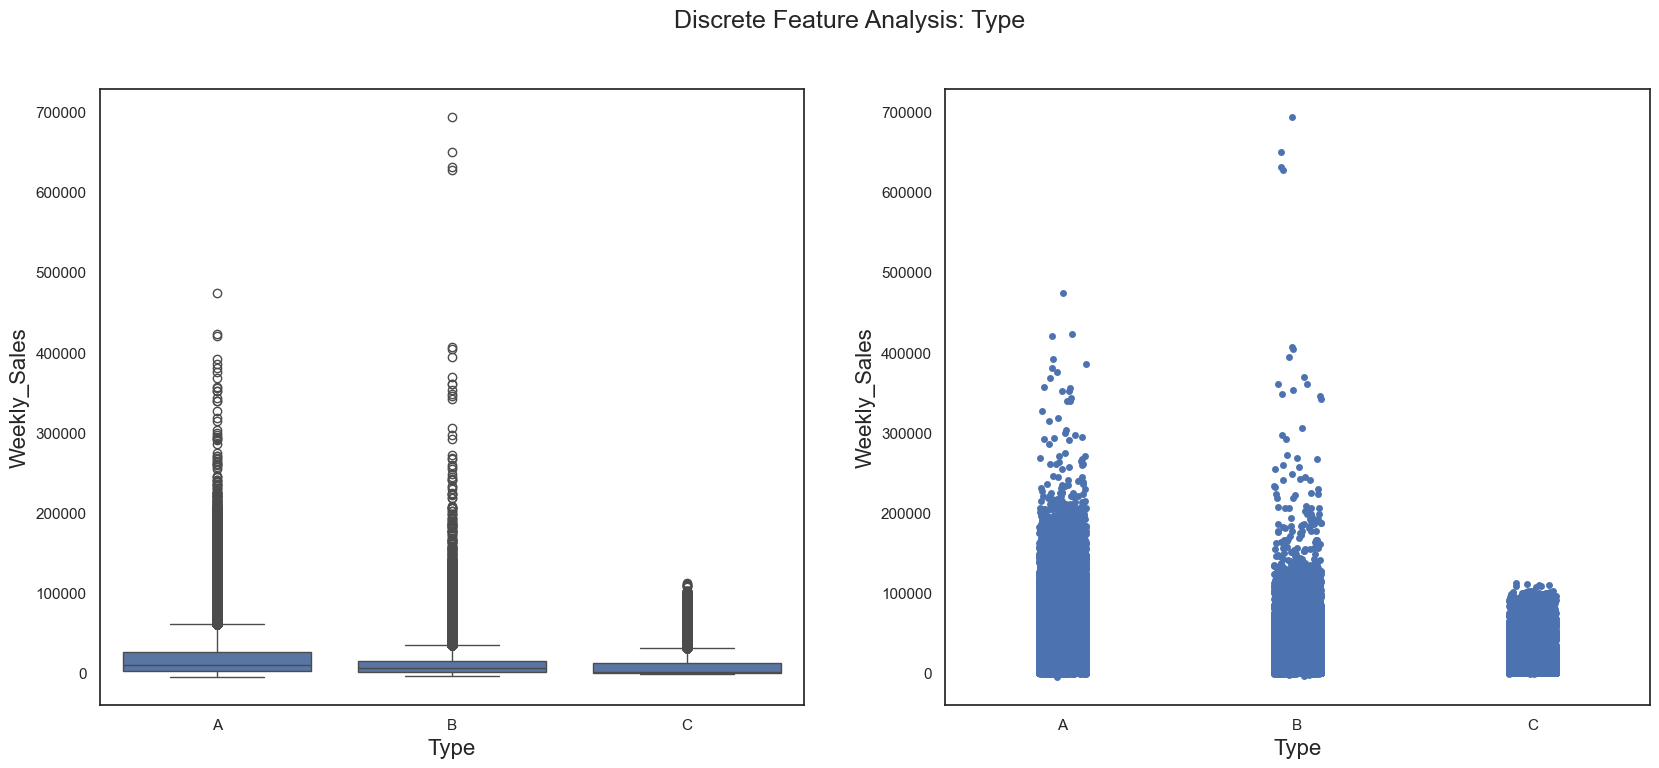

In [126]:
make_discrete_plot('Type')

In [127]:
train_data.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'CPI', 'Unemployment', 'Type', 'Size', 'Week', 'Year', 'Month',
       'WeekOfYear'],
      dtype='object')

In [128]:
train_data.dtypes


Store                    int64
Dept                     int64
Date            datetime64[ns]
Weekly_Sales           float64
IsHoliday                 bool
Temperature            float64
CPI                    float64
Unemployment           float64
Type                    object
Size                     int64
Week                    UInt32
Year                     int32
Month                    int32
WeekOfYear              UInt32
dtype: object

## *All In One Visualization*

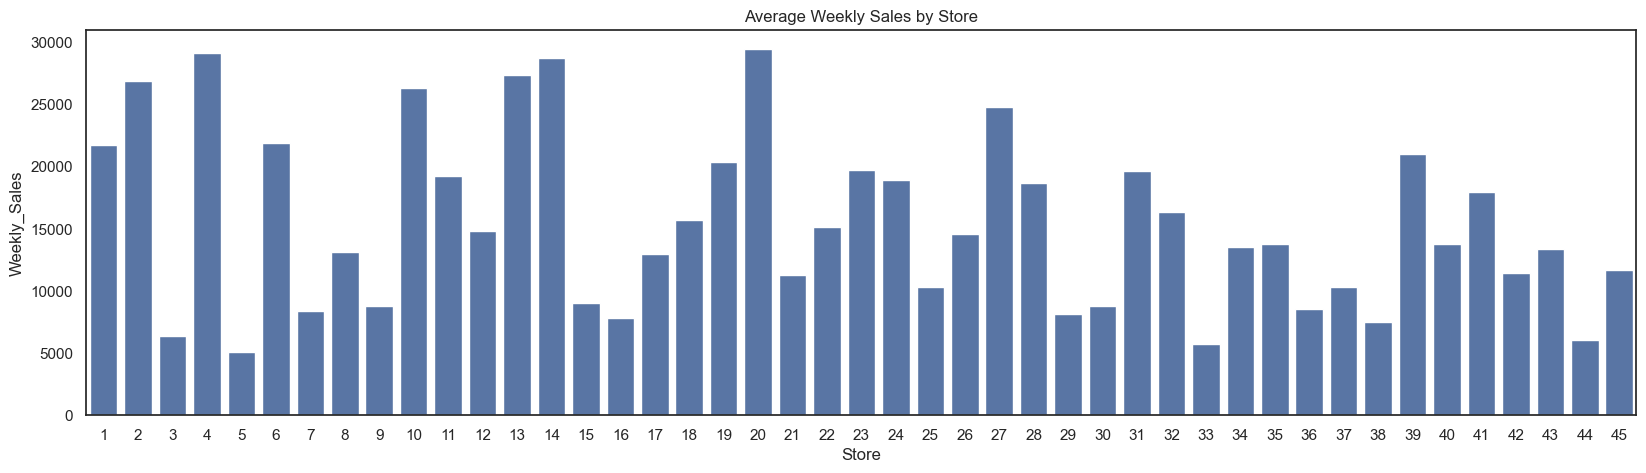

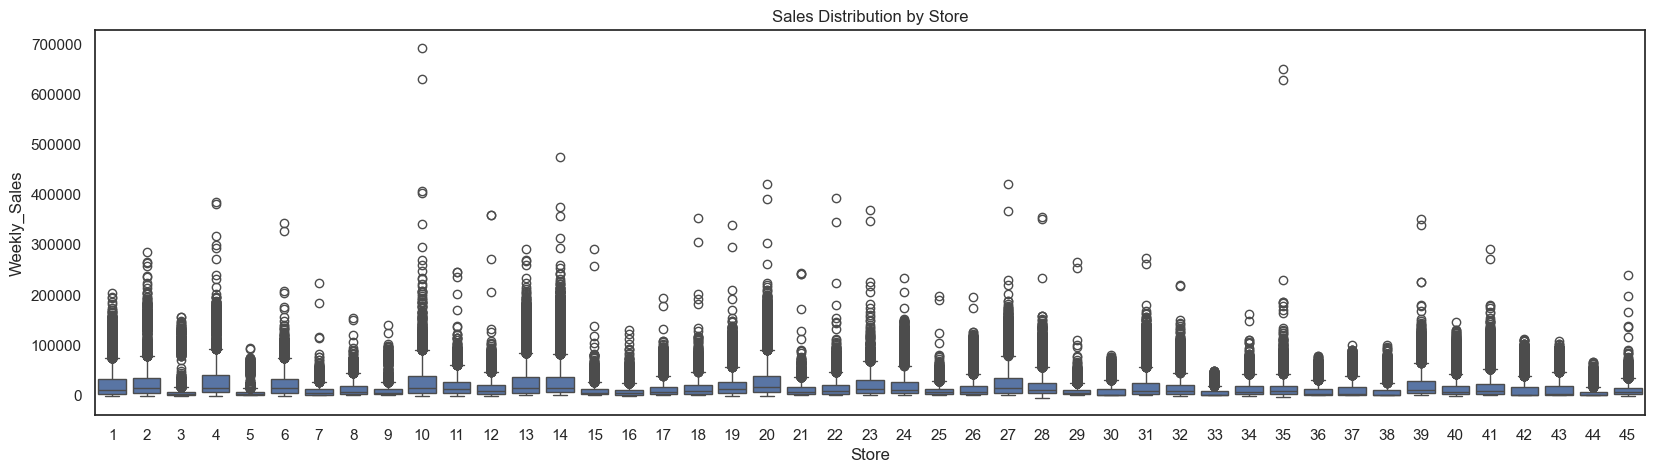

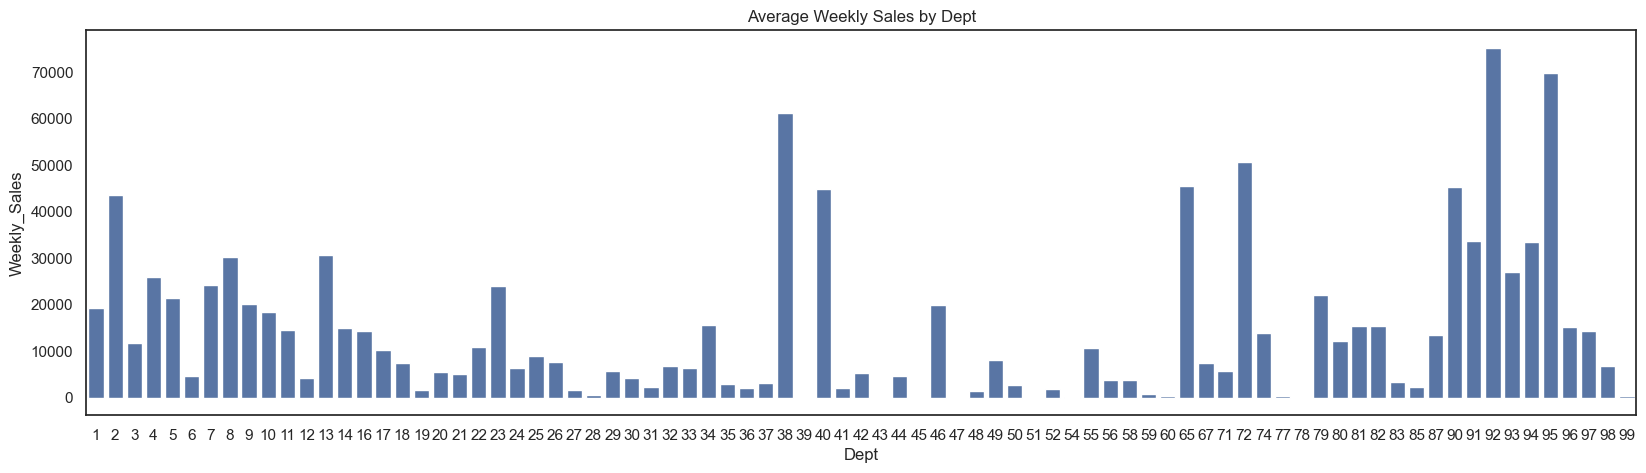

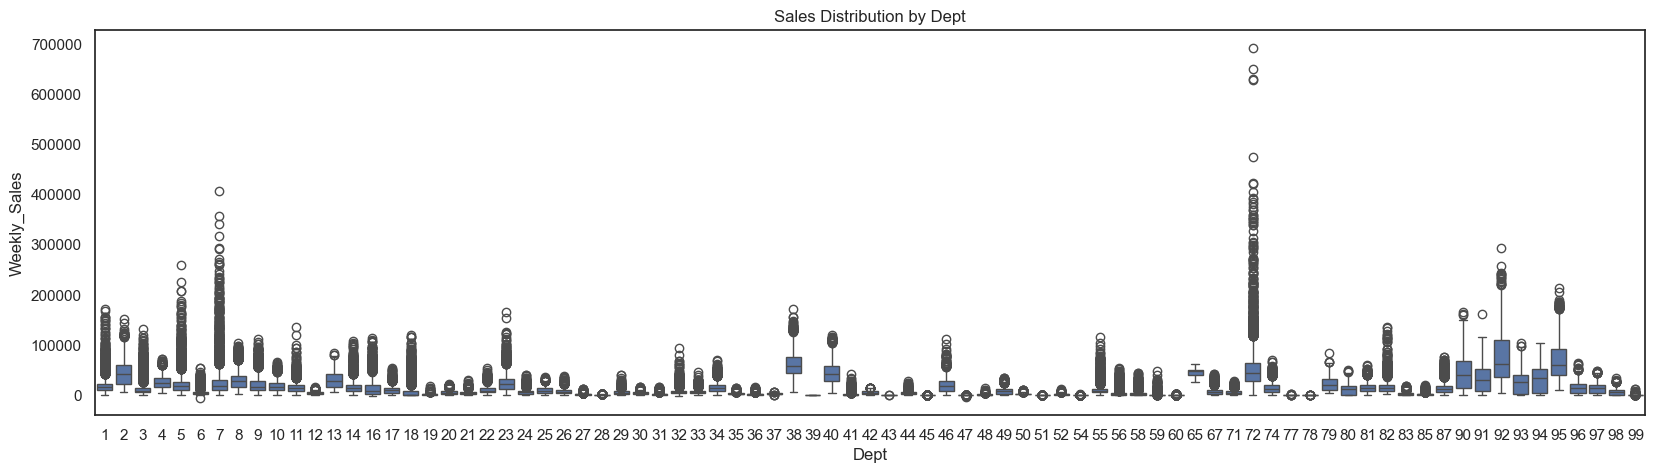

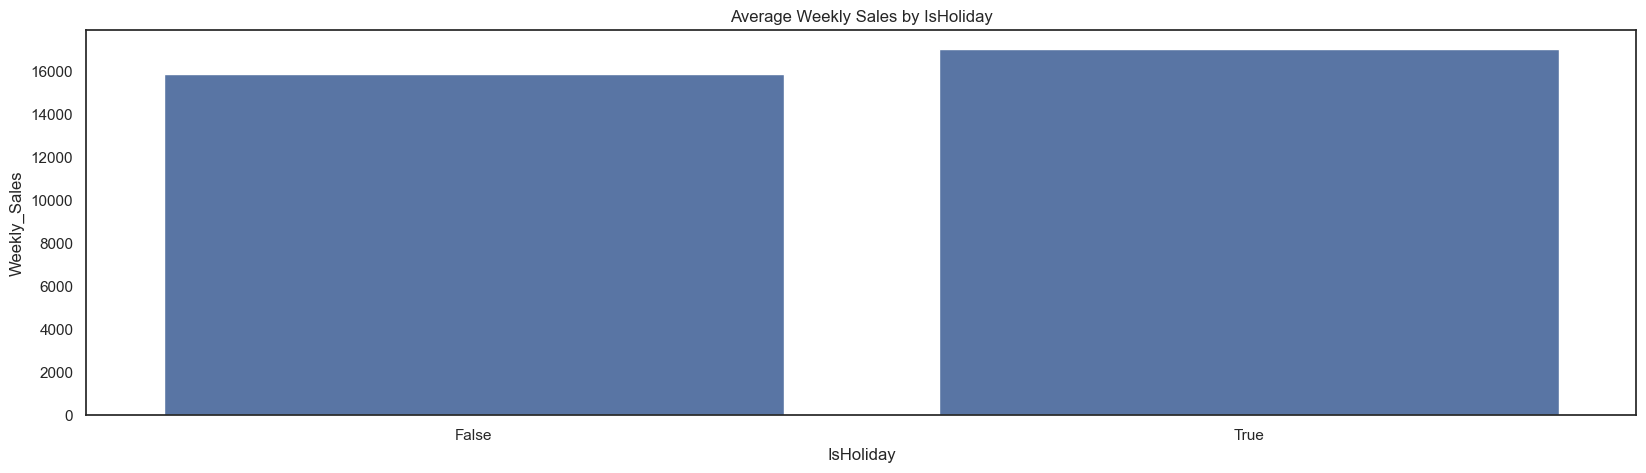

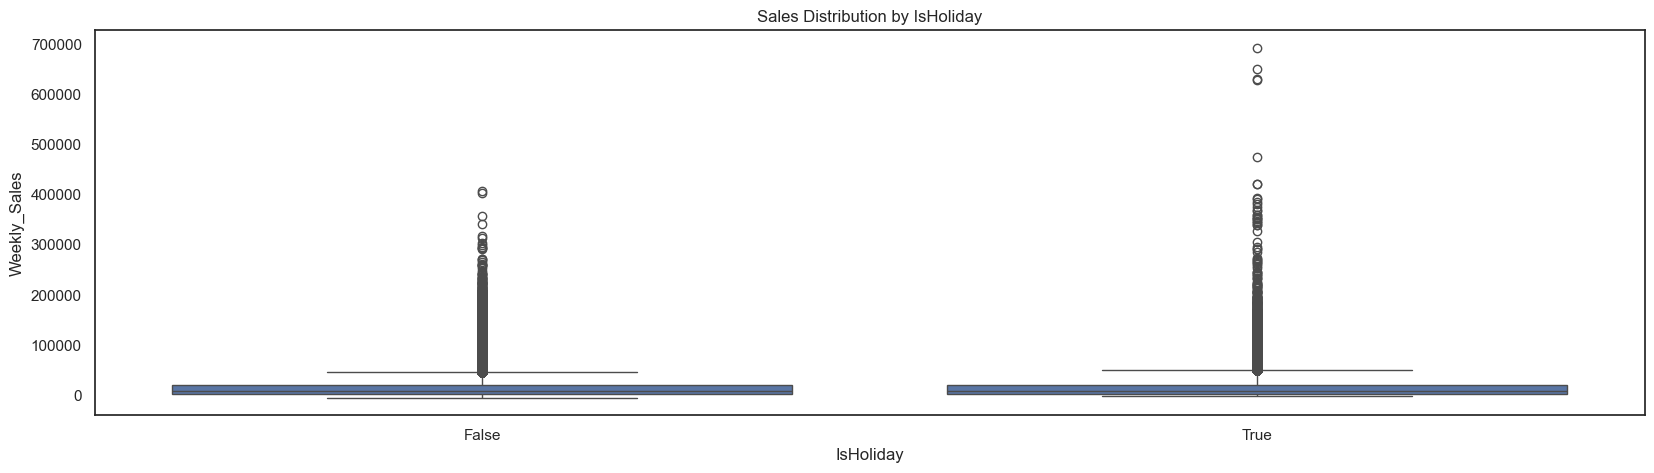

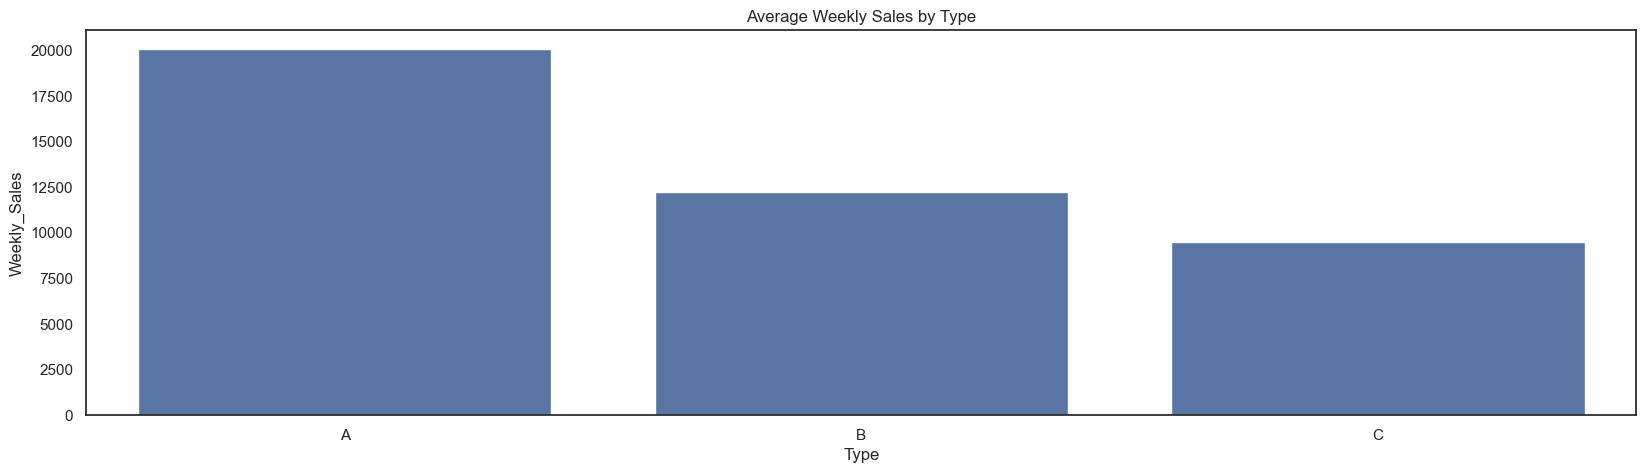

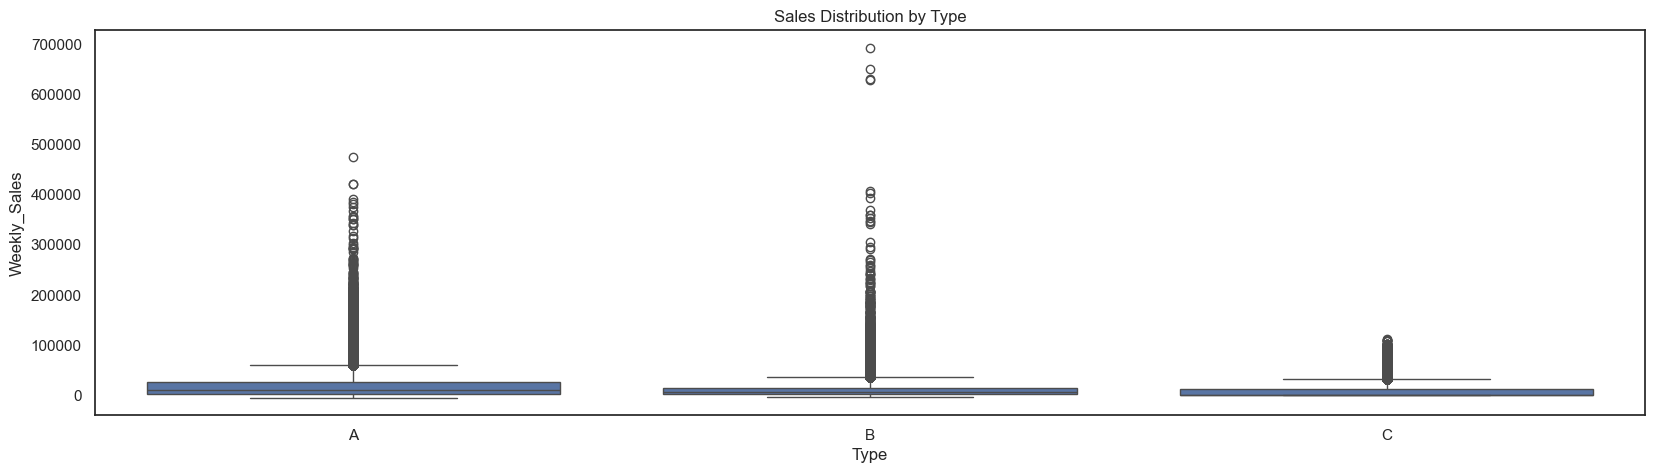

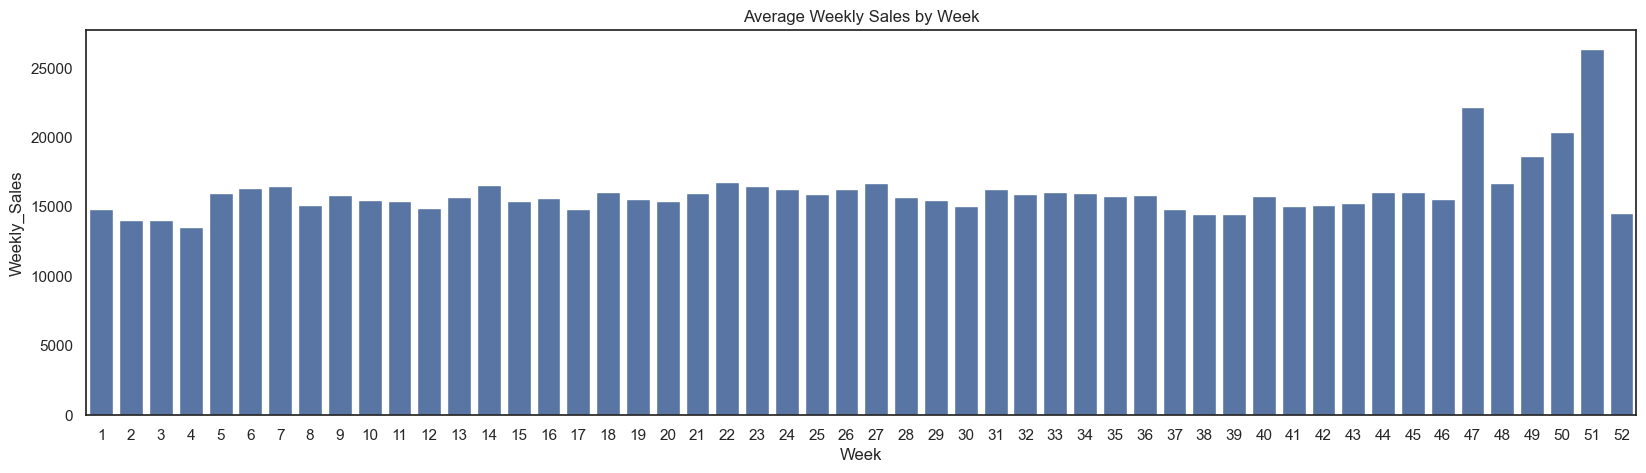

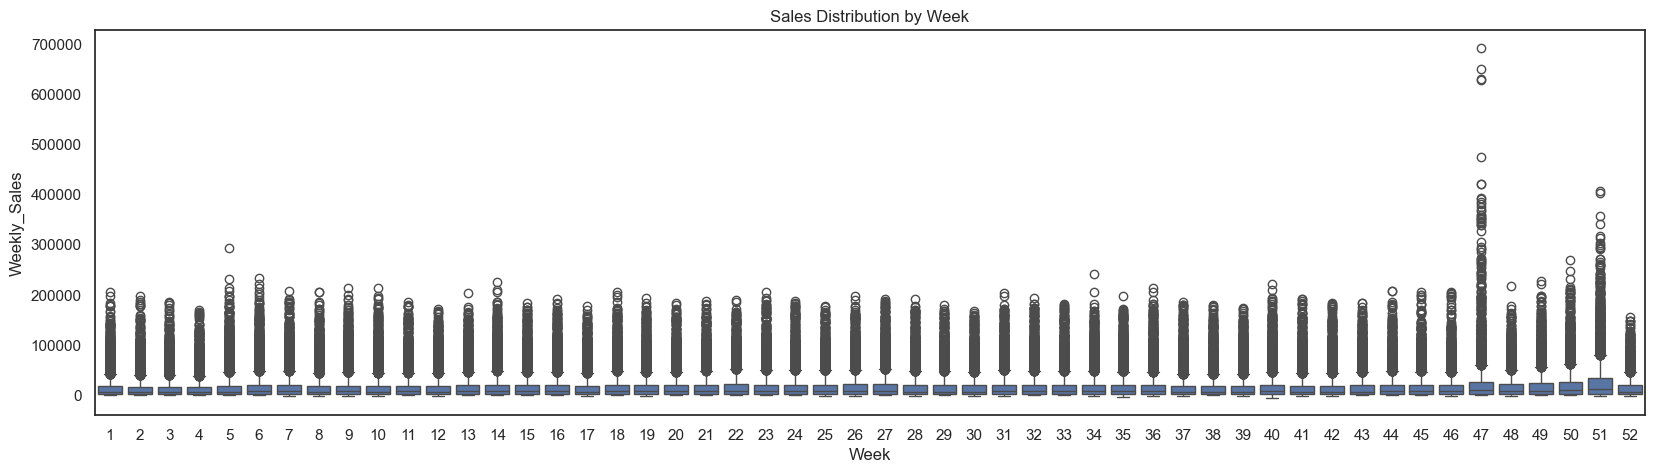

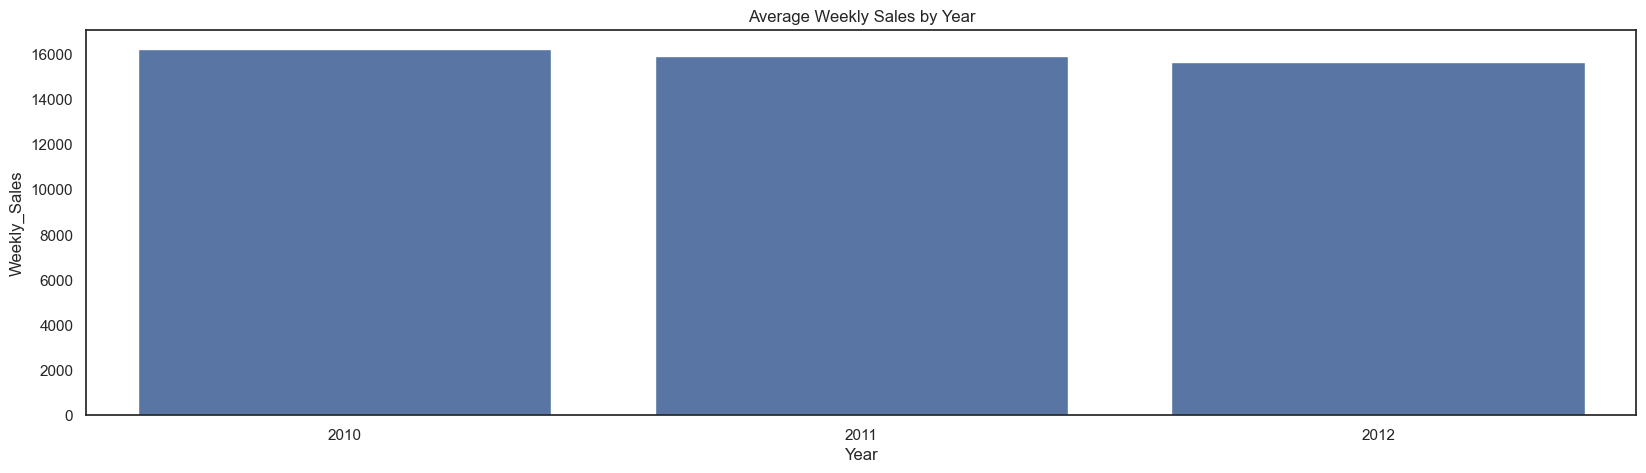

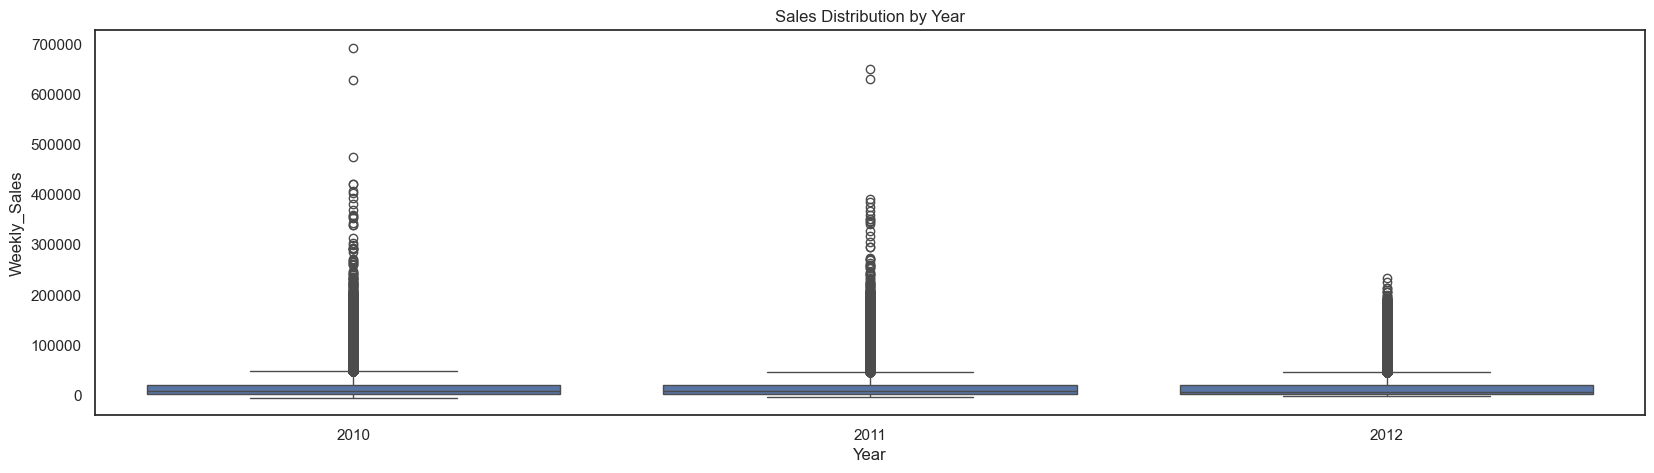

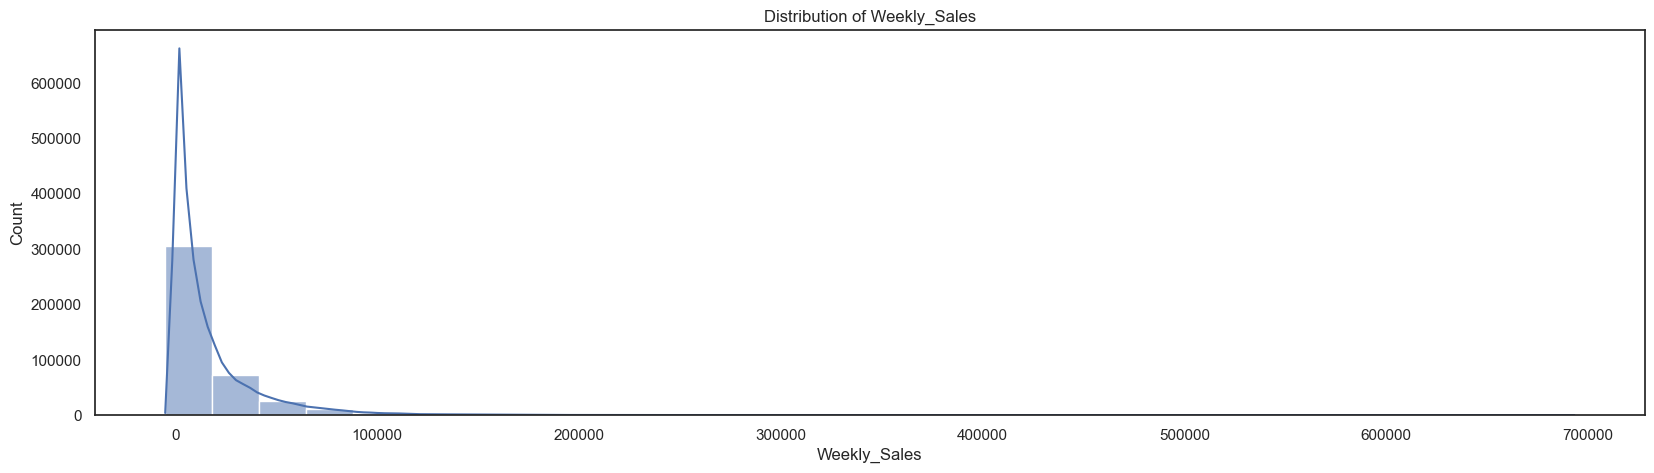

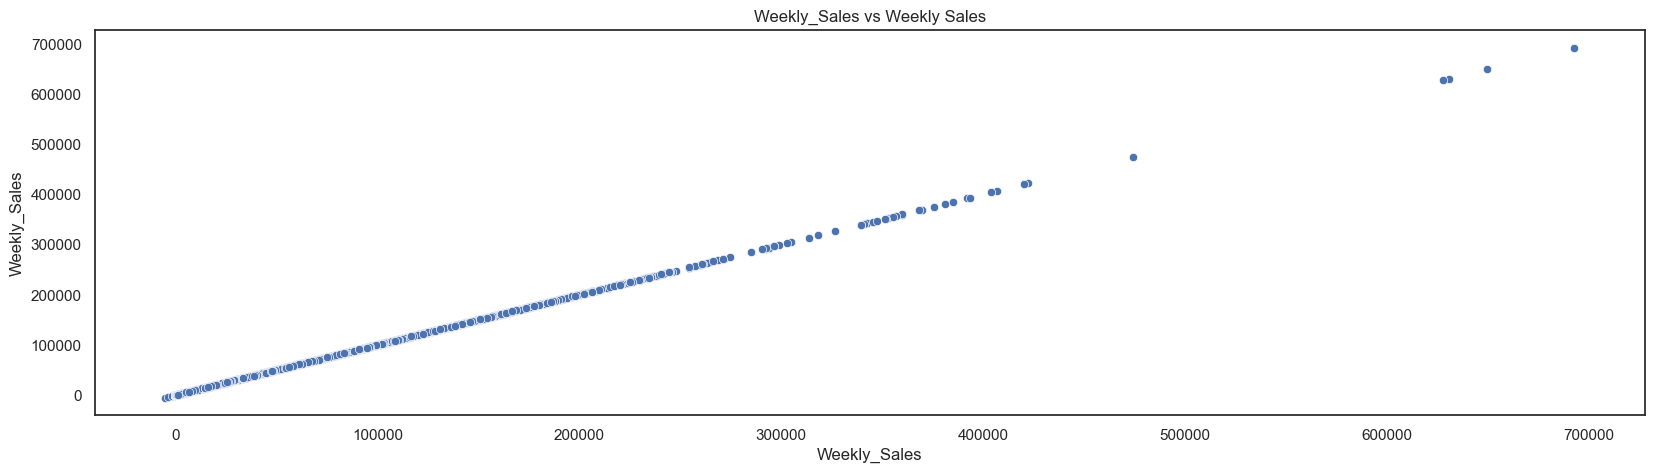

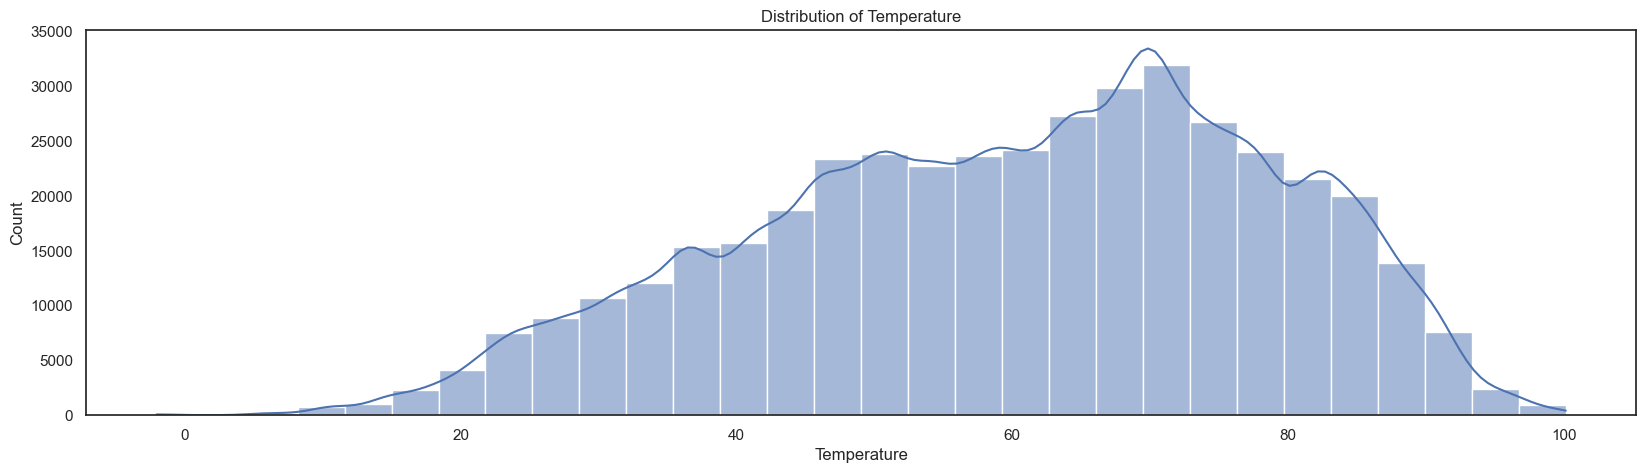

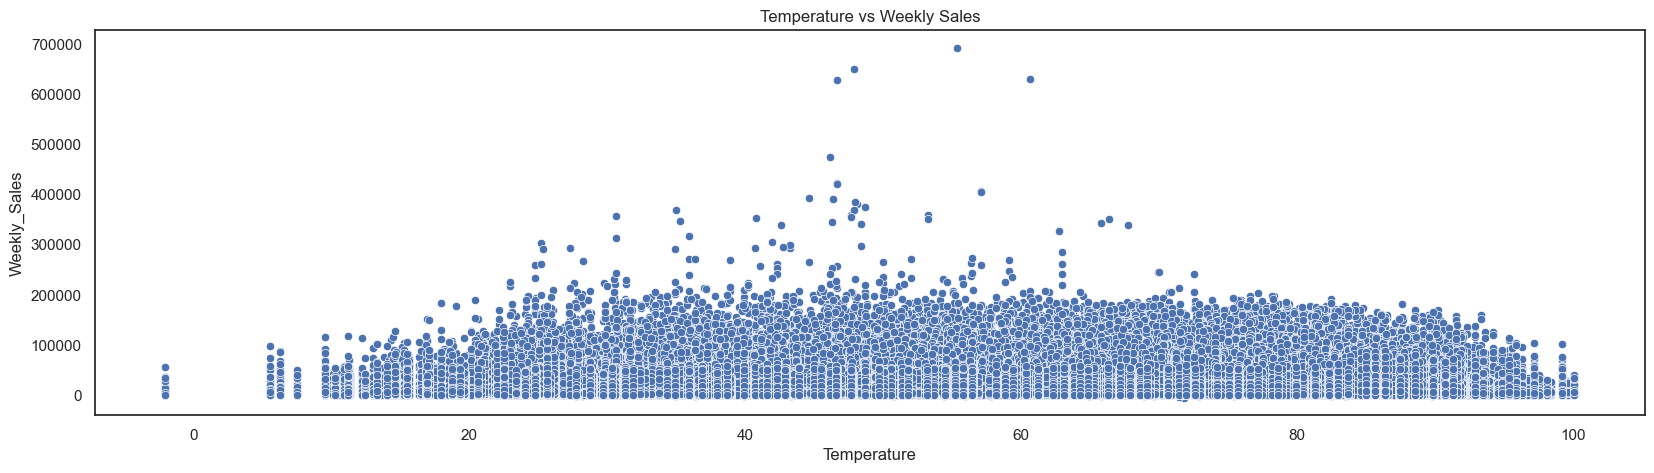

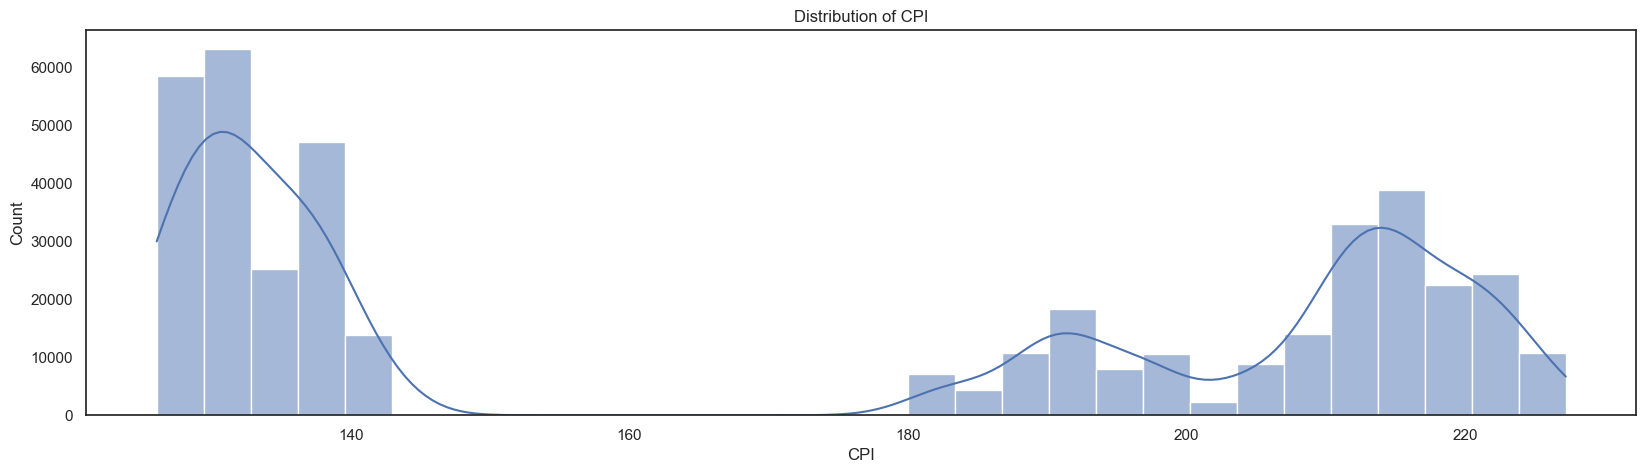

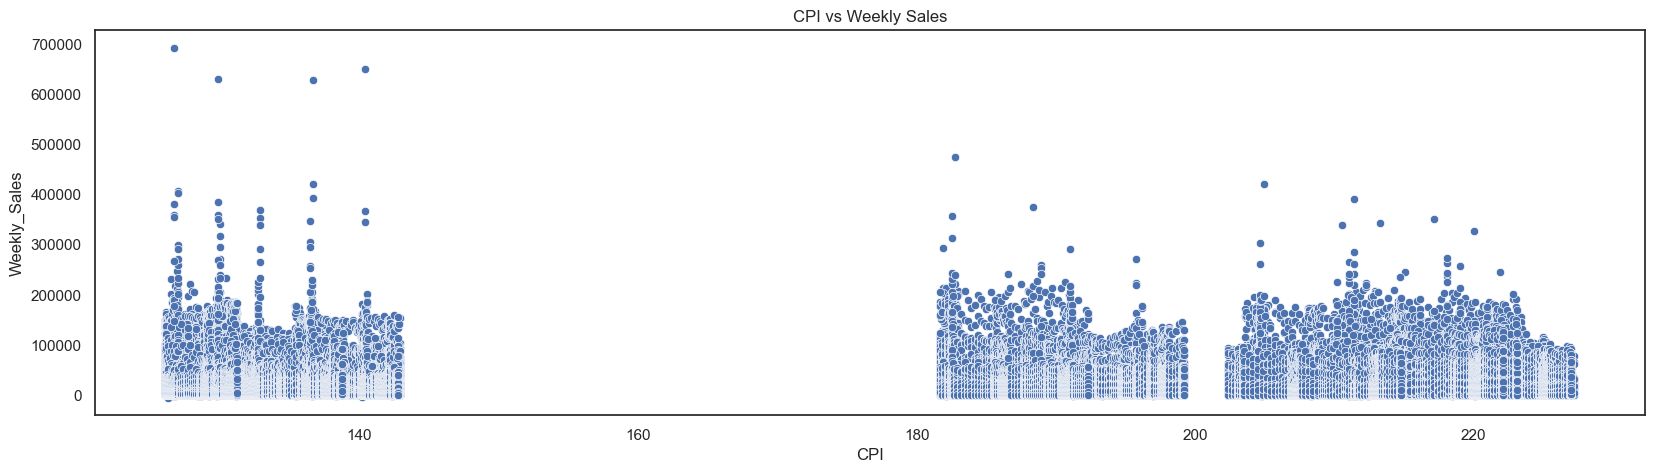

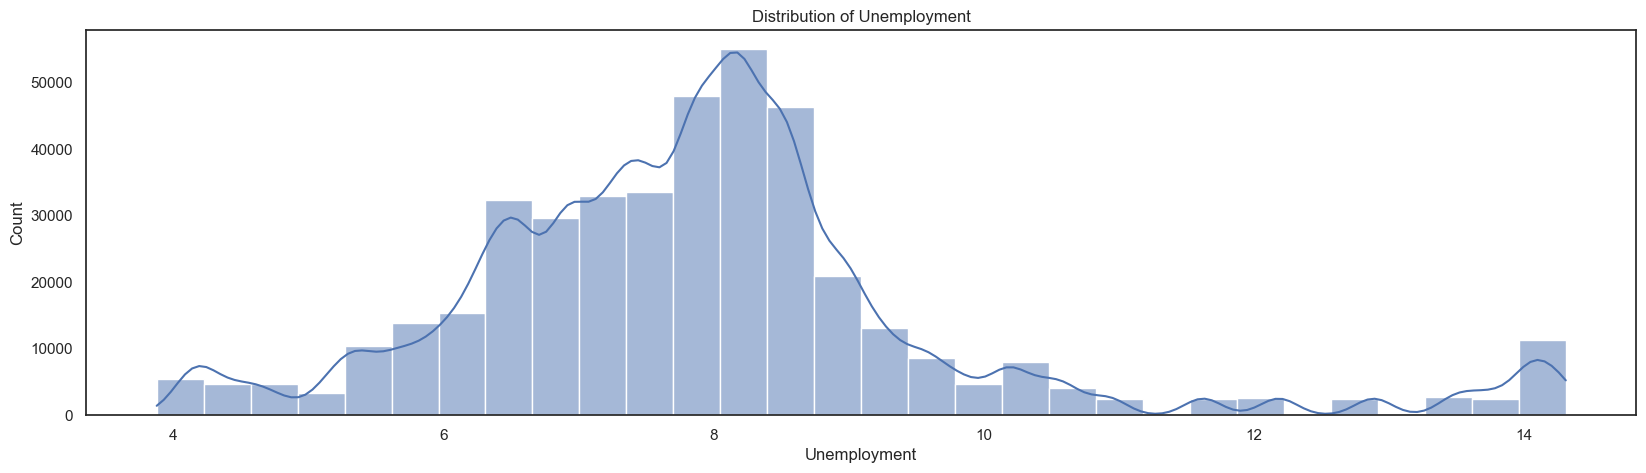

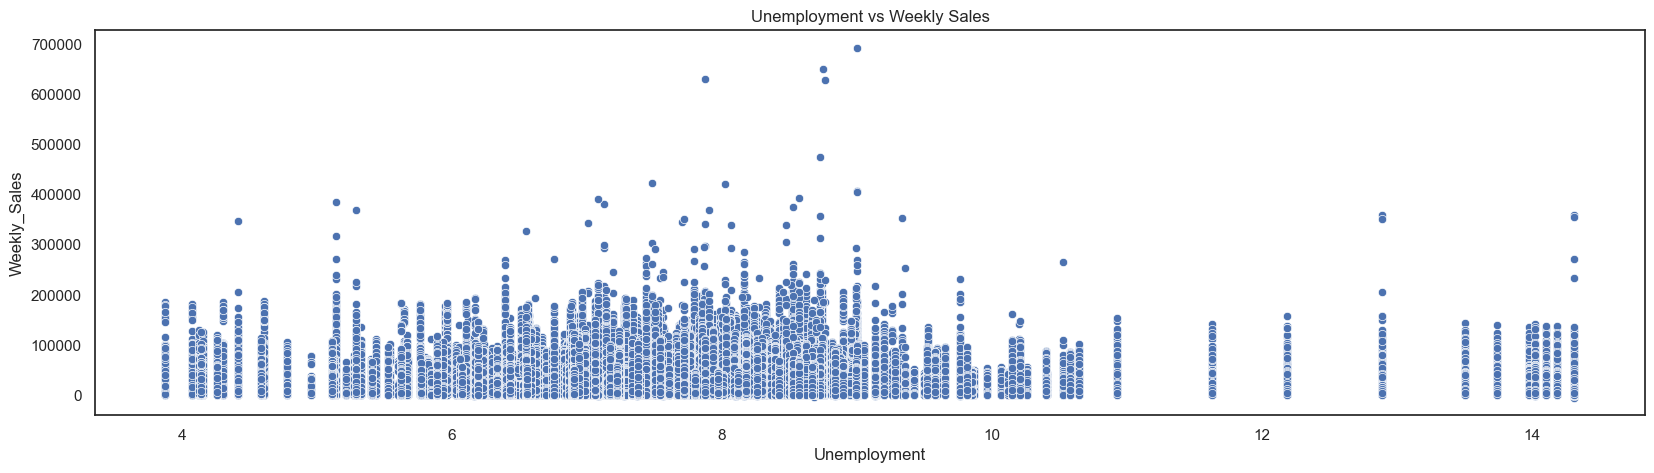

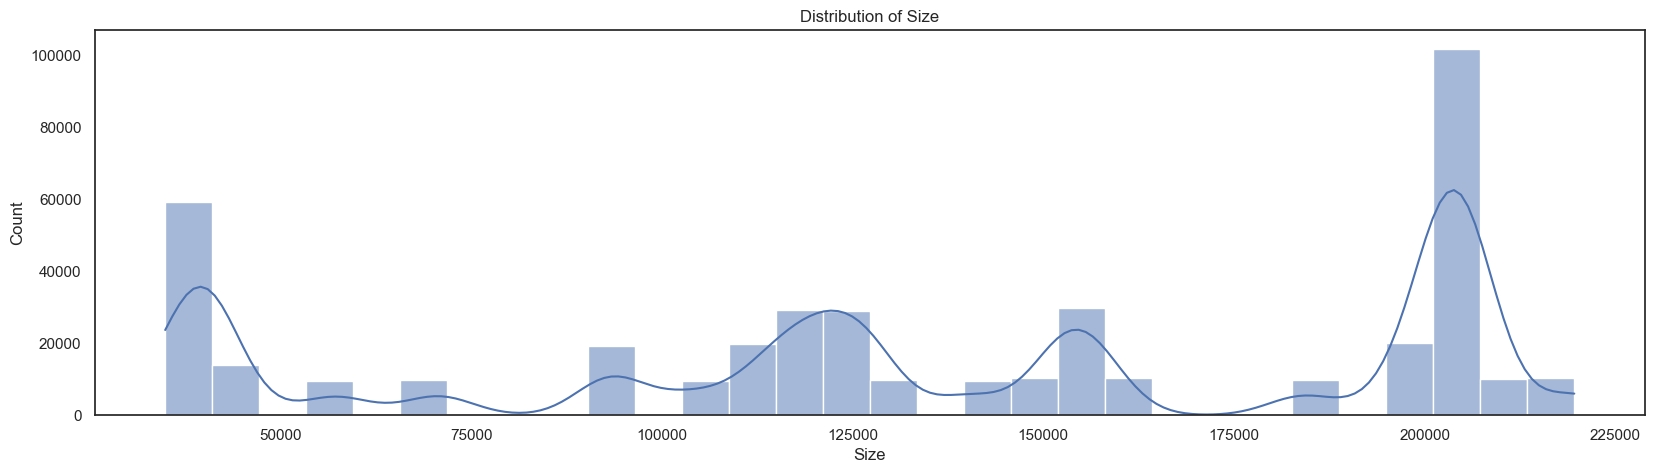

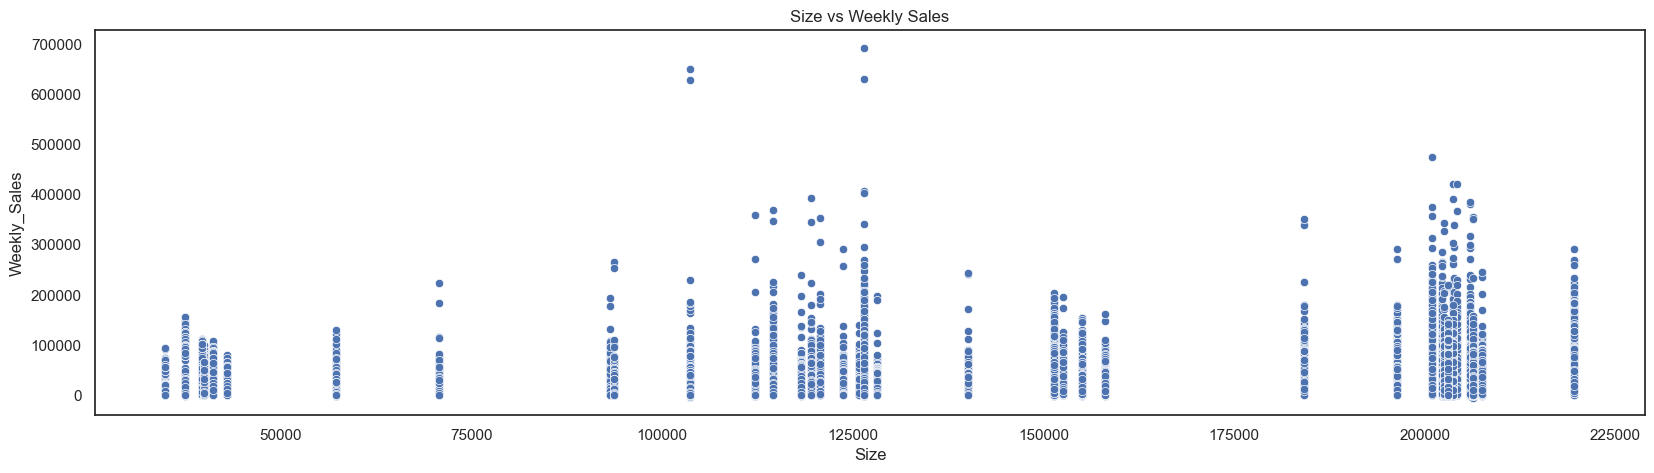

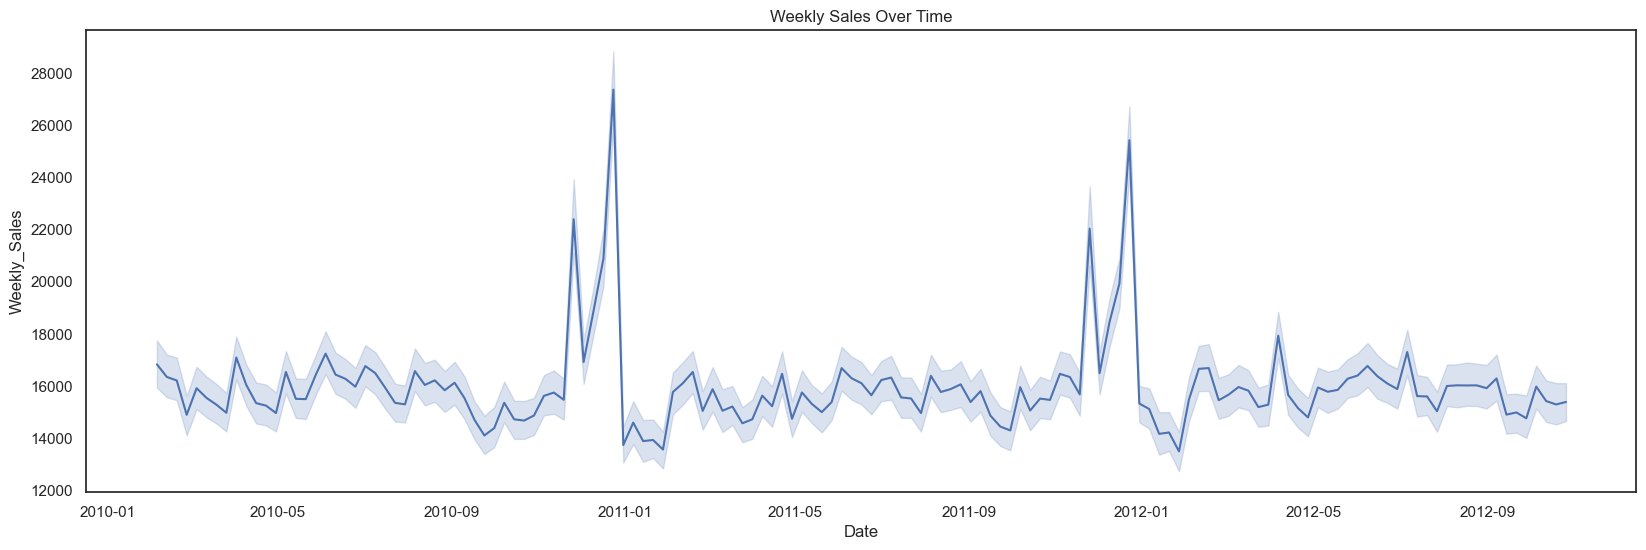

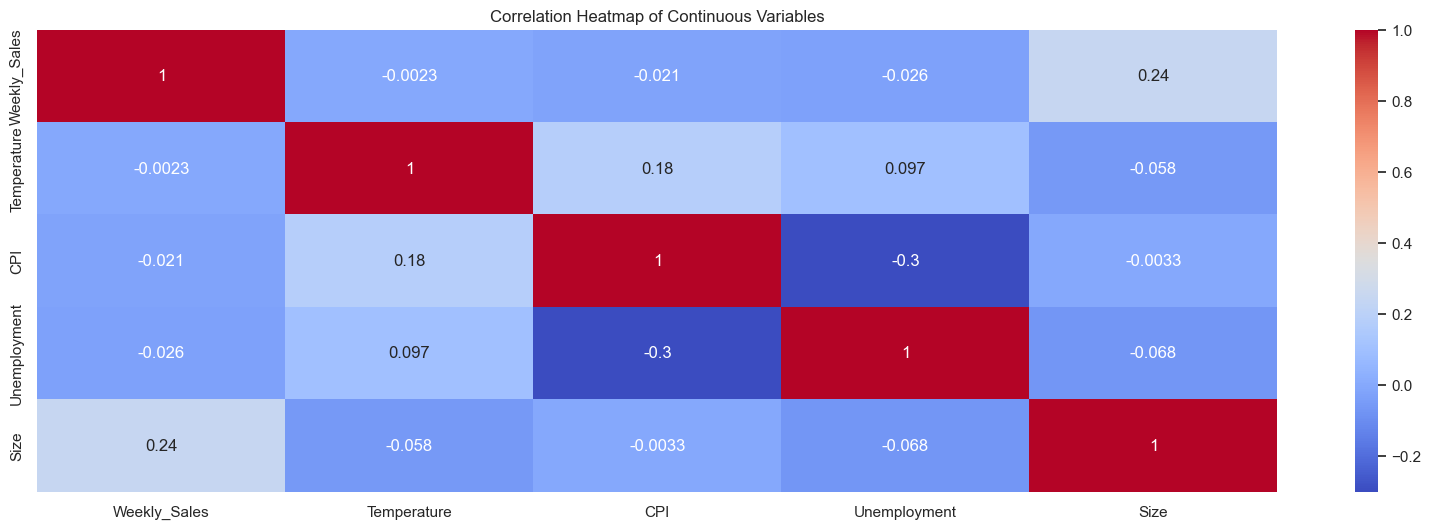

In [131]:


# Categorical, Continuous, Time columns
categorical_cols = ["Store", "Dept", "IsHoliday", "Type", "Week", "Year"]
continuous_cols = ["Weekly_Sales", "Temperature", "CPI", "Unemployment", "Size"]
time_cols = ["Date"]

# -----------------------------
# 1. Categorical Columns
# -----------------------------
for col in categorical_cols:
    plt.figure(figsize=(20, 5))
    sns.barplot(x=col, y="Weekly_Sales", data=train_data, estimator="mean", ci=None)
    plt.title(f"Average Weekly Sales by {col}")
    plt.xticks(rotation=0)
    plt.show()

    plt.figure(figsize=(20, 5))
    sns.boxplot(x=col, y="Weekly_Sales", data=train_data)
    plt.title(f"Sales Distribution by {col}")
    plt.xticks(rotation=0)
    plt.show()

# -----------------------------
# 2. Continuous Columns
# -----------------------------
for col in continuous_cols:
    plt.figure(figsize=(20, 5))
    sns.histplot(train_data[col], bins=30, kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

    plt.figure(figsize=(20, 5))
    sns.scatterplot(x=col, y="Weekly_Sales", data=train_data)
    plt.title(f"{col} vs Weekly Sales")
    plt.show()

# -----------------------------
# 3. Time Series
# -----------------------------
for col in time_cols:
    plt.figure(figsize=(20, 6))
    sns.lineplot(x=col, y="Weekly_Sales", data=train_data)
    plt.title("Weekly Sales Over Time")
    plt.show()

# -----------------------------
# 4. Correlation Heatmap (extra)
# -----------------------------
plt.figure(figsize=(20, 6))
sns.heatmap(train_data[continuous_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Continuous Variables")
plt.show()


#### Monthly Sales

<Axes: xlabel='Month'>

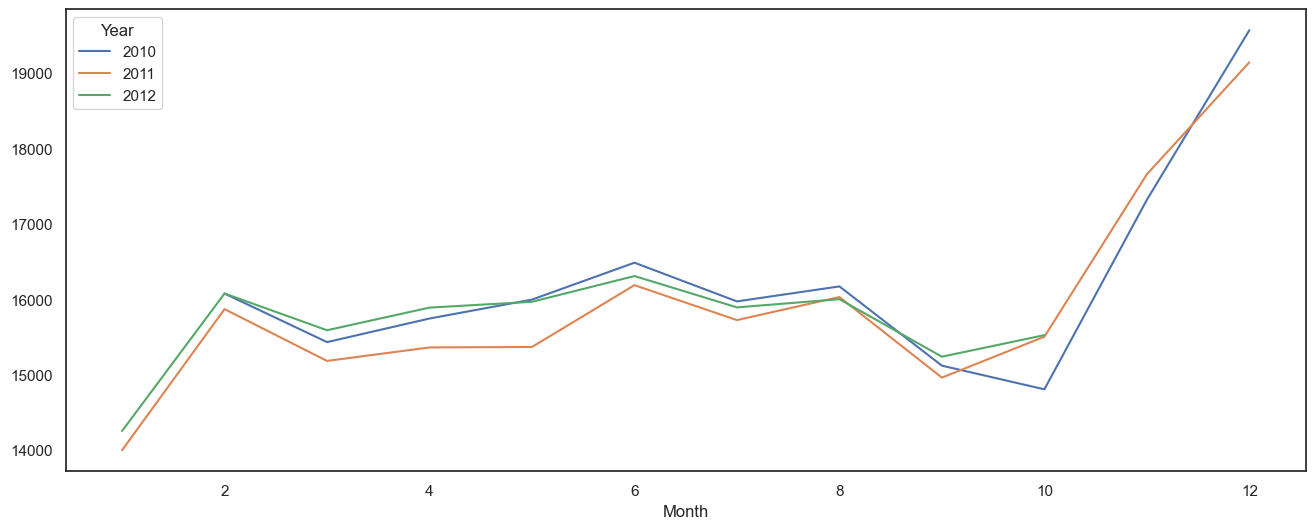

In [132]:
monthly_sales = pd.pivot_table(train_data, values = "Weekly_Sales", columns = "Year", index = "Month")
monthly_sales.plot(figsize=(16, 6))

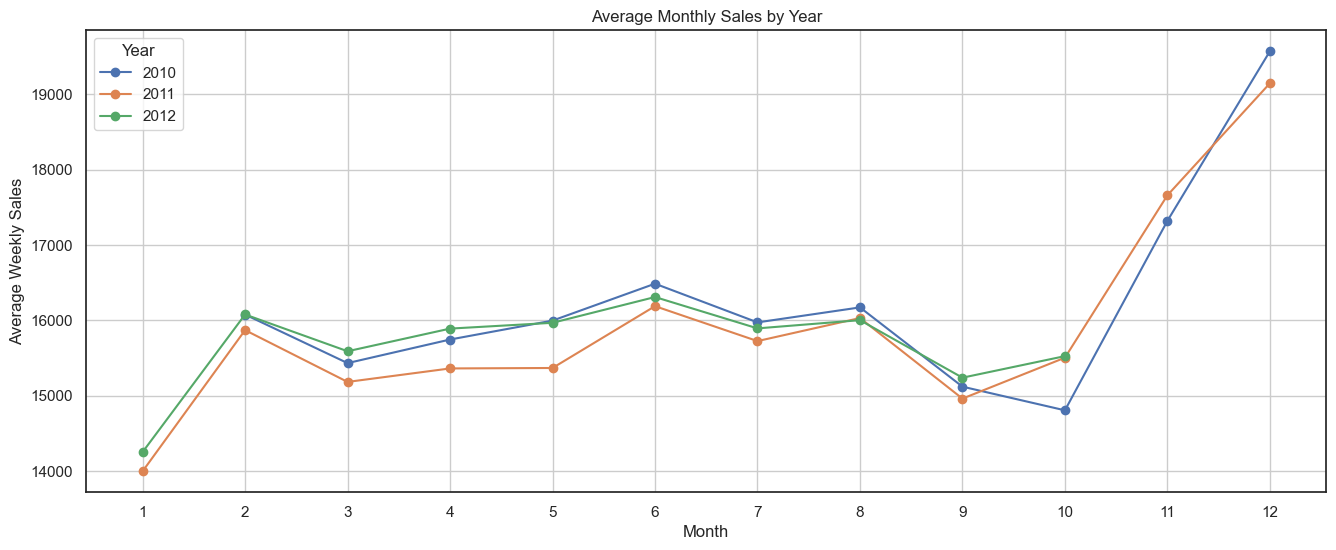

In [133]:
monthly_sales = pd.pivot_table(train_data, 
                               values="Weekly_Sales", 
                               columns="Year", 
                               index="Month", 
                               aggfunc="mean")

monthly_sales.plot(figsize=(16, 6), marker="o")
plt.title("Average Monthly Sales by Year")
plt.xlabel("Month")
plt.ylabel("Average Weekly Sales")
plt.xticks(range(1,13))
plt.legend(title="Year")
plt.grid(True)
plt.show()


#### Weekly Sales

<Axes: xlabel='Week'>

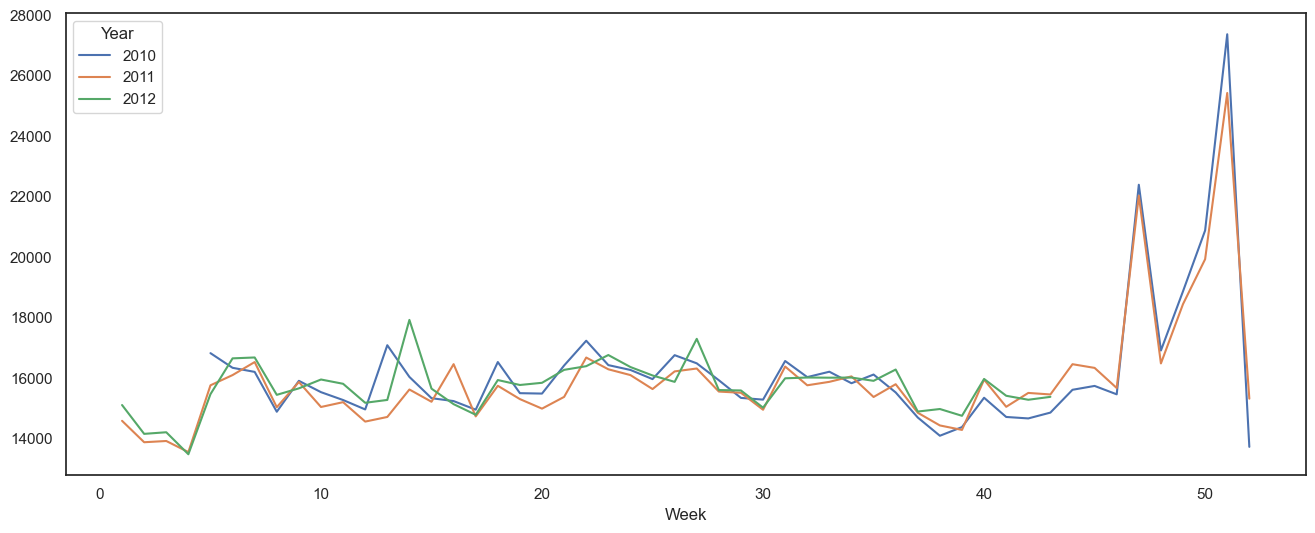

In [134]:
weekly_sales = pd.pivot_table(train_data, values = "Weekly_Sales", columns = "Year", index = "Week")
weekly_sales.plot(figsize=(16, 6))

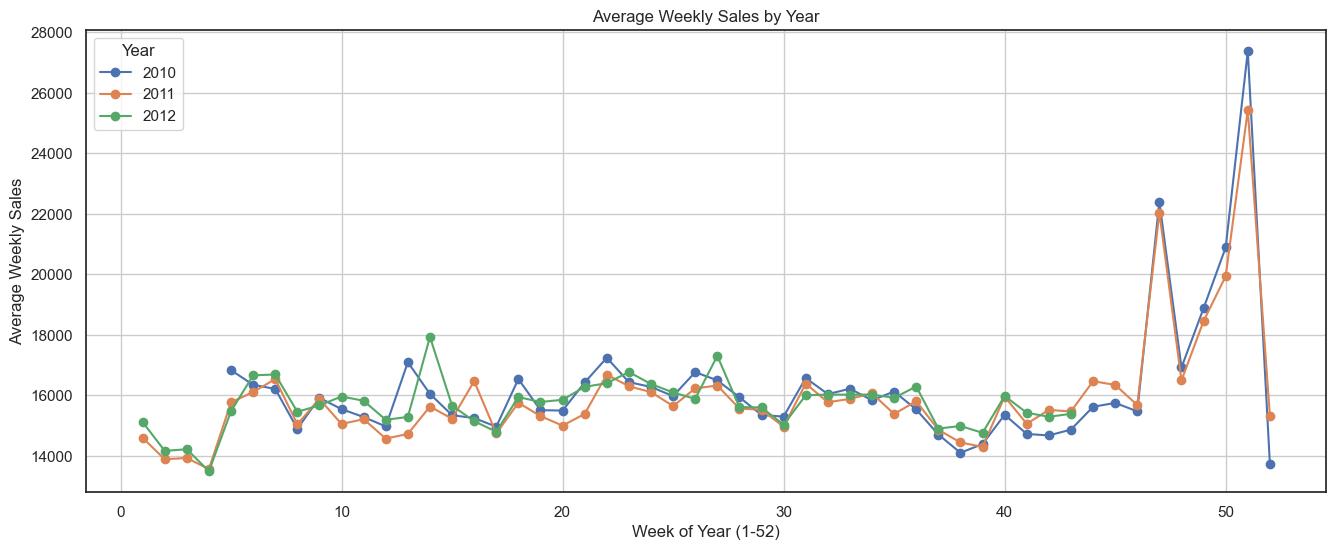

In [135]:
import pandas as pd
import matplotlib.pyplot as plt

# Pivot: average weekly sales by week vs year
weekly_sales = pd.pivot_table(train_data,
                              values="Weekly_Sales",
                              index="Week",
                              columns="Year",
                              aggfunc="mean")

# Plot
weekly_sales.plot(figsize=(16, 6), marker="o")
plt.title("Average Weekly Sales by Year")
plt.xlabel("Week of Year (1-52)")
plt.ylabel("Average Weekly Sales")
plt.legend(title="Year")
plt.grid(True)
plt.show()

#### Weekly Sales over Date

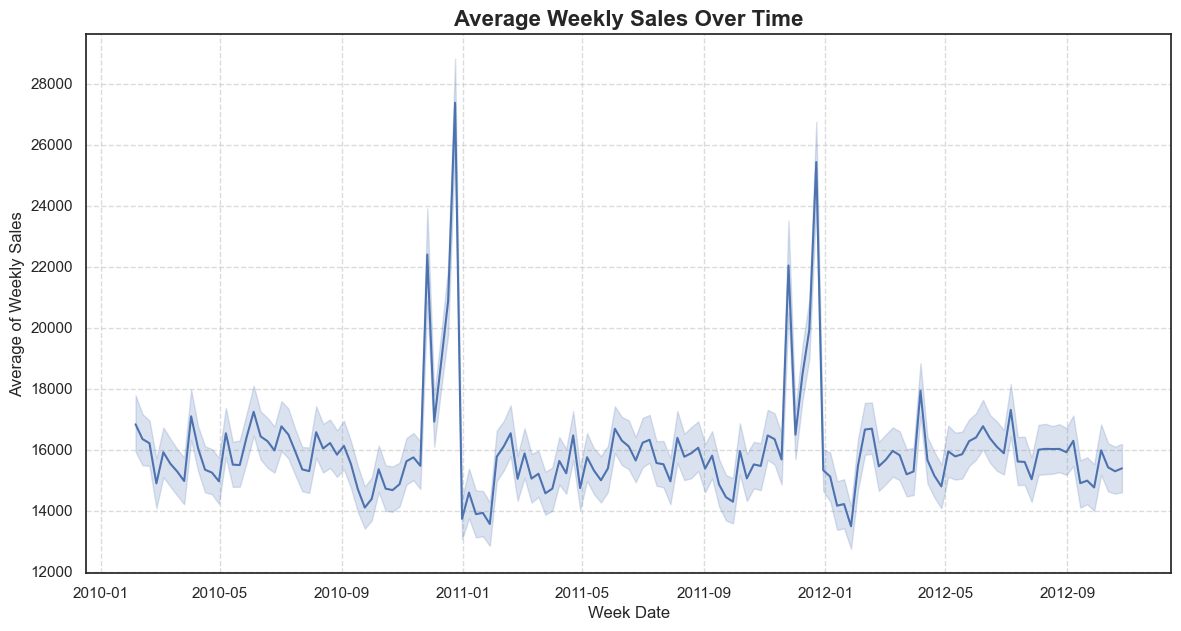

In [136]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(14, 7))

# Line plot
sns.lineplot(data=train_data, x="Date", y="Weekly_Sales", ax=ax)

# Labels & title
ax.set_title("Average Weekly Sales Over Time", fontsize=16, fontweight='bold')
ax.set_ylabel("Average of Weekly Sales")
ax.set_xlabel("Week Date")

# Keep labels horizontal (or angled if you prefer)
plt.xticks(rotation=0)  # change to 30 if you want angled

plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

#### Weekly Sales over time, split by Store Type (A/B/C).

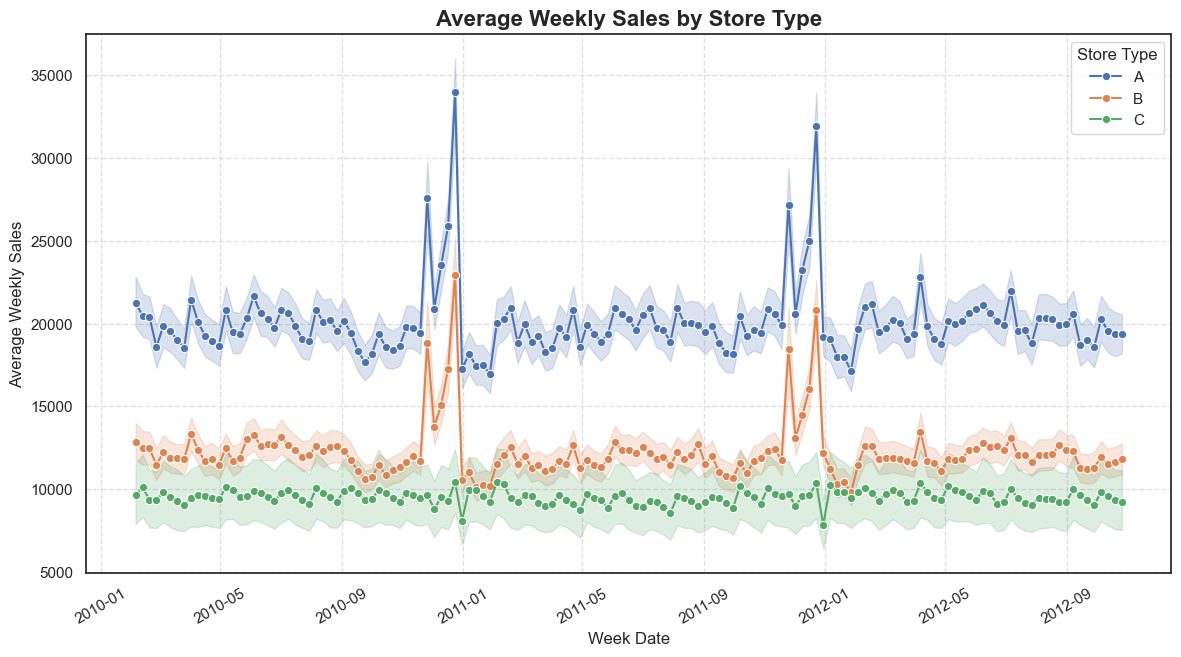

In [137]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(14, 7))

# Line plot with hue for store type
sns.lineplot(data=train_data, x="Date", y="Weekly_Sales", hue="Type", marker="o", ax=ax)

# Titles and labels
ax.set_title("Average Weekly Sales by Store Type", fontsize=16, fontweight='bold')
ax.set_ylabel("Average Weekly Sales")
ax.set_xlabel("Week Date")

# Rotate x-axis labels (set to 0 for horizontal)
plt.xticks(rotation=30)

# Legend
ax.legend(title="Store Type")

plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

### Stastical Analysis

In [139]:
print("Data Info:")
print(train_data.info())
print("\nMissing Values:")
print(train_data.isnull().sum())

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Temperature   421570 non-null  float64       
 6   CPI           421570 non-null  float64       
 7   Unemployment  421570 non-null  float64       
 8   Type          421570 non-null  object        
 9   Size          421570 non-null  int64         
 10  Week          421570 non-null  UInt32        
 11  Year          421570 non-null  int32         
 12  Month         421570 non-null  int32         
 13  WeekOfYear    421570 non-null  UInt32        
dtypes: UInt32(2), bool(1), datetime64[ns](1), float64(4), int

In [140]:
print("\nDescriptive Statistics (Continuous Columns):")
print(train_data.describe())



Descriptive Statistics (Continuous Columns):
               Store           Dept                           Date  \
count  421570.000000  421570.000000                         421570   
mean       22.200546      44.260317  2011-06-18 08:30:31.963375360   
min         1.000000       1.000000            2010-02-05 00:00:00   
25%        11.000000      18.000000            2010-10-08 00:00:00   
50%        22.000000      37.000000            2011-06-17 00:00:00   
75%        33.000000      74.000000            2012-02-24 00:00:00   
max        45.000000      99.000000            2012-10-26 00:00:00   
std        12.785297      30.492054                            NaN   

        Weekly_Sales    Temperature            CPI   Unemployment  \
count  421570.000000  421570.000000  421570.000000  421570.000000   
mean    15981.258123      60.090059     171.201947       7.960289   
min     -4988.940000      -2.060000     126.064000       3.879000   
25%      2079.650000      46.680000     132.022

In [141]:

print("\nDescriptive Statistics (Categorical Columns):")
print(train_data.describe(include=['object','bool']))


Descriptive Statistics (Categorical Columns):
       IsHoliday    Type
count     421570  421570
unique         2       3
top        False       A
freq      383022  215478


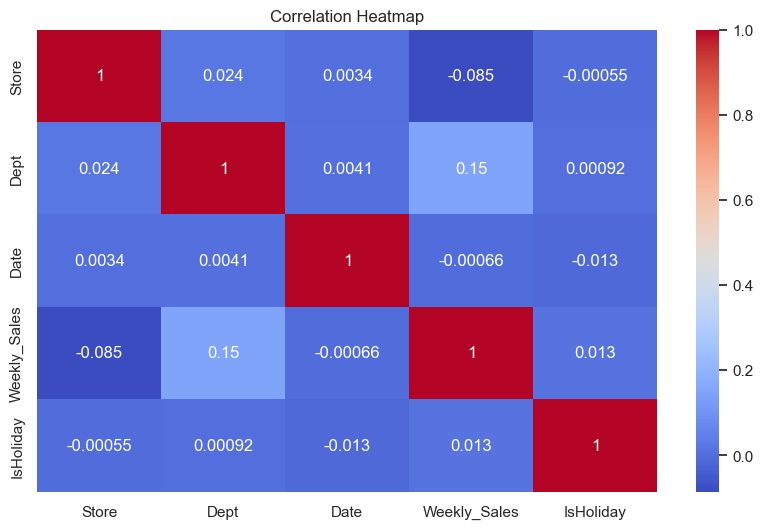

In [142]:
plt.figure(figsize=(10,6))
sns.heatmap(train.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [143]:
continuous_cols = ["Weekly_Sales", "Temperature", "CPI", "Unemployment", "Size"]
for col in continuous_cols:
    print(f"{col}: Skewness = {train_data[col].skew():.2f}, Kurtosis = {train_data[col].kurt():.2f}")

Weekly_Sales: Skewness = 3.26, Kurtosis = 21.49
Temperature: Skewness = -0.32, Kurtosis = -0.64
CPI: Skewness = 0.09, Kurtosis = -1.83
Unemployment: Skewness = 1.18, Kurtosis = 2.73
Size: Skewness = -0.33, Kurtosis = -1.21


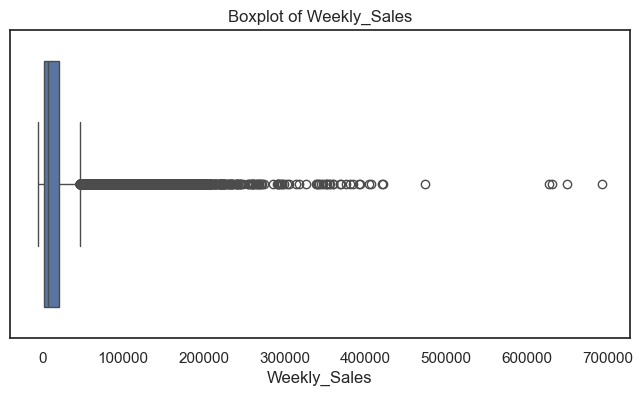

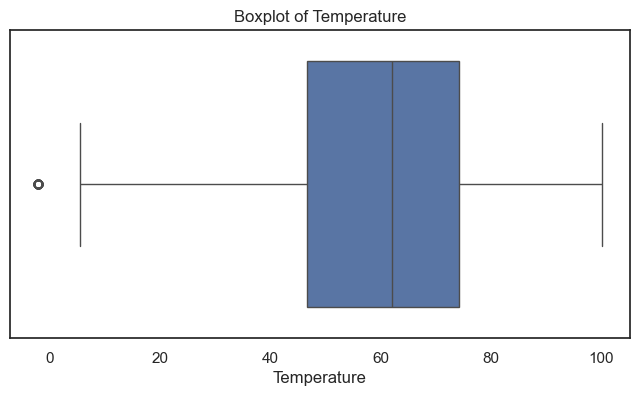

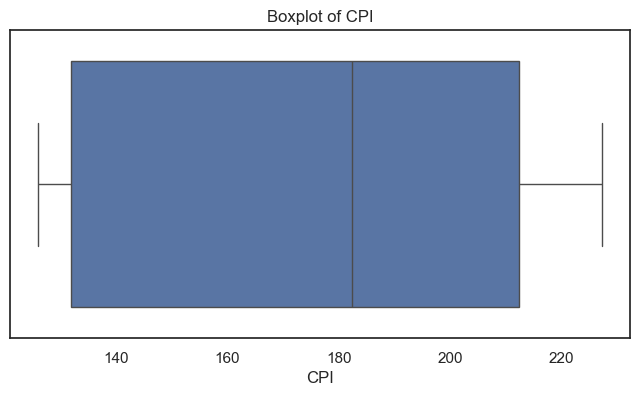

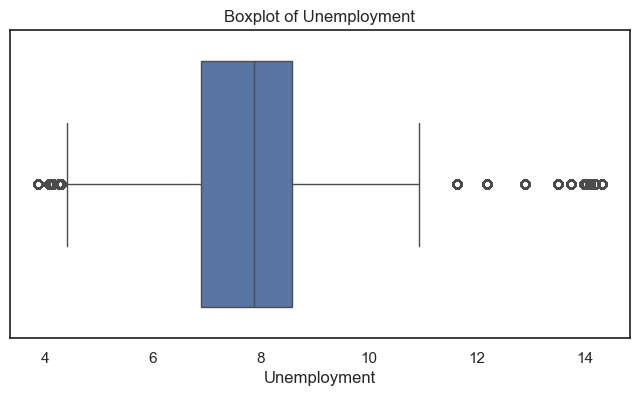

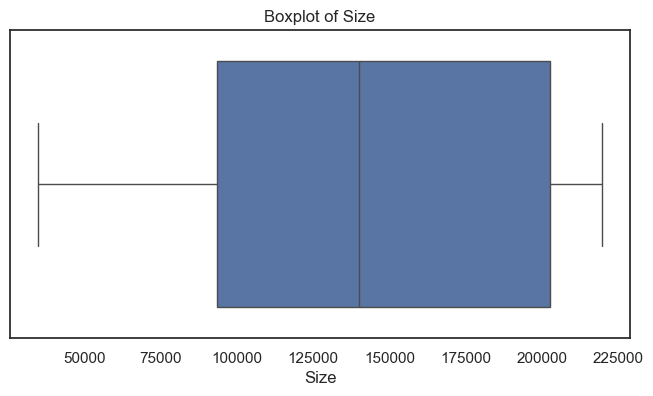

In [144]:
for col in continuous_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=train_data[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

In [145]:
avg_sales_type = train_data.groupby("Type")["Weekly_Sales"].mean()
print("\nAverage Weekly Sales by Store Type:")
print(avg_sales_type)


Average Weekly Sales by Store Type:
Type
A    20099.568043
B    12237.075977
C     9519.532538
Name: Weekly_Sales, dtype: float64


In [146]:
shapiro_test = stats.shapiro(train_data['Weekly_Sales'].sample(5000, random_state=42))  # sample if large
print("\nShapiro-Wilk Test for Weekly_Sales:")
print(f"Statistic={shapiro_test.statistic:.3f}, p-value={shapiro_test.pvalue:.3f}")


Shapiro-Wilk Test for Weekly_Sales:
Statistic=0.641, p-value=0.000


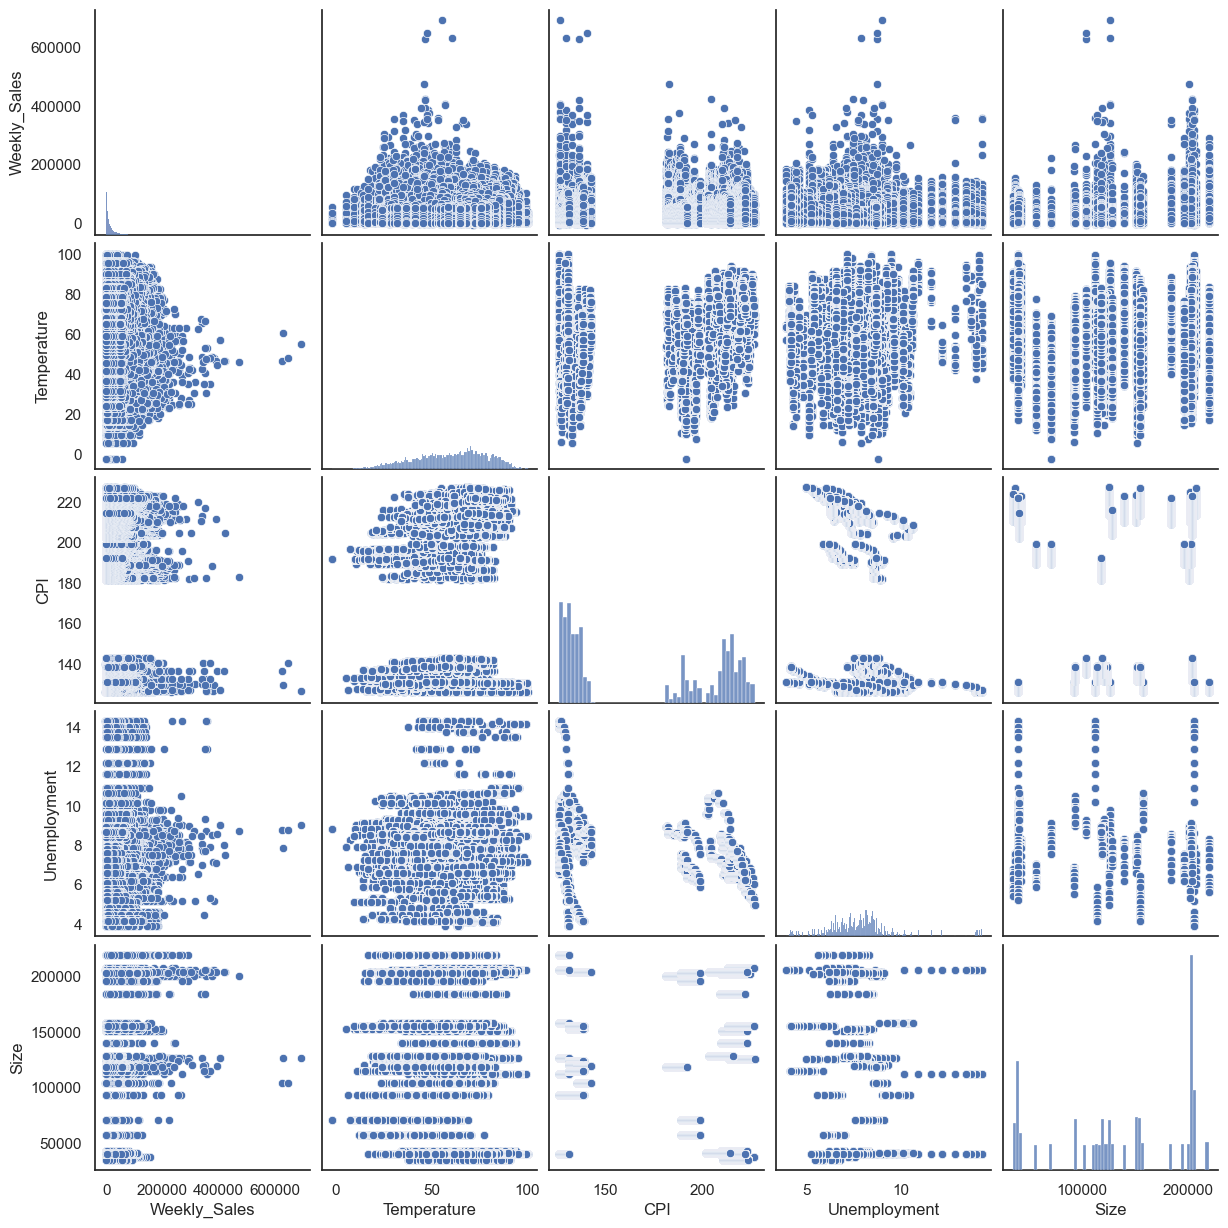

In [147]:
sns.pairplot(train_data[continuous_cols])
plt.show()

## *Data Visualization*

#### Univariate Visualizations

##### 1. What is the distribution of weekly sales?

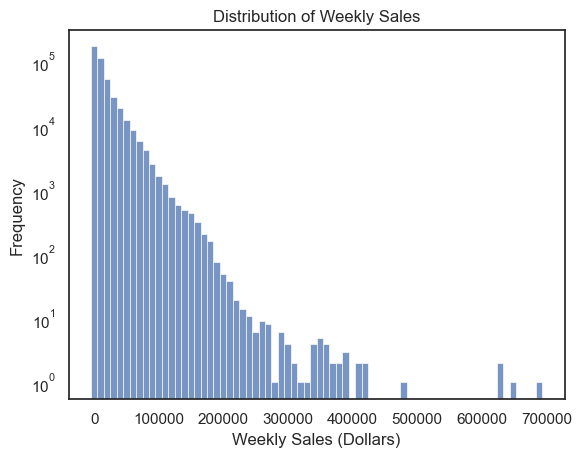

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# Simple histogram with log scale
sns.histplot(data=train, x='Weekly_Sales', binwidth=10000)
plt.yscale('log')  # log scale on y-axis
plt.xlabel('Weekly Sales (Dollars)')
plt.ylabel('Frequency')
plt.title('Distribution of Weekly Sales')
plt.show()

* The distribution of weekly sales is highly skewed to the right.
* The most common weekly sales are between 0 and 20k Dollars.

#### 2.How many distinct store types are present in our dataset?

In [148]:
# Count distinct store types
distinct_types = train_data['Type'].nunique()
print("Number of distinct store types:", distinct_types)

Number of distinct store types: 3


In [149]:
# Count of stores per type
store_counts = train_data[['Store','Type']].drop_duplicates('Store')['Type'].value_counts()
print(store_counts)

Type
A    22
B    17
C     6
Name: count, dtype: int64


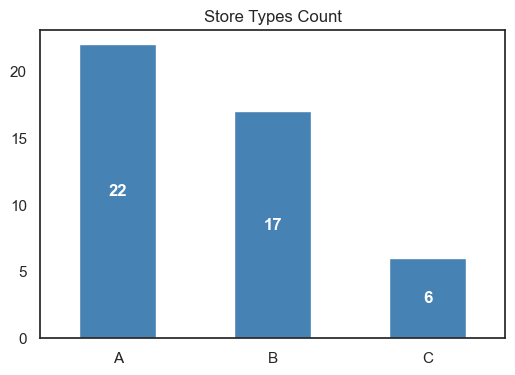

In [150]:
# Count stores per type
store_counts = train_data[['Store','Type']].drop_duplicates('Store')['Type'].value_counts()

# Bar plot
ax = store_counts.plot(kind='bar', color='steelblue', figsize=(6,4))

# Add value labels inside bars
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height()/2, int(p.get_height()), 
            ha='center', va='center', color='white', fontweight='bold')

# Title & labels
ax.set_title('Store Types Count')
ax.set_ylabel('')
ax.set_xlabel('')
ax.set_xticklabels(store_counts.index, rotation=0)

plt.show()

### 3.How many holidays are included in the set of unique dates within the dataset?

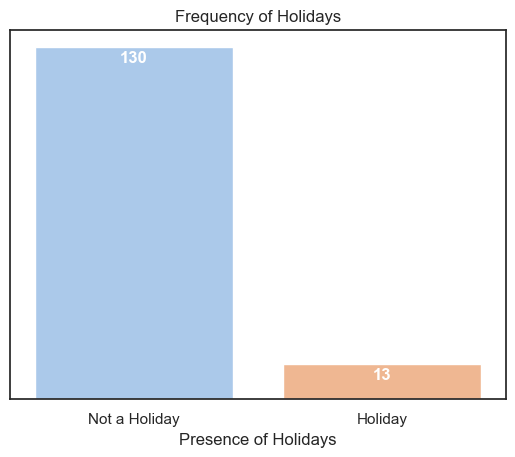

In [151]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count holidays and non-holidays based on unique dates
holiday_counts = train_data.drop_duplicates(subset='Date')['IsHoliday'].value_counts()

# Plot
sns.barplot(x=holiday_counts.index, y=holiday_counts.values, palette='pastel')
for i, val in enumerate(holiday_counts.values):
    plt.text(i, val - 4, val, ha='center', va='center', color='w', weight='bold')

plt.xticks([0, 1], ['Not a Holiday', 'Holiday'])
plt.ylabel('')
plt.xlabel('Presence of Holidays')
plt.title('Frequency of Holidays')
plt.gca().set_yticks([])  # remove y-axis ticks
plt.show()

#### 4. How are the temperatures distributed across the weeks?

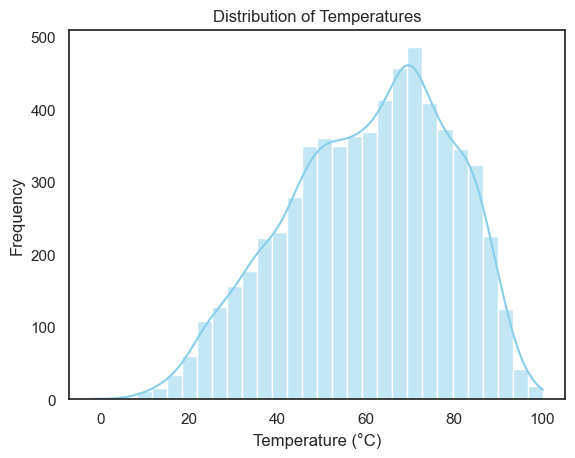

In [152]:
import matplotlib.pyplot as plt
import seaborn as sns

# Average temperature per store per date
temps = train_data.groupby(['Date', 'Store'])['Temperature'].mean().reset_index()

# Plot histogram
sns.histplot(temps['Temperature'], bins=30, kde=True, color='skyblue')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.title('Distribution of Temperatures')
plt.show()

### Bivariate Visualizations

#### 1. Is there a noticeable trend in weekly sales in relation to holiday and non-holiday weeks?

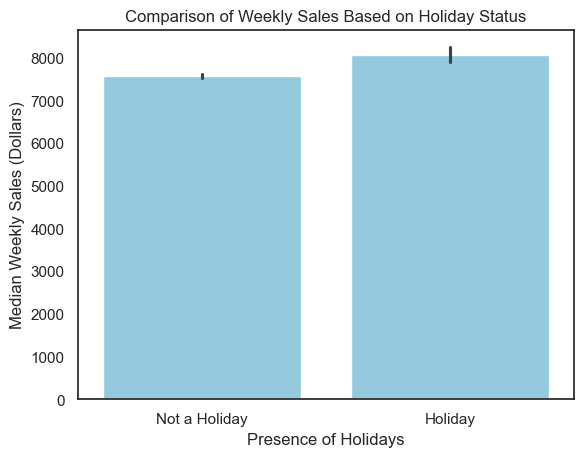

In [153]:

# Compare median weekly sales for holiday vs non-holiday weeks
sns.barplot(
    data=train_data,
    x='IsHoliday',
    y='Weekly_Sales',
    estimator=np.median,  # use median instead of mean
    color='skyblue'
)

# Formatting the plot
plt.xticks([0, 1], ['Not a Holiday', 'Holiday'])
plt.xlabel('Presence of Holidays')
plt.ylabel('Median Weekly Sales (Dollars)')
plt.title('Comparison of Weekly Sales Based on Holiday Status')
plt.show()


* There is  a slight elevation in sales during weeks with holidays in comparison to regular weeks.
* This outcome forms the basis of a hypothesis we intend to verify through hypothesis testing, aiming to establish whether this observed difference in sales is statistically meaningful rather than occurring by chance.

#### 4. How do holidays like Christmas Day and Thanksgiving Day impact the pattern of average weekly sales over the observed period?

In [154]:
g=train_data.groupby(['Date','IsHoliday'])['Weekly_Sales'].mean().sort_values(ascending=False)

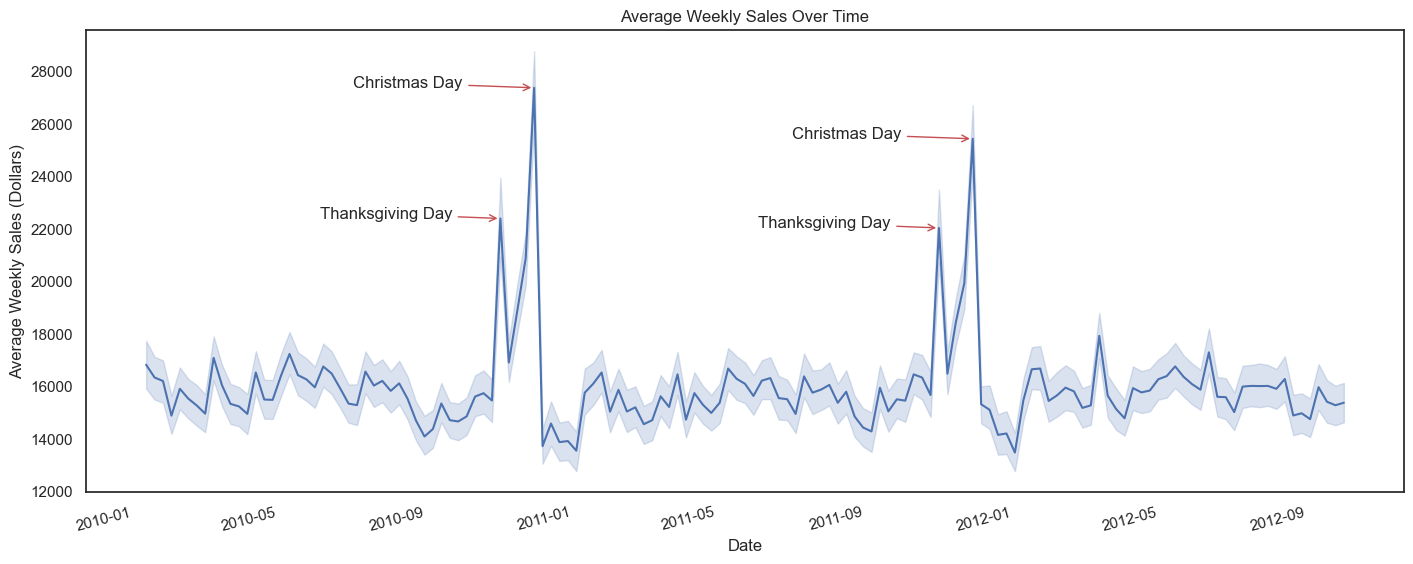

In [155]:
from datetime import timedelta
plt.figure(figsize=(17,6))
sns.lineplot(data=train_data,x=train_data.Date,y='Weekly_Sales')
plt.xticks(rotation=15);
plt.annotate('Christmas Day',xy=(g.index[0][0],g[0]),xytext=(g.index[0][0]-timedelta(150),g[0]),arrowprops={'arrowstyle':'->','color':'r'})
plt.annotate('Christmas Day',xy=(g.index[1][0],g[1]),xytext=(g.index[1][0]-timedelta(150),g[1]),arrowprops={'arrowstyle':'->','color':'r'})
plt.annotate('Thanksgiving Day',xy=(g.index[2][0],g[2]),xytext=(g.index[2][0]-timedelta(150),g[2]),arrowprops={'arrowstyle':'->','color':'r'})
plt.annotate('Thanksgiving Day',xy=(g.index[3][0],g[3]),xytext=(g.index[3][0]-timedelta(150),g[3]),arrowprops={'arrowstyle':'->','color':'r'})

plt.xlabel('Date')
plt.ylabel('Average Weekly Sales (Dollars)')
plt.title('Average Weekly Sales Over Time')
plt.show()

#### 5. Which store type demonstrates the highest median weekly sales, and how do other types compare?

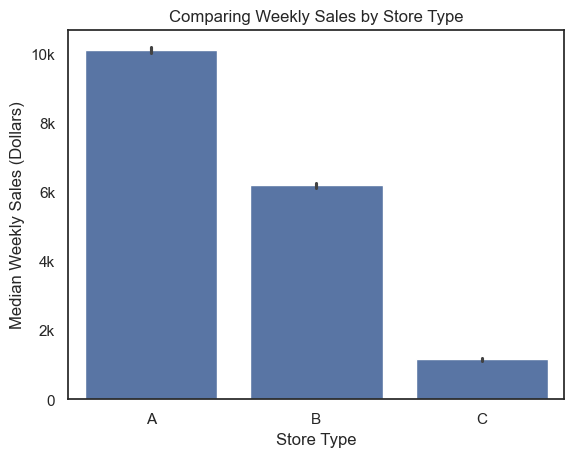

In [156]:
sns.barplot(data=train_data,x='Type',y='Weekly_Sales',estimator=np.median,errorbar='ci')
plt.xlabel('Store Type')
plt.ylabel('Median Weekly Sales (Dollars)')
plt.title("Comparing Weekly Sales by Store Type")
plt.yticks([0,2000,4000,6000,8000,10000],[0,'2k','4k','6k','8k','10k'])
plt.show()

* Among the different store types, store type A stands out with the highest median weekly sales. In comparison to types B and C, store type A consistently maintains a higher median sales figure. This suggests that store type A tends to perform better in terms of weekly sales when compared to the other store types, B and C.

### Multivariate Visualizations

#### 1. How does the median weekly sales for different store types vary, and is there a notable difference in this variation when considering whether a week is a holiday or not?

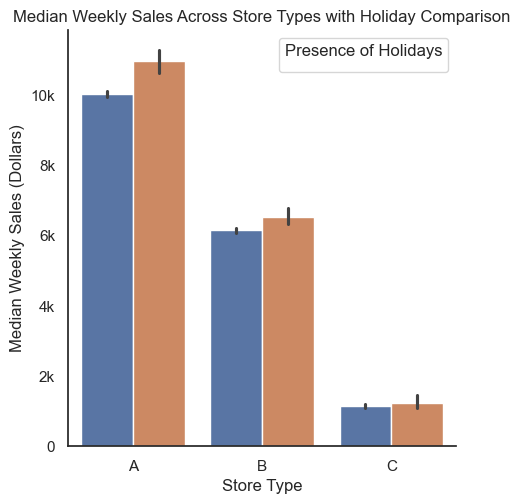

In [157]:
train_data.head()
sns.catplot(data=train_data,x='Type',y='Weekly_Sales',hue='IsHoliday',estimator=np.median,kind='bar',legend=False)
plt.legend(title='Presence of Holidays')
plt.xlabel('Store Type')
plt.ylabel('Median Weekly Sales (Dollars)')
plt.title('Median Weekly Sales Across Store Types with Holiday Comparison')
plt.yticks([0,2000,4000,6000,8000,10000],[0,'2k','4k','6k','8k','10k'])
plt.show()

* The presented clustered bar chartillustrates the median weekly sales distribution across various store types, categorized by whether the week is a holiday or not. It is evident that store type A consistently maintains the highest median weekly sales compared to types B and C, regardless of the holiday status. Additionally, the plot provides insights into the potential impact of holidays on weekly sales, showcasing any deviations in median sales for different store types during holiday weeks.

#### 2. How do the weekly sales patterns of store types A, B, and C compare over the observed time period?

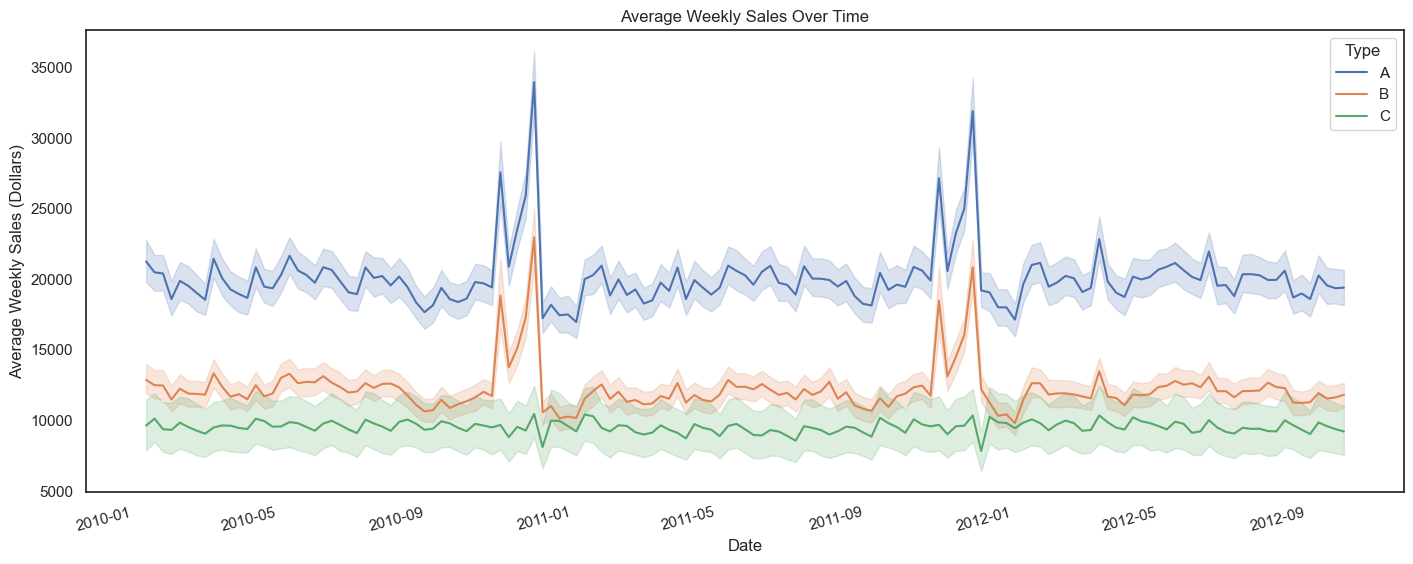

In [158]:
plt.figure(figsize=(17,6))
sns.lineplot(data=train_data,x=train_data.Date,y='Weekly_Sales',hue='Type')
plt.xticks(rotation=15);

plt.xlabel('Date')
plt.ylabel('Average Weekly Sales (Dollars)')
plt.title('Average Weekly Sales Over Time')
plt.show()

#### 3. What conclusions can be drawn about the performance of individual stores in relation to their types?

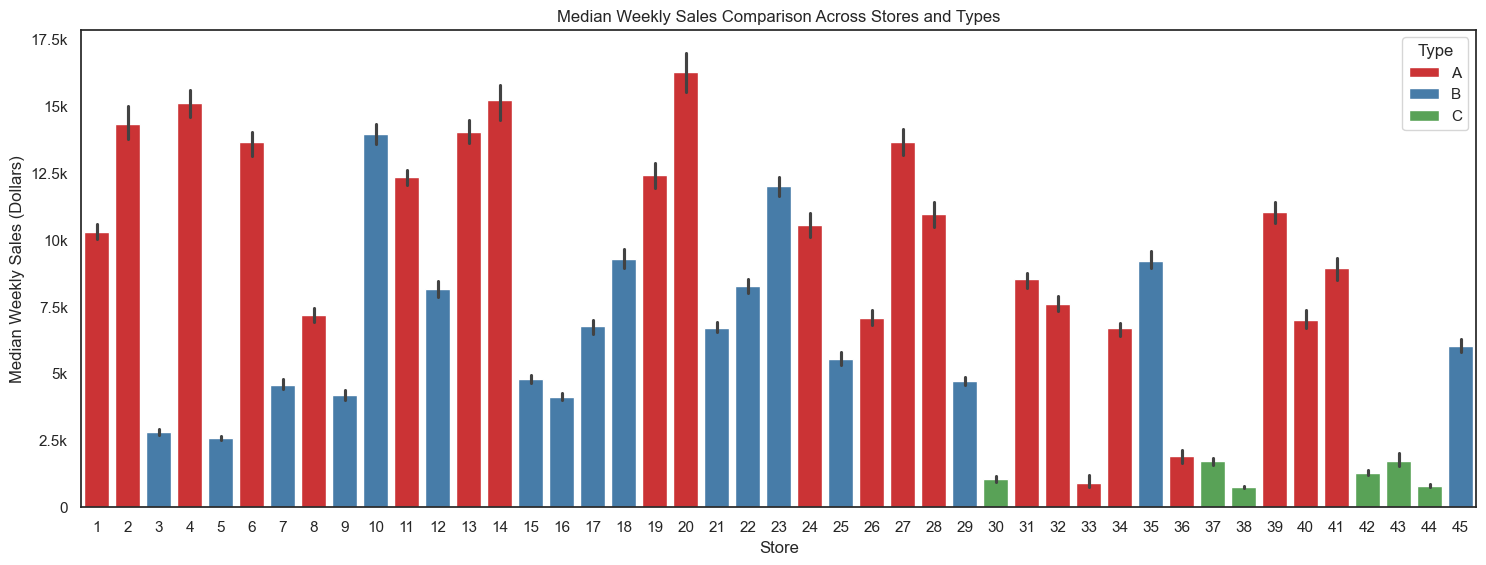

In [159]:
plt.figure(figsize=(18,6.2))
sns.barplot(data=train_data,x='Store',y='Weekly_Sales',hue='Type',palette='Set1',estimator=np.median,dodge=False)
plt.xlabel('Store')
plt.ylabel('Median Weekly Sales (Dollars)')
plt.title("Median Weekly Sales Comparison Across Stores and Types")
plt.yticks([0,2500,5000,7500,10000,12500,15000,17500],[0,'2.5k','5k','7.5k','10k','12.5k','15k','17.5k'])
plt.show()

#### Top performing stores according to the historical data.

In [160]:
import pandas as pd

# Calculate total weekly sales per store
store_sales = train_data.groupby('Store')['Weekly_Sales'].sum().reset_index()

# Sort stores by sales in descending order
top_stores = store_sales.sort_values(by='Weekly_Sales', ascending=False)
# Sort stores by sales in Ascending order
Bottom_stores = store_sales.sort_values(by='Weekly_Sales', ascending=True)
# Display top 10 stores
print(top_stores.head(10))

    Store  Weekly_Sales
19     20  3.013978e+08
3       4  2.995440e+08
13     14  2.889999e+08
12     13  2.865177e+08
1       2  2.753824e+08
9      10  2.716177e+08
26     27  2.538559e+08
5       6  2.237561e+08
0       1  2.224028e+08
38     39  2.074455e+08


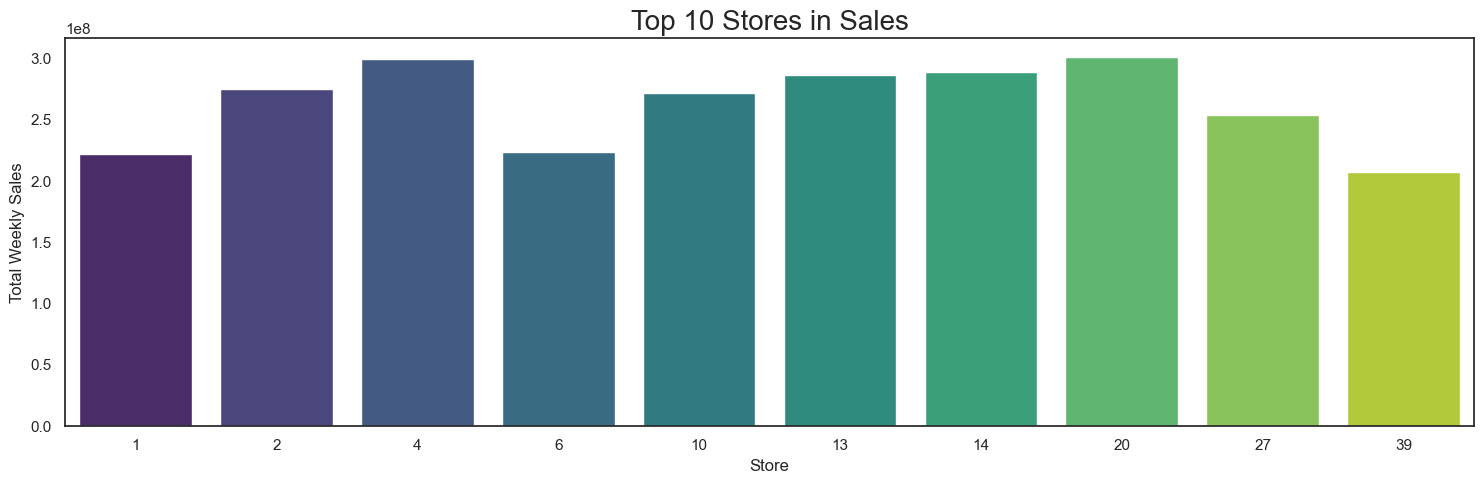

In [161]:
# Plot top 10 stores
top_10_stores = top_stores.head(10)
plt.figure(figsize=(15,5))
sns.barplot(x='Store', y='Weekly_Sales', data=top_10_stores, palette='viridis')
plt.title('Top 10 Stores in Sales', fontsize=20)
plt.xlabel('Store')
plt.ylabel('Total Weekly Sales')
plt.tight_layout()
plt.show()

#### The worst performing store, and how significant is the difference between the highest and lowest performing stores.

In [162]:
import pandas as pd

# Calculate total weekly sales per store
store_sales = train_data.groupby('Store')['Weekly_Sales'].sum().reset_index()

# Sort stores by sales in descending order
top_stores = store_sales.sort_values(by='Weekly_Sales', ascending=False)
# Sort stores by sales in Ascending order
Bottom_stores = store_sales.sort_values(by='Weekly_Sales', ascending=True)
# Display top 10 stores
print(Bottom_stores.head(10))

    Store  Weekly_Sales
32     33   37160221.96
43     44   43293087.84
4       5   45475688.90
35     36   53412214.97
37     38   55159626.42
2       3   57586735.07
29     30   62716885.12
36     37   74202740.32
15     16   74252425.40
28     29   77141554.31


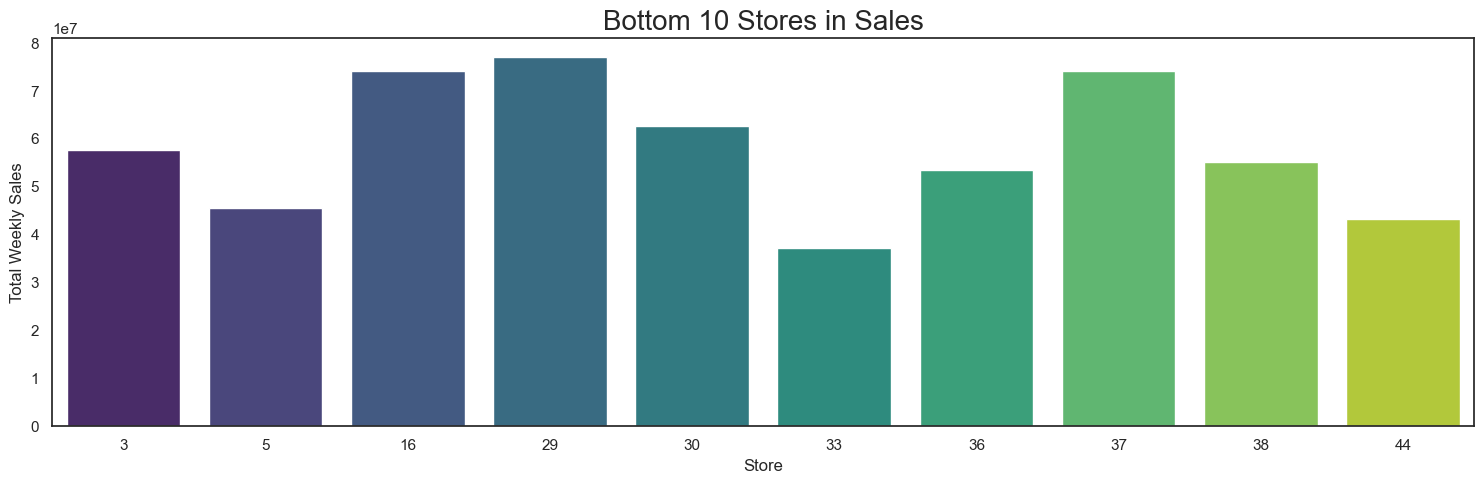

In [163]:
# Plot top 10 stores
bottom_10_stores = Bottom_stores.head(10)
plt.figure(figsize=(15,5))
sns.barplot(x='Store', y='Weekly_Sales', data=bottom_10_stores, palette='viridis')
plt.title('Bottom 10 Stores in Sales', fontsize=20)
plt.xlabel('Store')
plt.ylabel('Total Weekly Sales')
plt.tight_layout()
plt.show()

# Findings and Explorations


## Cleaning Process

- The data has no too much missing values. All columns was checked. 
- I choose rows which has higher than 0 weekly sales. Minus values are 0.3% of data. So, I dropped them.
- Null values in markdowns changed to zero. Because, they were written as null if there were no markdown on this department. 

## Explorations & Findings

- There are 45 stores and 81 department in data. Departments are not same in all stores. 
- Although department 72 has higher weekly sales values, on average department 92 is the best. It shows us, some departments has higher values as seasonal like Thanksgiving. It is consistant when we look at the top 5 sales in data, all of them belongs to 72th department at Thanksgiving holiday time. 
- Although stores 10 and 35 have higher weekly sales values sometimes, in general average store 20 and store 4 are on the first and second rank. It means that some areas has higher seasonal sales. 
- Stores has 3 types as A, B and C according to their sizes. Almost half of the stores are bigger than 150000 and categorized as A. According to type, sales of the stores are changing.
- As expected, holiday average sales are higher than normal dates.
- Christmas holiday introduces as the last days of the year. But people generally shop at 51th week. So, when we look at the total sales of holidays, Thankgiving has higher sales between them which was assigned by Walmart.
- Year 2010 has higher sales than 2011 and 2012. But, November and December sales are not in the data for 2012. Even without highest sale months, 2012 is not significantly less than 2010, so after adding last two months, it can be first.
- It is obviously seen that week 51 and 47 have higher values and 50-48 weeks follow them. Interestingly, 5th top sales belongs to 22th week of the year. This results show that Christmas, Thankgiving and Black Friday are very important than other weeks for sales and 5th important time is 22th week of the year and it is end of the May, when schools are closed. Most probably, people are preparing for holiday at the end of the May. 
- January sales are significantly less than other months. This is the result of November and December high sales. After two high sales month, people prefer to pay less on January.
- CPI, temperature, unemployment rate and fuel price have no pattern on weekly sales. 


# Feature Engineering

- Data needs more feature engineering but as a first insight, week, year and month columns were created to see and analyze results in detail. Week column is an important feature because our data is weekly and we can see which week of the year sales have significant changes. 
- Also, holidays were divided columns as Thankgiving, Christmas, Labor day and Super Bowl to see the effects on different holidays.